![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/01.0.Clinical_Named_Entity_Recognition_Model.ipynb)

# Clinical Named Entity Recognition (NER)

##  NER Model Implementation in Spark NLP

  The deep neural network architecture for NER model in Spark NLP is BiLSTM-CNN-Char framework. a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs](https://arxiv.org/abs/1511.08308)). It is a neural network architecture that automatically detects word and character-level features using a hybrid bidirectional LSTM and CNN architecture, eliminating the need for most feature engineering steps.

  In the original framework, the CNN extracts a fixed length feature vector from character-level features. For each word, these vectors are concatenated and fed to the BLSTM network and then to the output layers. They employed a stacked bi-directional recurrent neural network with long short-term memory units to transform word features into named entity tag scores. The extracted features of each word are fed into a forward LSTM network and a backward LSTM network. The output of each network at each time step is decoded by a linear layer and a log-softmax layer into log-probabilities for each tag category. These two vectors are then simply added together to produce the final output. In the architecture of the proposed framework in the original paper, 50-dimensional pretrained word embeddings is used for word features, 25-dimension character embeddings is used for char features, and capitalization features (allCaps, upperInitial, lowercase, mixedCaps, noinfo) are used for case features.

In [1]:
from johnsnowlabs import nlp, medical
spark = nlp.start()


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1694119223257_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Spark Session already created, some configs may not take.
📋 Loading license number 0 from /lib/.johnsnowlabs/johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare.json

## Blogposts and videos:

- [How to Setup Spark NLP for HEALTHCARE on UBUNTU - Video](https://www.youtube.com/watch?v=yKnF-_oz0GE)

- [Named Entity Recognition (NER) with BERT in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

- [State of the art Clinical Named Entity Recognition in Spark NLP - Youtube](https://www.youtube.com/watch?v=YM-e4eOiQ34)

- [Named Entity Recognition for Healthcare with SparkNLP NerDL and NerCRF](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

- [Named Entity Recognition for Clinical Text](https://medium.com/atlas-research/ner-for-clinical-text-7c73caddd180)

In [2]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Clinical NER Pipeline (with pretrained models)





## Clinical NER Models
|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_clinical_en.html)  | 2| [jsl_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_greedy_clinical_en.html)  | 3| [jsl_ner_wip_modifier_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_ner_wip_modifier_clinical_en.html)  | 4| [jsl_rd_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_rd_ner_wip_greedy_clinical_en.html)  |
| 5| [ner_abbreviation_clinical](https://nlp.johnsnowlabs.com/2021/12/30/ner_abbreviation_clinical_en.html)  | 6| [ner_abbreviation_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/12/ner_abbreviation_emb_clinical_large_en.html)  | 7| [ner_abbreviation_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/12/ner_abbreviation_emb_clinical_medium_en.html)  | 8| [ner_ade_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinical_en.html)  |
| 9| [ner_ade_clinicalbert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinicalbert_en.html)  | 10| [ner_ade_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/21/ner_ade_emb_clinical_large_en.html)  | 11| [ner_ade_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/21/ner_ade_emb_clinical_medium_en.html)  | 12| [ner_ade_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_healthcare_en.html)  |
| 13| [ner_anatomy](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_en.html)  | 14| [ner_anatomy_coarse](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_en.html)  | 15| [ner_anatomy_coarse_en](https://nlp.johnsnowlabs.com/2020/11/04/ner_anatomy_coarse_en.html)  | 16| [ner_anatomy_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/15/ner_anatomy_emb_clinical_large_en.html)  |
| 17| [ner_anatomy_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/15/ner_anatomy_emb_clinical_medium_en.html)  | 18| [ner_anatomy_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_anatomy_en.html)  | 19| [ner_aspect_based_sentiment](https://nlp.johnsnowlabs.com/2021/03/31/ner_aspect_based_sentiment_en.html)  | 20| [ner_bacterial_species](https://nlp.johnsnowlabs.com/2021/04/01/ner_bacterial_species_en.html)  |
| 21| [ner_bacterial_species_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/23/ner_bacterial_species_emb_clinical_large_en.html)  | 22| [ner_bacterial_species_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/23/ner_bacterial_species_emb_clinical_medium_en.html)  | 23| [ner_biomarker](https://nlp.johnsnowlabs.com/2021/11/26/ner_biomarker_en.html)  | 24| [ner_biomedical_bc2gm](https://nlp.johnsnowlabs.com/2022/05/11/ner_biomedical_bc2gm_en_2_4.html)  |
| 25| [ner_bionlp](https://nlp.johnsnowlabs.com/2021/03/31/ner_bionlp_en.html)  | 26| [ner_bionlp_en](https://nlp.johnsnowlabs.com/2020/01/30/ner_bionlp_en.html)  | 27| [ner_cancer_genetics](https://nlp.johnsnowlabs.com/2021/03/31/ner_cancer_genetics_en.html)  | 28| [ner_cellular](https://nlp.johnsnowlabs.com/2021/03/31/ner_cellular_en.html)  |
| 29| [ner_cellular_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/24/ner_cellular_emb_clinical_large_en.html)  | 30| [ner_cellular_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/24/ner_cellular_emb_clinical_medium_en.html)  | 31| [ner_cellular_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_cellular_en.html)  | 32| [ner_chemd_clinical](https://nlp.johnsnowlabs.com/2021/11/04/ner_chemd_clinical_en.html)  |
| 33| [ner_chemicals](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemicals_en.html)  | 34| [ner_chemicals_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/02/ner_chemicals_emb_clinical_large_en.html)  | 35| [ner_chemicals_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/02/ner_chemicals_emb_clinical_medium_en.html)  | 36| [ner_chemprot_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_chemprot_clinical_en.html)  |
| 37| [ner_chexpert](https://nlp.johnsnowlabs.com/2021/09/30/ner_chexpert_en.html)  | 38| [ner_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_en.html)  | 39| [ner_clinical_en](https://nlp.johnsnowlabs.com/2020/01/30/ner_clinical_en.html)  | 40| [ner_clinical_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_large_en.html)  |
| 41| [ner_clinical_large_en](https://nlp.johnsnowlabs.com/2020/05/23/ner_clinical_large_en.html)  | 42| [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/22/ner_clinical_trials_abstracts_en_3_0.html)  | 43| [ner_covid_trials](https://nlp.johnsnowlabs.com/2022/10/19/ner_covid_trials_en.html)  | 44| [ner_crf](https://nlp.johnsnowlabs.com/2020/01/28/ner_crf_en.html)  |
| 45| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  | 46| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  | 47| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  | 48| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |
| 49| [ner_deid_large_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_deid_large_emb_clinical_large_en.html)  | 50| [ner_deid_large_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_deid_large_emb_clinical_medium_en.html)  | 51| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  | 52| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  |
| 53| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  | 54| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  | 55| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  | 56| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |
| 57| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  | 58| [ner_demographic_extended_healthcare](https://nlp.johnsnowlabs.com/2023/06/08/ner_demographic_extended_healthcare_en.html)  | 59| [ner_diseases](https://nlp.johnsnowlabs.com/2021/03/31/ner_diseases_en.html)  | 60| [ner_diseases_en](https://nlp.johnsnowlabs.com/2020/03/25/ner_diseases_en.html)  |
| 61| [ner_diseases_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_large_en.html)  | 62| [ner_drugprot_clinical](https://nlp.johnsnowlabs.com/2021/12/20/ner_drugprot_clinical_en.html)  | 63| [ner_drugs](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_en.html)  | 64| [ner_drugs_en](https://nlp.johnsnowlabs.com/2020/03/25/ner_drugs_en.html)  |
| 65| [ner_drugs_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_greedy_en.html)  | 66| [ner_drugs_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_large_en.html)  | 67| [ner_drugs_large_en](https://nlp.johnsnowlabs.com/2021/01/29/ner_drugs_large_en.html)  | 68| [ner_eu_clinical_case](https://nlp.johnsnowlabs.com/2023/01/25/ner_eu_clinical_case_en.html)  |
| 69| [ner_eu_clinical_condition](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_en.html)  | 70| [ner_events_admission_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_admission_clinical_en.html)  | 71| [ner_events_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_clinical_en.html)  | 72| [ner_events_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_healthcare_en.html)  |
| 73| [ner_financial_contract](https://nlp.johnsnowlabs.com/2021/04/01/ner_financial_contract_en.html)  | 74| [ner_genetic_variants](https://nlp.johnsnowlabs.com/2021/06/25/ner_genetic_variants_en.html)  | 75| [ner_healthcare](https://nlp.johnsnowlabs.com/2021/04/21/ner_healthcare_en.html)  | 76| [ner_healthcare_en](https://nlp.johnsnowlabs.com/2020/03/26/ner_healthcare_en.html)  |
| 77| [ner_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_gene_clinical_en.html)  | 78| [ner_human_phenotype_go_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_go_clinical_en.html)  | 79| [ner_jsl](https://nlp.johnsnowlabs.com/2022/10/19/ner_jsl_en.html)  | 80| [ner_jsl_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_jsl_emb_clinical_large_en.html)  |
| 81| [ner_jsl_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_jsl_emb_clinical_medium_en.html)  | 82| [ner_jsl_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_jsl_en.html)  | 83| [ner_jsl_enriched](https://nlp.johnsnowlabs.com/2021/10/22/ner_jsl_enriched_en.html)  | 84| [ner_jsl_enriched_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_jsl_enriched_en.html)  |
| 85| [ner_jsl_greedy](https://nlp.johnsnowlabs.com/2021/06/24/ner_jsl_greedy_en.html)  | 86| [ner_jsl_limited_80p_for_benchmarks](https://nlp.johnsnowlabs.com/2023/04/02/ner_jsl_limited_80p_for_benchmarks_en.html)  | 87| [ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_slim_en.html)  | 88| [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_en_3_0.html)  |
| 89| [ner_measurements_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_measurements_clinical_en.html)  | 90| [ner_medmentions_coarse](https://nlp.johnsnowlabs.com/2021/04/01/ner_medmentions_coarse_en.html)  | 91| [ner_nature_nero_clinical](https://nlp.johnsnowlabs.com/2022/02/08/ner_nature_nero_clinical_en.html)  | 92| [ner_nihss](https://nlp.johnsnowlabs.com/2021/11/15/ner_nihss_en.html)  |
| 93| [ner_oncology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_en.html)  | 94| [ner_oncology_anatomy_general](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_general_en.html)  | 95| [ner_oncology_anatomy_general_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_anatomy_general_healthcare_en.html)  | 96| [ner_oncology_anatomy_granular](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_granular_en.html)  |
| 97| [ner_oncology_biomarker](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_biomarker_en.html)  | 98| [ner_oncology_biomarker_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_biomarker_healthcare_en.html)  | 99| [ner_oncology_demographics](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_demographics_en.html)  | 100| [ner_oncology_diagnosis](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_diagnosis_en.html)  |
| 101| [ner_oncology_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_oncology_emb_clinical_large_en.html)  | 102| [ner_oncology_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_oncology_emb_clinical_medium_en.html)  | 103| [ner_oncology_limited_80p_for_benchmarks](https://nlp.johnsnowlabs.com/2023/04/03/ner_oncology_limited_80p_for_benchmarks_en.html)  | 104| [ner_oncology_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_posology_en.html)  |
| 105| [ner_oncology_response_to_treatment](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_response_to_treatment_en.html)  | 106| [ner_oncology_test](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_test_en.html)  | 107| [ner_oncology_therapy](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_therapy_en.html)  | 108| [ner_oncology_tnm](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_tnm_en.html)  |
| 109| [ner_oncology_unspecific_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_unspecific_posology_en.html)  | 110| [ner_oncology_unspecific_posology_healthcare](https://nlp.johnsnowlabs.com/2023/01/11/ner_oncology_unspecific_posology_healthcare_en.html)  | 111| [ner_pathogen](https://nlp.johnsnowlabs.com/2022/06/28/ner_pathogen_en_3_0.html)  | 112| [ner_posology](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_en.html)  |
| 113| [ner_posology_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/04/12/ner_posology_emb_clinical_large_en.html)  | 114| [ner_posology_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/04/12/ner_posology_emb_clinical_medium_en.html)  | 115| [ner_posology_en](https://nlp.johnsnowlabs.com/2020/04/15/ner_posology_en.html)  | 116| [ner_posology_experimental](https://nlp.johnsnowlabs.com/2021/09/01/ner_posology_experimental_en.html)  |
| 117| [ner_posology_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_greedy_en.html)  | 118| [ner_posology_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_healthcare_en.html)  | 119| [ner_posology_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_large_en.html)  | 120| [ner_posology_small](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_small_en.html)  |
| 121| [ner_radiology](https://nlp.johnsnowlabs.com/2021/03/31/ner_radiology_en.html)  | 122| [ner_radiology_wip_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_radiology_wip_clinical_en.html)  | 123| [ner_risk_factors](https://nlp.johnsnowlabs.com/2021/03/31/ner_risk_factors_en.html)  | 124| [ner_risk_factors_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_risk_factors_en.html)  |
| 125| [ner_sdoh](https://nlp.johnsnowlabs.com/2023/06/13/ner_sdoh_en.html)  | 126| [ner_sdoh_mentions](https://nlp.johnsnowlabs.com/2022/12/18/ner_sdoh_mentions_en.html)  | 127| [ner_supplement_clinical](https://nlp.johnsnowlabs.com/2022/02/01/ner_supplement_clinical_en.html)  | 128| [ner_vop](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_en.html)  |
| 129| [ner_vop_anatomy](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_anatomy_en.html)  | 130| [ner_vop_anatomy_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_anatomy_emb_clinical_large_en.html)  | 131| [ner_vop_anatomy_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_anatomy_emb_clinical_medium_en.html)  | 132| [ner_vop_clinical_dept](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_en.html)  |
| 133| [ner_vop_clinical_dept_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_emb_clinical_large_en.html)  | 134| [ner_vop_clinical_dept_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_clinical_dept_emb_clinical_medium_en.html)  | 135| [ner_vop_demographic](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_en.html)  | 136| [ner_vop_demographic_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_emb_clinical_large_en.html)  |
| 137| [ner_vop_demographic_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_demographic_emb_clinical_medium_en.html)  | 138| [ner_vop_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_emb_clinical_large_en.html)  | 139| [ner_vop_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_emb_clinical_medium_en.html)  | 140| [ner_vop_problem](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_en.html)  |
| 141| [ner_vop_problem_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_emb_clinical_large_en.html)  | 142| [ner_vop_problem_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_problem_emb_clinical_medium_en.html)  | 143| [ner_vop_problem_reduced](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_en.html)  | 144| [ner_vop_problem_reduced_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_emb_clinical_large_en.html)  |
| 145| [ner_vop_problem_reduced_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/07/ner_vop_problem_reduced_emb_clinical_medium_en.html)  | 146| [ner_vop_temporal](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_en.html)  | 147| [ner_vop_temporal_emb_clinical_large_final](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_emb_clinical_large_final_en.html)  | 148| [ner_vop_temporal_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_temporal_emb_clinical_medium_en.html)  |
| 149| [ner_vop_test](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_en.html)  | 150| [ner_vop_test_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_emb_clinical_large_en.html)  | 151| [ner_vop_test_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_test_emb_clinical_medium_en.html)  | 152| [ner_vop_treatment](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_en.html)  |
| 153| [ner_vop_treatment_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_emb_clinical_large_en.html)  | 154| [ner_vop_treatment_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/06/06/ner_vop_treatment_emb_clinical_medium_en.html)  | 155| [ner_vop_wip_emb_clinical_large](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_wip_embeddings_clinical_large_en.html)  | 156| [ner_vop_wip_emb_clinical_medium](https://nlp.johnsnowlabs.com/2023/05/19/ner_vop_wip_embeddings_clinical_medium_en.html)  |
| 157| [nerdl_tumour_demo](https://nlp.johnsnowlabs.com/2021/04/01/nerdl_tumour_demo_en.html)  |


- **Multilingual Clinical NER Models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [ner_clinical](https://nlp.johnsnowlabs.com/2023/05/08/ner_clinical_de.html)  | 2| [ner_clinical_bert](https://nlp.johnsnowlabs.com/2022/11/22/ner_clinical_bert_ro.html)  | 3| [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/08/12/ner_clinical_trials_abstracts_es_3_0.html)  | 4| [ner_deid_generic](https://nlp.johnsnowlabs.com/2023/05/30/ner_deid_generic_ar.html)  |
| 5| [ner_deid_generic_bert](https://nlp.johnsnowlabs.com/2022/11/22/ner_deid_generic_bert_ro.html)  | 6| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_subentity_ar.html)  | 7| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_bert_ro_3_0.html)  | 8| [ner_diag_proc](https://nlp.johnsnowlabs.com/2021/03/31/ner_diag_proc_es.html)  |
| 9| [ner_eu_clinical_case](https://nlp.johnsnowlabs.com/2023/02/02/ner_eu_clinical_case_eu.html)  | 10| [ner_eu_clinical_condition](https://nlp.johnsnowlabs.com/2023/02/06/ner_eu_clinical_condition_es.html)  | 11| [ner_healthcare](https://nlp.johnsnowlabs.com/2020/09/28/ner_healthcare_de.html)  | 12| [ner_healthcare_slim](https://nlp.johnsnowlabs.com/2021/04/01/ner_healthcare_slim_de.html)  |
| 13| [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/23/ner_living_species_it_3_0.html)  | 14| [ner_living_species_300](https://nlp.johnsnowlabs.com/2022/11/22/ner_living_species_300_es.html)  | 15| [ner_living_species_bert](https://nlp.johnsnowlabs.com/2022/06/23/ner_living_species_bert_ro_3_0.html)  | 16| [ner_living_species_roberta](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_roberta_pt_3_0.html)  |
| 17| [ner_negation_uncertainty](https://nlp.johnsnowlabs.com/2022/08/13/ner_negation_uncertainty_es_3_0.html)  | 18| [ner_neoplasms](https://nlp.johnsnowlabs.com/2021/03/31/ner_neoplasms_es.html)  | 19| [ner_pharmacology](https://nlp.johnsnowlabs.com/2022/08/13/ner_pharmacology_es_3_0.html)  | 20| [ner_traffic](https://nlp.johnsnowlabs.com/2021/04/01/ner_traffic_de.html)  |


- **BioBert NER Models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_ner_wip_greedy_biobert_en.html)  | 2| [jsl_rd_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_rd_ner_wip_greedy_biobert_en.html)  | 3| [ner_ade_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_biobert_en.html)  | 4| [ner_anatomy_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_anatomy_biobert_en.html)  |
| 5| [ner_anatomy_coarse_biobert](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_biobert_en.html)  | 6| [ner_anatomy_coarse_biobert_en](https://nlp.johnsnowlabs.com/2020/11/04/ner_anatomy_coarse_biobert_en.html)  | 7| [ner_bionlp_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_bionlp_biobert_en.html)  | 8| [ner_cellular_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_cellular_biobert_en.html)  |
| 9| [ner_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemprot_biobert_en.html)  | 10| [ner_clinical_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_clinical_biobert_en.html)  | 11| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  | 12| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  |
| 13| [ner_diseases_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_biobert_en.html)  | 14| [ner_events_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_biobert_en.html)  | 15| [ner_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_gene_biobert_en.html)  | 16| [ner_human_phenotype_go_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_go_biobert_en.html)  |
| 17| [ner_jsl_biobert](https://nlp.johnsnowlabs.com/2021/09/05/ner_jsl_biobert_en.html)  | 18| [ner_jsl_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_jsl_enriched_biobert_en.html)  | 19| [ner_jsl_greedy_biobert](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_greedy_biobert_en.html)  | 20| [ner_living_species_biobert](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_biobert_en_3_0.html)  |
| 21| [ner_posology_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_biobert_en.html)  | 22| [ner_posology_large_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_large_biobert_en.html)  | 23| [ner_profiling_biobert](https://nlp.johnsnowlabs.com/2023/06/13/ner_profiling_biobert_en.html)  | 24| [ner_risk_factors_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_risk_factors_biobert_en.html)  |




- **BertForTokenClassification Clinical NER models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_ade_tweet_binary](https://nlp.johnsnowlabs.com/2022/07/29/bert_token_classifier_ade_tweet_binary_en_3_0.html)  | 2| [bert_token_classifier_drug_development_trials](https://nlp.johnsnowlabs.com/2022/03/22/bert_token_classifier_drug_development_trials_en_3_0.html)  | 3| [bert_token_classifier_ner_ade](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_ade_en.html)  | 4| [bert_token_classifier_ner_ade_binary](https://nlp.johnsnowlabs.com/2022/07/27/bert_token_classifier_ner_ade_binary_en_3_0.html)  |
| 5| [bert_token_classifier_ner_anatem](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_anatem_en_3_0.html)  | 6| [bert_token_classifier_ner_anatomy](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_anatomy_en.html)  | 7| [bert_token_classifier_ner_bacteria](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_bacteria_en.html)  | 8| [bert_token_classifier_ner_bc2gm_gene](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc2gm_gene_en_3_0.html)  |
| 9| [bert_token_classifier_ner_bc4chemd_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc4chemd_chemicals_en_3_0.html)  | 10| [bert_token_classifier_ner_bc5cdr_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_chemicals_en_3_0.html)  | 11| [bert_token_classifier_ner_bc5cdr_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_disease_en_3_0.html)  | 12| [bert_token_classifier_ner_bionlp](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_bionlp_en.html)  |
| 13| [bert_token_classifier_ner_cellular](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_cellular_en.html)  | 14| [bert_token_classifier_ner_chemicals](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemicals_en.html)  | 15| [bert_token_classifier_ner_chemprot](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemprot_en.html)  | 16| [bert_token_classifier_ner_clinical](https://nlp.johnsnowlabs.com/2022/01/06/bert_token_classifier_ner_clinical_en.html)  |
| 17| [bert_token_classifier_ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/29/bert_token_classifier_ner_clinical_trials_abstracts_en_3_0.html)  | 18| [bert_token_classifier_ner_deid](https://nlp.johnsnowlabs.com/2021/09/13/bert_token_classifier_ner_deid_en.html)  | 19| [bert_token_classifier_ner_drugs](https://nlp.johnsnowlabs.com/2021/09/20/bert_token_classifier_ner_drugs_en.html)  | 20| [bert_token_classifier_ner_jnlpba_cellular](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_jnlpba_cellular_en_3_0.html)  |
| 21| [bert_token_classifier_ner_jsl](https://nlp.johnsnowlabs.com/2021/09/16/bert_token_classifier_ner_jsl_en.html)  | 22| [bert_token_classifier_ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/09/24/bert_token_classifier_ner_jsl_slim_en.html)  | 23| [bert_token_classifier_ner_linnaeus_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_linnaeus_species_en_3_0.html)  | 24| [bert_token_classifier_ner_living_species](https://nlp.johnsnowlabs.com/2022/06/26/bert_token_classifier_ner_living_species_en_3_0.html)  |
| 25| [bert_token_classifier_ner_ncbi_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_ncbi_disease_en_3_0.html)  | 26| [bert_token_classifier_ner_pathogen](https://nlp.johnsnowlabs.com/2022/07/28/bert_token_classifier_ner_pathogen_en_3_0.html)  | 27| [bert_token_classifier_ner_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_species_en_3_0.html)  | 28| [bert_token_classifier_ner_supplement](https://nlp.johnsnowlabs.com/2022/02/09/bert_token_classifier_ner_supplement_en.html)  |






**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?task=Named+Entity+Recognition&edition=Spark+NLP+for+Healthcare)**

**Also, you can print the list of clinical pretrained models/pipelines and annotators with one-line code:**

In [3]:
# pipelines = medical.InternalResourceDownloader.returnPrivatePipelines()
ner_models = medical.InternalResourceDownloader.returnPrivateModels("MedicalNerModel")
for i in ner_models[:10]:
    print(i)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['nerdl_tumour_demo', 'en', '1.7.3']
['nerdl_tumour_demo', 'en', '1.8.0']
['nerdl_tumour_demo', 'en', '2.0.2']
['ner_healthcare', 'en', '2.4.4']
['ner_radiology', 'en', '2.7.0']
['ner_deid_augmented', 'en', '2.7.1']
['ner_deidentify_dl', 'en', '2.7.2']
['ner_events_admission_clinical', 'en', '2.7.4']
['ner_clinical', 'en', '3.0.0']
['ner_radiology', 'en', '3.0.0']

In [4]:
# find all NER models

compatibility = medical.Compatibility(spark)

models = compatibility.findVersion('ner')
models_df = pd.DataFrame([dict(x) for x in list(models)])
# models_df = spark.createDataFrame(models_df)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# after run this cell, copy paste it under %%html command in next cell
# models_df.to_html().replace('\n','')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [118]:
# %%html
# '<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>name</th>      <th>sparkVersion</th>      <th>version</th>      <th>language</th>      <th>date</th>      <th>readyToUse</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>nerdl_tumour_demo</td>      <td>2</td>      <td>1.7.3</td>      <td>en</td>      <td>2018-12-19T16:52:37.735</td>      <td>true</td>    </tr>    <tr>      <th>1</th>      <td>nercrf_tumour_demo</td>      <td>2</td>      <td>1.7.3</td>      <td>en</td>      <td>2018-12-19T17:23:53.776</td>      <td>true</td>    </tr>    <tr>      <th>2</th>      <td>nerdl_tumour_demo</td>      <td>2.4</td>      <td>1.8.0</td>      <td>en</td>      <td>2018-12-22T04:21:25.574</td>      <td>true</td>    </tr>    <tr>      <th>3</th>      <td>nercrf_tumour_demo</td>      <td>2.4</td>      <td>1.8.0</td>      <td>en</td>      <td>2018-12-22T04:46:26.992</td>      <td>true</td>    </tr>    <tr>      <th>4</th>      <td>nercrf_tumour_demo</td>      <td>2.4</td>      <td>2.0.2</td>      <td>en</td>      <td>2019-05-21T18:23:13.066</td>      <td>true</td>    </tr>    <tr>      <th>5</th>      <td>nerdl_tumour_demo</td>      <td>2.4</td>      <td>2.0.2</td>      <td>en</td>      <td>2019-05-21T19:15:02.322</td>      <td>true</td>    </tr>    <tr>      <th>6</th>      <td>ner_clinical_noncontrib</td>      <td>2.4</td>      <td>2.3.0</td>      <td>en</td>      <td>2019-11-14T17:07:35.434</td>      <td>true</td>    </tr>    <tr>      <th>7</th>      <td>textmatch_icdo_ner_n2c4</td>      <td>2.4</td>      <td>2.3.3</td>      <td>en</td>      <td>2019-11-22T15:24:07.328</td>      <td>true</td>    </tr>    <tr>      <th>8</th>      <td>ner_bionlp</td>      <td>2.4</td>      <td>2.3.4</td>      <td>en</td>      <td>2019-11-27T17:17:19.145</td>      <td>true</td>    </tr>    <tr>      <th>9</th>      <td>ner_bionlp_noncontrib</td>      <td>2.4</td>      <td>2.3.4</td>      <td>en</td>      <td>2019-11-27T18:42:54.665</td>      <td>true</td>    </tr>    <tr>      <th>10</th>      <td>ner_bionlp</td>      <td>2.4</td>      <td>2.3.4</td>      <td>en</td>      <td>2019-11-27T21:22:11.300</td>      <td>true</td>    </tr>    <tr>      <th>11</th>      <td>textmatch_icdo_ner</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-29T17:31:14.850</td>      <td>true</td>    </tr>    <tr>      <th>12</th>      <td>nerdl_tumour_demo</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-28T18:48:06.004</td>      <td>true</td>    </tr>    <tr>      <th>13</th>      <td>ner_bionlp</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-28T18:48:06.004</td>      <td>true</td>    </tr>    <tr>      <th>14</th>      <td>clinical_ner_assertion</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-31T14:31:38.096</td>      <td>true</td>    </tr>    <tr>      <th>15</th>      <td>ner_crf</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-28T18:48:06.004</td>      <td>true</td>    </tr>    <tr>      <th>16</th>      <td>ner_posology</td>      <td>2.4</td>      <td>2.4.4</td>      <td>en</td>      <td>2020-03-17T13:42:14.235</td>      <td>true</td>    </tr>    <tr>      <th>17</th>      <td>ner_posology</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-03-17T13:42:14.234</td>      <td>true</td>    </tr>    <tr>      <th>18</th>      <td>ner_drugs</td>      <td>2.4</td>      <td>2.4.4</td>      <td>en</td>      <td>2020-03-17T13:42:14.235</td>      <td>true</td>    </tr>    <tr>      <th>19</th>      <td>ner_diseases</td>      <td>2.4</td>      <td>2.4.4</td>      <td>en</td>      <td>2020-03-17T13:42:14.235</td>      <td>true</td>    </tr>    <tr>      <th>20</th>      <td>ner_healthcare</td>      <td>2.4</td>      <td>2.4.4</td>      <td>en</td>      <td>2020-03-26T02:05:13.964</td>      <td>true</td>    </tr>    <tr>      <th>21</th>      <td>textmatch_icdo_ner</td>      <td>2.4</td>      <td>2.4.5</td>      <td>en</td>      <td>2020-04-21T18:50:06.987</td>      <td>true</td>    </tr>    <tr>      <th>22</th>      <td>ner_cellular</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:08.751</td>      <td>true</td>    </tr>    <tr>      <th>23</th>      <td>ner_anatomy</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:07.751</td>      <td>true</td>    </tr>    <tr>      <th>24</th>      <td>ner_jsl</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:04.751</td>      <td>true</td>    </tr>    <tr>      <th>25</th>      <td>ner_jsl_enriched</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:03.751</td>      <td>true</td>    </tr>    <tr>      <th>26</th>      <td>ner_posology_small</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:01.751</td>      <td>true</td>    </tr>    <tr>      <th>27</th>      <td>ner_risk_factors</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:00.751</td>      <td>true</td>    </tr>    <tr>      <th>28</th>      <td>ner_cancer_genetics</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-22T14:49:08.130</td>      <td>true</td>    </tr>    <tr>      <th>29</th>      <td>ner_clinical_large</td>      <td>2.4</td>      <td>2.5.0</td>      <td>en</td>      <td>2020-05-21T00:35:02.624</td>      <td>true</td>    </tr>    <tr>      <th>30</th>      <td>ner_medmentions_coarse</td>      <td>2.4</td>      <td>2.5.0</td>      <td>en</td>      <td>2020-05-23T20:23:27.598</td>      <td>true</td>    </tr>    <tr>      <th>31</th>      <td>ner_neoplasms</td>      <td>2.4</td>      <td>2.5.3</td>      <td>es</td>      <td>2020-07-08T00:37:04.415</td>      <td>true</td>    </tr>    <tr>      <th>32</th>      <td>ner_diag_proc</td>      <td>2.4</td>      <td>2.5.3</td>      <td>es</td>      <td>2020-07-08T00:37:03.415</td>      <td>true</td>    </tr>    <tr>      <th>33</th>      <td>ner_human_phenotype_gene_clinical</td>      <td>2.4</td>      <td>2.5.5</td>      <td>en</td>      <td>2020-08-27T19:57:33.840</td>      <td>true</td>    </tr>    <tr>      <th>34</th>      <td>ner_human_phenotype_go_clinical</td>      <td>2.4</td>      <td>2.5.5</td>      <td>en</td>      <td>2020-08-27T19:59:58.770</td>      <td>true</td>    </tr>    <tr>      <th>35</th>      <td>ner_chemprot_clinical</td>      <td>2.4</td>      <td>2.5.5</td>      <td>en</td>      <td>2020-09-06T02:43:19.717</td>      <td>true</td>    </tr>    <tr>      <th>36</th>      <td>ner_healthcare</td>      <td>2.4</td>      <td>2.5.5</td>      <td>de</td>      <td>2020-09-06T22:57:08.253</td>      <td>true</td>    </tr>    <tr>      <th>37</th>      <td>ner_legal</td>      <td>2.4</td>      <td>2.5.5</td>      <td>de</td>      <td>2020-09-07T09:37:34.959</td>      <td>true</td>    </tr>    <tr>      <th>38</th>      <td>ner_healthcare</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-09-23T08:29:24.614</td>      <td>true</td>    </tr>    <tr>      <th>39</th>      <td>ner_posology_healthcare</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-09-23T08:30:52.424</td>      <td>true</td>    </tr>    <tr>      <th>40</th>      <td>ner_events_healthcare</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-09-23T08:31:47.632</td>      <td>true</td>    </tr>    <tr>      <th>41</th>      <td>ner_ade_clinical</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-09-29T08:35:05.818</td>      <td>true</td>    </tr>    <tr>      <th>42</th>      <td>ner_ade_healthcare</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-09-30T07:23:21.043</td>      <td>true</td>    </tr>    <tr>      <th>43</th>      <td>ner_ade_biobert</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-10-01T23:26:27.264</td>      <td>true</td>    </tr>    <tr>      <th>44</th>      <td>ner_ade_clinicalbert</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-10-01T23:27:11.715</td>      <td>true</td>    </tr>    <tr>      <th>45</th>      <td>ner_deid_sd</td>      <td>2.4</td>      <td>2.5.0</td>      <td>en</td>      <td>2020-10-12T07:03:52.440</td>      <td>true</td>    </tr>    <tr>      <th>46</th>      <td>ner_deid_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-13T08:51:13.428</td>      <td>true</td>    </tr>    <tr>      <th>47</th>      <td>ner_healthcare_slim</td>      <td>2.4</td>      <td>2.6.0</td>      <td>de</td>      <td>2020-10-15T10:45:21.823</td>      <td>true</td>    </tr>    <tr>      <th>48</th>      <td>ner_traffic</td>      <td>2.4</td>      <td>2.6.0</td>      <td>de</td>      <td>2020-10-15T10:47:29.208</td>      <td>true</td>    </tr>    <tr>      <th>49</th>      <td>ner_anatomy_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:56:37.651</td>      <td>true</td>    </tr>    <tr>      <th>50</th>      <td>ner_bionlp_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:57:30.196</td>      <td>true</td>    </tr>    <tr>      <th>51</th>      <td>ner_cellular_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:58:00.586</td>      <td>true</td>    </tr>    <tr>      <th>52</th>      <td>ner_deid_enriched_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:58:42.202</td>      <td>true</td>    </tr>    <tr>      <th>53</th>      <td>ner_diseases_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:59:12.155</td>      <td>true</td>    </tr>    <tr>      <th>54</th>      <td>ner_events_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T13:00:59.053</td>      <td>true</td>    </tr>    <tr>      <th>55</th>      <td>ner_jsl_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T13:01:35.891</td>      <td>true</td>    </tr>    <tr>      <th>56</th>      <td>ner_jsl_enriched_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T13:02:07.884</td>      <td>true</td>    </tr>    <tr>      <th>57</th>      <td>jsl_ner_wip_clinical</td>      <td>2.4</td>      <td>2.6.1</td>      <td>en</td>      <td>2020-10-22T14:21:57.912</td>      <td>true</td>    </tr>    <tr>      <th>58</th>      <td>ner_chemprot_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T17:52:21.669</td>      <td>true</td>    </tr>    <tr>      <th>59</th>      <td>ner_human_phenotype_gene_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T17:53:41.699</td>      <td>true</td>    </tr>    <tr>      <th>60</th>      <td>ner_human_phenotype_go_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T17:58:55.946</td>      <td>true</td>    </tr>    <tr>      <th>61</th>      <td>ner_posology_large_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T18:02:17.477</td>      <td>true</td>    </tr>    <tr>      <th>62</th>      <td>ner_posology_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T18:03:10.478</td>      <td>true</td>    </tr>    <tr>      <th>63</th>      <td>ner_risk_factors_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-24T18:05:23.975</td>      <td>true</td>    </tr>    <tr>      <th>64</th>      <td>ner_bacterial_species</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-10-27T09:32:54.433</td>      <td>true</td>    </tr>    <tr>      <th>65</th>      <td>ner_diseases_large</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-10-27T09:34:10.146</td>      <td>true</td>    </tr>    <tr>      <th>66</th>      <td>ner_chemicals</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-10-27T09:35:04.125</td>      <td>true</td>    </tr>    <tr>      <th>67</th>      <td>ner_drugs_large</td>      <td>2.4</td>      <td>2.6.0</td>      <td>en</td>      <td>2020-10-28T20:12:44.112</td>      <td>true</td>    </tr>    <tr>      <th>68</th>      <td>ner_aspect_based_sentiment</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-11-02T12:54:55.180</td>      <td>true</td>    </tr>    <tr>      <th>69</th>      <td>ner_deid_sd_large</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-11-02T22:39:35.279</td>      <td>true</td>    </tr>    <tr>      <th>70</th>      <td>ner_anatomy_coarse</td>      <td>2.4</td>      <td>2.6.1</td>      <td>en</td>      <td>2020-11-03T20:38:55.079</td>      <td>true</td>    </tr>    <tr>      <th>71</th>      <td>ner_anatomy_coarse_biobert</td>      <td>2.4</td>      <td>2.6.1</td>      <td>en</td>      <td>2020-11-03T20:39:43.087</td>      <td>true</td>    </tr>    <tr>      <th>72</th>      <td>ner_financial_contract</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-11-04T20:17:23.983</td>      <td>true</td>    </tr>    <tr>      <th>73</th>      <td>jsl_ner_wip_clinical</td>      <td>2.4</td>      <td>2.6.3</td>      <td>en</td>      <td>2020-11-11T09:52:16.505</td>      <td>true</td>    </tr>    <tr>      <th>74</th>      <td>jsl_ner_wip_modifier_clinical</td>      <td>2.4</td>      <td>2.6.4</td>      <td>en</td>      <td>2020-12-04T21:07:09.830</td>      <td>true</td>    </tr>    <tr>      <th>75</th>      <td>ner_drugs_greedy</td>      <td>2.4</td>      <td>2.6.4</td>      <td>en</td>      <td>2020-12-14T19:46:48.307</td>      <td>true</td>    </tr>    <tr>      <th>76</th>      <td>ner_posology_greedy</td>      <td>2.4</td>      <td>2.6.4</td>      <td>en</td>      <td>2020-12-08T10:07:44.676</td>      <td>true</td>    </tr>    <tr>      <th>77</th>      <td>ner_radiology_wip_clinical</td>      <td>2.4</td>      <td>2.6.5</td>      <td>en</td>      <td>2020-12-29T10:04:39.717</td>      <td>true</td>    </tr>    <tr>      <th>78</th>      <td>jsl_ner_wip_clinical</td>      <td>2.4</td>      <td>2.6.5</td>      <td>en</td>      <td>2021-01-01T12:53:48.141</td>      <td>true</td>    </tr>    <tr>      <th>79</th>      <td>ner_measurements_clinical</td>      <td>2.4</td>      <td>2.6.5</td>      <td>en</td>      <td>2021-01-08T10:34:13.866</td>      <td>true</td>    </tr>    <tr>      <th>80</th>      <td>jsl_rd_ner_wip_greedy_clinical</td>      <td>2.4</td>      <td>2.6.1</td>      <td>en</td>      <td>2021-01-08T12:26:09.621</td>      <td>true</td>    </tr>    <tr>      <th>81</th>      <td>ner_radiology</td>      <td>2.4</td>      <td>2.7.0</td>      <td>en</td>      <td>2021-01-18T18:37:55.088</td>      <td>true</td>    </tr>    <tr>      <th>82</th>      <td>ner_deid_augmented</td>      <td>2.4</td>      <td>2.7.1</td>      <td>en</td>      <td>2021-01-20T12:30:29.422</td>      <td>true</td>    </tr>    <tr>      <th>83</th>      <td>ner_deidentify_dl</td>      <td>2.4</td>      <td>2.7.2</td>      <td>en</td>      <td>2021-02-01T11:20:36.389</td>      <td>true</td>    </tr>    <tr>      <th>84</th>      <td>ner_events_admission_clinical</td>      <td>2.4</td>      <td>2.7.4</td>      <td>en</td>      <td>2021-03-01T07:10:48.104</td>      <td>true</td>    </tr>    <tr>      <th>85</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-01-27T12:52:59.087</td>      <td>true</td>    </tr>    <tr>      <th>86</th>      <td>ner_clinical_large_en</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T12:32:55.357</td>      <td>true</td>    </tr>    <tr>      <th>87</th>      <td>ner_radiology</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:12.337</td>      <td>true</td>    </tr>    <tr>      <th>88</th>      <td>ner_bionlp</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:18.431</td>      <td>true</td>    </tr>    <tr>      <th>89</th>      <td>ner_posology</td>      <td>2.4</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:05.872</td>      <td>true</td>    </tr>    <tr>      <th>90</th>      <td>ner_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-03-31T16:34:15.368</td>      <td>true</td>    </tr>    <tr>      <th>91</th>      <td>ner_deid_augmented</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:09.273</td>      <td>true</td>    </tr>    <tr>      <th>92</th>      <td>ner_anatomy</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:53.342</td>      <td>true</td>    </tr>    <tr>      <th>93</th>      <td>ner_risk_factors</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:02.757</td>      <td>true</td>    </tr>    <tr>      <th>94</th>      <td>ner_neoplasms</td>      <td>3.0</td>      <td>3.0.0</td>      <td>es</td>      <td>2021-03-31T16:33:59.630</td>      <td>true</td>    </tr>    <tr>      <th>95</th>      <td>ner_chemprot_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:50.062</td>      <td>true</td>    </tr>    <tr>      <th>96</th>      <td>ner_posology_small</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:56.385</td>      <td>true</td>    </tr>    <tr>      <th>97</th>      <td>ner_diag_proc</td>      <td>3.0</td>      <td>3.0.0</td>      <td>es</td>      <td>2021-03-31T16:33:42.892</td>      <td>true</td>    </tr>    <tr>      <th>98</th>      <td>ner_posology_greedy</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:35.393</td>      <td>true</td>    </tr>    <tr>      <th>99</th>      <td>ner_deid_enriched</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:46.129</td>      <td>true</td>    </tr>    <tr>      <th>100</th>      <td>ner_drugs_greedy</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:30.026</td>      <td>true</td>    </tr>    <tr>      <th>101</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:39.368</td>      <td>true</td>    </tr>    <tr>      <th>102</th>      <td>jsl_ner_wip_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:26.089</td>      <td>true</td>    </tr>    <tr>      <th>103</th>      <td>ner_posology_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:13:41.150</td>      <td>true</td>    </tr>    <tr>      <th>104</th>      <td>jsl_ner_wip_greedy_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:08:18.504</td>      <td>true</td>    </tr>    <tr>      <th>105</th>      <td>ner_clinical_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T15:55:14.650</td>      <td>true</td>    </tr>    <tr>      <th>106</th>      <td>ner_diseases</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:33.880</td>      <td>true</td>    </tr>    <tr>      <th>107</th>      <td>ner_aspect_based_sentiment</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:23.737</td>      <td>true</td>    </tr>    <tr>      <th>108</th>      <td>ner_cellular</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:30.811</td>      <td>true</td>    </tr>    <tr>      <th>109</th>      <td>ner_drugs</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:27.819</td>      <td>true</td>    </tr>    <tr>      <th>110</th>      <td>ner_jsl</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:20.718</td>      <td>true</td>    </tr>    <tr>      <th>111</th>      <td>ner_anatomy_coarse_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:14.335</td>      <td>true</td>    </tr>    <tr>      <th>112</th>      <td>ner_cancer_genetics</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:17.722</td>      <td>true</td>    </tr>    <tr>      <th>113</th>      <td>ner_drugs_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:01.231</td>      <td>true</td>    </tr>    <tr>      <th>114</th>      <td>ner_events_admission_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:04.296</td>      <td>true</td>    </tr>    <tr>      <th>115</th>      <td>ner_deidentify_dl</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:10.705</td>      <td>true</td>    </tr>    <tr>      <th>116</th>      <td>ner_deid_synthetic</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:07.564</td>      <td>true</td>    </tr>    <tr>      <th>117</th>      <td>ner_jsl_enriched</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:51.808</td>      <td>true</td>    </tr>    <tr>      <th>118</th>      <td>ner_deid_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:48.468</td>      <td>true</td>    </tr>    <tr>      <th>119</th>      <td>ner_human_phenotype_gene_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:58.053</td>      <td>true</td>    </tr>    <tr>      <th>120</th>      <td>ner_human_phenotype_go_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:54.955</td>      <td>true</td>    </tr>    <tr>      <th>121</th>      <td>ner_events_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:45.283</td>      <td>true</td>    </tr>    <tr>      <th>122</th>      <td>ner_legal</td>      <td>3.0</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-03-31T16:54:41.949</td>      <td>true</td>    </tr>    <tr>      <th>123</th>      <td>ner_anatomy_coarse</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:38.971</td>      <td>true</td>    </tr>    <tr>      <th>124</th>      <td>ner_traffic</td>      <td>3.0</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-04-01T07:07:38.901</td>      <td>true</td>    </tr>    <tr>      <th>125</th>      <td>ner_bionlp_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:44.949</td>      <td>true</td>    </tr>    <tr>      <th>126</th>      <td>ner_deid_sd_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:41.713</td>      <td>true</td>    </tr>    <tr>      <th>127</th>      <td>ner_healthcare_slim</td>      <td>3.0</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-04-01T07:07:36.273</td>      <td>true</td>    </tr>    <tr>      <th>128</th>      <td>ner_risk_factors_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:33.390</td>      <td>true</td>    </tr>    <tr>      <th>129</th>      <td>ner_posology_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:27.574</td>      <td>true</td>    </tr>    <tr>      <th>130</th>      <td>ner_diseases_large</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:24.811</td>      <td>true</td>    </tr>    <tr>      <th>131</th>      <td>ner_ade_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:30.526</td>      <td>true</td>    </tr>    <tr>      <th>132</th>      <td>ner_jsl_enriched_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:22.011</td>      <td>true</td>    </tr>    <tr>      <th>133</th>      <td>ner_ade_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:16.627</td>      <td>true</td>    </tr>    <tr>      <th>134</th>      <td>ner_deid_sd</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:07.858</td>      <td>true</td>    </tr>    <tr>      <th>135</th>      <td>ner_events_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:19.291</td>      <td>true</td>    </tr>    <tr>      <th>136</th>      <td>ner_financial_contract</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:13.629</td>      <td>true</td>    </tr>    <tr>      <th>137</th>      <td>ner_chemprot_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:55.838</td>      <td>true</td>    </tr>    <tr>      <th>138</th>      <td>ner_ade_clinicalbert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:10.764</td>      <td>true</td>    </tr>    <tr>      <th>139</th>      <td>ner_posology_large_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:58.924</td>      <td>true</td>    </tr>    <tr>      <th>140</th>      <td>ner_radiology_wip_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:04.931</td>      <td>true</td>    </tr>    <tr>      <th>141</th>      <td>ner_jsl_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:01.875</td>      <td>true</td>    </tr>    <tr>      <th>142</th>      <td>ner_clinical_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:52.919</td>      <td>true</td>    </tr>    <tr>      <th>143</th>      <td>ner_deid_enriched_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:50.027</td>      <td>true</td>    </tr>    <tr>      <th>144</th>      <td>ner_posology_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:46.766</td>      <td>true</td>    </tr>    <tr>      <th>145</th>      <td>ner_cellular_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:43.352</td>      <td>true</td>    </tr>    <tr>      <th>146</th>      <td>jsl_ner_wip_modifier_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:39.422</td>      <td>true</td>    </tr>    <tr>      <th>147</th>      <td>ner_measurements_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:35.877</td>      <td>true</td>    </tr>    <tr>      <th>148</th>      <td>ner_medmentions_coarse</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:31.003</td>      <td>true</td>    </tr>    <tr>      <th>149</th>      <td>ner_chemicals</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:25.955</td>      <td>true</td>    </tr>    <tr>      <th>150</th>      <td>ner_events_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:14.039</td>      <td>true</td>    </tr>    <tr>      <th>151</th>      <td>ner_bacterial_species</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:04:01.415</td>      <td>true</td>    </tr>    <tr>      <th>152</th>      <td>ner_diseases_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:58.998</td>      <td>true</td>    </tr>    <tr>      <th>153</th>      <td>ner_human_phenotype_gene_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:56.569</td>      <td>true</td>    </tr>    <tr>      <th>154</th>      <td>ner_deid_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:51.832</td>      <td>true</td>    </tr>    <tr>      <th>155</th>      <td>nerdl_tumour_demo</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:54.175</td>      <td>true</td>    </tr>    <tr>      <th>156</th>      <td>ner_human_phenotype_go_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:47.136</td>      <td>true</td>    </tr>    <tr>      <th>157</th>      <td>ner_anatomy_biobert</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:44.773</td>      <td>true</td>    </tr>    <tr>      <th>158</th>      <td>ner_ade_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:42.471</td>      <td>true</td>    </tr>    <tr>      <th>159</th>      <td>jsl_rd_ner_wip_greedy_clinical</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:00:38.155</td>      <td>true</td>    </tr>    <tr>      <th>160</th>      <td>ner_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-21T14:25:16.634</td>      <td>true</td>    </tr>    <tr>      <th>161</th>      <td>ner_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:39.368</td>      <td>true</td>    </tr>    <tr>      <th>162</th>      <td>jsl_ner_wip_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:26.089</td>      <td>true</td>    </tr>    <tr>      <th>163</th>      <td>jsl_ner_wip_greedy_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:08:18.504</td>      <td>true</td>    </tr>    <tr>      <th>164</th>      <td>jsl_ner_wip_modifier_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:39.422</td>      <td>true</td>    </tr>    <tr>      <th>165</th>      <td>jsl_rd_ner_wip_greedy_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:00:38.155</td>      <td>true</td>    </tr>    <tr>      <th>166</th>      <td>ner_ade_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:30.526</td>      <td>true</td>    </tr>    <tr>      <th>167</th>      <td>ner_ade_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:42.471</td>      <td>true</td>    </tr>    <tr>      <th>168</th>      <td>ner_ade_clinicalbert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:10.764</td>      <td>true</td>    </tr>    <tr>      <th>169</th>      <td>ner_ade_healthcare</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:16.627</td>      <td>true</td>    </tr>    <tr>      <th>170</th>      <td>ner_anatomy_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:44.773</td>      <td>true</td>    </tr>    <tr>      <th>171</th>      <td>ner_anatomy_coarse_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:14.335</td>      <td>true</td>    </tr>    <tr>      <th>172</th>      <td>ner_anatomy_coarse</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:38.971</td>      <td>true</td>    </tr>    <tr>      <th>173</th>      <td>ner_anatomy</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:53.342</td>      <td>true</td>    </tr>    <tr>      <th>174</th>      <td>ner_aspect_based_sentiment</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:23.737</td>      <td>true</td>    </tr>    <tr>      <th>175</th>      <td>ner_bacterial_species</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:04:01.415</td>      <td>true</td>    </tr>    <tr>      <th>176</th>      <td>ner_bionlp_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:44.949</td>      <td>true</td>    </tr>    <tr>      <th>177</th>      <td>ner_bionlp</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:18.431</td>      <td>true</td>    </tr>    <tr>      <th>178</th>      <td>ner_cancer_genetics</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:17.722</td>      <td>true</td>    </tr>    <tr>      <th>179</th>      <td>ner_cellular_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:43.352</td>      <td>true</td>    </tr>    <tr>      <th>180</th>      <td>ner_cellular</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:30.811</td>      <td>true</td>    </tr>    <tr>      <th>181</th>      <td>ner_chemicals</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:25.955</td>      <td>true</td>    </tr>    <tr>      <th>182</th>      <td>ner_chemprot_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:55.838</td>      <td>true</td>    </tr>    <tr>      <th>183</th>      <td>ner_chemprot_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:50.062</td>      <td>true</td>    </tr>    <tr>      <th>184</th>      <td>ner_clinical_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:52.919</td>      <td>true</td>    </tr>    <tr>      <th>185</th>      <td>ner_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-01-27T12:52:59.087</td>      <td>true</td>    </tr>    <tr>      <th>186</th>      <td>ner_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:39.368</td>      <td>true</td>    </tr>    <tr>      <th>187</th>      <td>ner_clinical_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T15:55:14.650</td>      <td>true</td>    </tr>    <tr>      <th>188</th>      <td>ner_deid_augmented</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:09.273</td>      <td>true</td>    </tr>    <tr>      <th>189</th>      <td>ner_deid_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:51.832</td>      <td>true</td>    </tr>    <tr>      <th>190</th>      <td>ner_deid_enriched_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:50.027</td>      <td>true</td>    </tr>    <tr>      <th>191</th>      <td>ner_deid_enriched</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:46.129</td>      <td>true</td>    </tr>    <tr>      <th>192</th>      <td>ner_deid_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:48.468</td>      <td>true</td>    </tr>    <tr>      <th>193</th>      <td>ner_deid_sd</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:07.858</td>      <td>true</td>    </tr>    <tr>      <th>194</th>      <td>ner_deid_sd_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:41.713</td>      <td>true</td>    </tr>    <tr>      <th>195</th>      <td>ner_deid_synthetic</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:07.564</td>      <td>true</td>    </tr>    <tr>      <th>196</th>      <td>ner_deidentify_dl</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:10.705</td>      <td>true</td>    </tr>    <tr>      <th>197</th>      <td>ner_diag_proc</td>      <td>2.3</td>      <td>3.0.0</td>      <td>es</td>      <td>2021-03-31T16:33:42.892</td>      <td>true</td>    </tr>    <tr>      <th>198</th>      <td>ner_diseases_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:58.998</td>      <td>true</td>    </tr>    <tr>      <th>199</th>      <td>ner_diseases</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:33.880</td>      <td>true</td>    </tr>    <tr>      <th>200</th>      <td>ner_diseases_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:24.811</td>      <td>true</td>    </tr>    <tr>      <th>201</th>      <td>ner_drugs</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:27.819</td>      <td>true</td>    </tr>    <tr>      <th>202</th>      <td>ner_drugs_greedy</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:30.026</td>      <td>true</td>    </tr>    <tr>      <th>203</th>      <td>ner_drugs_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:01.231</td>      <td>true</td>    </tr>    <tr>      <th>204</th>      <td>ner_events_admission_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:55:04.296</td>      <td>true</td>    </tr>    <tr>      <th>205</th>      <td>ner_events_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:14.039</td>      <td>true</td>    </tr>    <tr>      <th>206</th>      <td>ner_events_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:45.283</td>      <td>true</td>    </tr>    <tr>      <th>207</th>      <td>ner_events_healthcare</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:19.291</td>      <td>true</td>    </tr>    <tr>      <th>208</th>      <td>ner_financial_contract</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:13.629</td>      <td>true</td>    </tr>    <tr>      <th>209</th>      <td>ner_healthcare</td>      <td>2.3</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-03-31T16:34:15.368</td>      <td>true</td>    </tr>    <tr>      <th>210</th>      <td>ner_healthcare</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-21T14:25:16.634</td>      <td>true</td>    </tr>    <tr>      <th>211</th>      <td>ner_healthcare_slim</td>      <td>2.3</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-04-01T07:07:36.273</td>      <td>true</td>    </tr>    <tr>      <th>212</th>      <td>ner_human_phenotype_gene_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:56.569</td>      <td>true</td>    </tr>    <tr>      <th>213</th>      <td>ner_human_phenotype_gene_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:58.053</td>      <td>true</td>    </tr>    <tr>      <th>214</th>      <td>ner_human_phenotype_go_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:47.136</td>      <td>true</td>    </tr>    <tr>      <th>215</th>      <td>ner_human_phenotype_go_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:54.955</td>      <td>true</td>    </tr>    <tr>      <th>216</th>      <td>ner_jsl_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:01.875</td>      <td>true</td>    </tr>    <tr>      <th>217</th>      <td>ner_jsl</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T11:01:36.820</td>      <td>true</td>    </tr>    <tr>      <th>218</th>      <td>ner_jsl_enriched_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:22.011</td>      <td>true</td>    </tr>    <tr>      <th>219</th>      <td>ner_jsl_enriched</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:54:51.808</td>      <td>true</td>    </tr>    <tr>      <th>220</th>      <td>ner_legal</td>      <td>2.3</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-03-31T16:54:41.949</td>      <td>true</td>    </tr>    <tr>      <th>221</th>      <td>ner_measurements_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:35.877</td>      <td>true</td>    </tr>    <tr>      <th>222</th>      <td>ner_medmentions_coarse</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:31.003</td>      <td>true</td>    </tr>    <tr>      <th>223</th>      <td>ner_neoplasms</td>      <td>2.3</td>      <td>3.0.0</td>      <td>es</td>      <td>2021-03-31T16:33:59.630</td>      <td>true</td>    </tr>    <tr>      <th>224</th>      <td>ner_posology_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:46.766</td>      <td>true</td>    </tr>    <tr>      <th>225</th>      <td>ner_posology</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:05.872</td>      <td>true</td>    </tr>    <tr>      <th>226</th>      <td>ner_posology_greedy</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:35.393</td>      <td>true</td>    </tr>    <tr>      <th>227</th>      <td>ner_posology_healthcare</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:27.574</td>      <td>true</td>    </tr>    <tr>      <th>228</th>      <td>ner_posology_large_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:06:58.924</td>      <td>true</td>    </tr>    <tr>      <th>229</th>      <td>ner_posology_large</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:13:41.150</td>      <td>true</td>    </tr>    <tr>      <th>230</th>      <td>ner_posology_small</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:33:56.385</td>      <td>true</td>    </tr>    <tr>      <th>231</th>      <td>ner_radiology</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:12.337</td>      <td>true</td>    </tr>    <tr>      <th>232</th>      <td>ner_radiology_wip_clinical</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:04.931</td>      <td>true</td>    </tr>    <tr>      <th>233</th>      <td>ner_risk_factors_biobert</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:07:33.390</td>      <td>true</td>    </tr>    <tr>      <th>234</th>      <td>ner_risk_factors</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-03-31T16:34:02.757</td>      <td>true</td>    </tr>    <tr>      <th>235</th>      <td>ner_traffic</td>      <td>2.3</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-04-01T07:07:38.901</td>      <td>true</td>    </tr>    <tr>      <th>236</th>      <td>nerdl_tumour_demo</td>      <td>2.3</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-01T07:03:54.175</td>      <td>true</td>    </tr>    <tr>      <th>237</th>      <td>ner_jsl</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-28T15:42:10.479</td>      <td>true</td>    </tr>    <tr>      <th>238</th>      <td>ner_jsl</td>      <td>3.0</td>      <td>3.0.0</td>      <td>en</td>      <td>2021-04-30T07:42:11.594</td>      <td>true</td>    </tr>    <tr>      <th>239</th>      <td>ner_lener</td>      <td>2.4</td>      <td>2.7.3</td>      <td>pt</td>      <td>2021-05-27T12:13:18.724</td>      <td>true</td>    </tr>    <tr>      <th>240</th>      <td>ner_deid_generic_augmented</td>      <td>2.4</td>      <td>3.0.3</td>      <td>en</td>      <td>2021-06-01T09:02:03.966</td>      <td>true</td>    </tr>    <tr>      <th>241</th>      <td>ner_deid_subentity_augmented</td>      <td>2.4</td>      <td>3.0.3</td>      <td>en</td>      <td>2021-06-01T09:32:05.891</td>      <td>true</td>    </tr>    <tr>      <th>242</th>      <td>ner_deid_generic_glove</td>      <td>3.0</td>      <td>3.0.4</td>      <td>en</td>      <td>2021-06-06T21:31:42.478</td>      <td>true</td>    </tr>    <tr>      <th>243</th>      <td>ner_deid_subentity_glove</td>      <td>3.0</td>      <td>3.0.4</td>      <td>en</td>      <td>2021-06-06T21:38:53.538</td>      <td>true</td>    </tr>    <tr>      <th>244</th>      <td>ner_jsl</td>      <td>3.0</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-21T14:12:41.441</td>      <td>true</td>    </tr>    <tr>      <th>245</th>      <td>ner_jsl_greedy</td>      <td>3.0</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-21T20:53:59.002</td>      <td>true</td>    </tr>    <tr>      <th>246</th>      <td>ner_jsl_greedy</td>      <td>2.4</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-24T20:49:05.679</td>      <td>true</td>    </tr>    <tr>      <th>247</th>      <td>ner_jsl</td>      <td>2.4</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-24T20:36:00.534</td>      <td>true</td>    </tr>    <tr>      <th>248</th>      <td>ner_genetic_variants</td>      <td>2.4</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-24T19:52:34.748</td>      <td>true</td>    </tr>    <tr>      <th>249</th>      <td>ner_genetic_variants</td>      <td>3.0</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-25T07:52:06.370</td>      <td>true</td>    </tr>    <tr>      <th>250</th>      <td>ner_deid_subentity_augmented</td>      <td>2.4</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-30T10:51:08.361</td>      <td>true</td>    </tr>    <tr>      <th>251</th>      <td>ner_deid_generic_augmented</td>      <td>2.4</td>      <td>3.1.0</td>      <td>en</td>      <td>2021-06-30T10:51:06.197</td>      <td>true</td>    </tr>    <tr>      <th>252</th>      <td>lener_bert_base</td>      <td>3.0</td>      <td>3.1.2</td>      <td>pt</td>      <td>2021-07-21T19:24:58.932</td>      <td>true</td>    </tr>    <tr>      <th>253</th>      <td>jsl_ner_wip_greedy_biobert</td>      <td>3.0</td>      <td>3.1.3</td>      <td>en</td>      <td>2021-07-26T12:58:08.213</td>      <td>true</td>    </tr>    <tr>      <th>254</th>      <td>jsl_rd_ner_wip_greedy_biobert</td>      <td>3.0</td>      <td>3.1.3</td>      <td>en</td>      <td>2021-07-26T13:12:33.541</td>      <td>true</td>    </tr>    <tr>      <th>255</th>      <td>lener_bert_large</td>      <td>3.0</td>      <td>3.1.3</td>      <td>pt</td>      <td>2021-07-28T15:13:16.194</td>      <td>true</td>    </tr>    <tr>      <th>256</th>      <td>lener_bert_base</td>      <td>3.0</td>      <td>3.1.3</td>      <td>pt</td>      <td>2021-07-28T14:39:59.555</td>      <td>true</td>    </tr>    <tr>      <th>257</th>      <td>ner_jsl_greedy_biobert</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-08-13T10:21:56.918</td>      <td>true</td>    </tr>    <tr>      <th>258</th>      <td>ner_jsl_slim</td>      <td>3.0</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-08-13T17:29:22.291</td>      <td>true</td>    </tr>    <tr>      <th>259</th>      <td>bert_token_classifier_ner_clinical</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-08-28T15:51:44.492</td>      <td>true</td>    </tr>    <tr>      <th>260</th>      <td>bert_token_classifier_ner_jsl</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-08-28T17:43:54.235</td>      <td>true</td>    </tr>    <tr>      <th>261</th>      <td>ner_posology_experimental</td>      <td>3.0</td>      <td>3.1.3</td>      <td>en</td>      <td>2021-09-01T15:49:29.574</td>      <td>true</td>    </tr>    <tr>      <th>262</th>      <td>ner_deid_subentity_augmented</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-09-03T12:19:29.402</td>      <td>true</td>    </tr>    <tr>      <th>263</th>      <td>ner_jsl_biobert</td>      <td>3.0</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-09-05T08:51:48.173</td>      <td>true</td>    </tr>    <tr>      <th>264</th>      <td>ner_healthcare</td>      <td>3.0</td>      <td>3.0.0</td>      <td>de</td>      <td>2021-09-15T06:33:21.139</td>      <td>true</td>    </tr>    <tr>      <th>265</th>      <td>bert_token_classifier_ner_jsl</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-09-16T20:27:38.676</td>      <td>true</td>    </tr>    <tr>      <th>266</th>      <td>bert_token_classifier_ner_drugs</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-09-20T12:40:58.042</td>      <td>true</td>    </tr>    <tr>      <th>267</th>      <td>bert_token_classifier_ner_deid</td>      <td>2.4</td>      <td>3.2.1</td>      <td>en</td>      <td>2021-09-13T13:08:13.075</td>      <td>true</td>    </tr>    <tr>      <th>268</th>      <td>ner_profiling_biobert</td>      <td>2.4</td>      <td>3.2.3</td>      <td>en</td>      <td>2021-09-23T20:02:40.617</td>      <td>true</td>    </tr>    <tr>      <th>269</th>      <td>ner_profiling_clinical</td>      <td>2.4</td>      <td>3.2.3</td>      <td>en</td>      <td>2021-09-24T13:56:18.580</td>      <td>true</td>    </tr>    <tr>      <th>270</th>      <td>bert_token_classifier_ner_jsl_slim</td>      <td>2.4</td>      <td>3.2.0</td>      <td>en</td>      <td>2021-09-24T08:43:27.308</td>      <td>true</td>    </tr>    <tr>      <th>271</th>      <td>sbiobertresolve_icd10cm_generalised</td>      <td>3.0</td>      <td>3.2.1</td>      <td>en</td>      <td>2021-09-29T18:07:39.569</td>      <td>true</td>    </tr>    <tr>      <th>272</th>      <td>bert_token_classifier_ner_ade</td>      <td>2.4</td>      <td>3.2.2</td>      <td>en</td>      <td>2021-09-30T13:31:17.011</td>      <td>true</td>    </tr>    <tr>      <th>273</th>      <td>ner_chexpert</td>      <td>3.0</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-09-30T14:04:31.460</td>      <td>true</td>    </tr>    <tr>      <th>274</th>      <td>bert_token_classifier_ner_chemicals</td>      <td>2.4</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-10-19T13:23:05.035</td>      <td>true</td>    </tr>    <tr>      <th>275</th>      <td>bert_token_classifier_ner_anatomy</td>      <td>2.4</td>      <td>3.2.2</td>      <td>en</td>      <td>2021-09-30T08:50:02.389</td>      <td>true</td>    </tr>    <tr>      <th>276</th>      <td>bert_token_classifier_ner_bacteria</td>      <td>2.4</td>      <td>3.2.2</td>      <td>en</td>      <td>2021-09-30T09:44:22.374</td>      <td>true</td>    </tr>    <tr>      <th>277</th>      <td>bert_token_classifier_ner_chemprot</td>      <td>2.4</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-10-19T12:01:43.577</td>      <td>true</td>    </tr>    <tr>      <th>278</th>      <td>ner_jsl_enriched</td>      <td>3.0</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-10-22T01:10:45.033</td>      <td>true</td>    </tr>    <tr>      <th>279</th>      <td>bert_token_classifier_ner_cellular</td>      <td>2.4</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-11-03T11:28:09.847</td>      <td>true</td>    </tr>    <tr>      <th>280</th>      <td>bert_token_classifier_ner_bionlp</td>      <td>2.4</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-11-03T15:18:32.612</td>      <td>true</td>    </tr>    <tr>      <th>281</th>      <td>ner_profiling_biobert</td>      <td>2.4</td>      <td>3.3.1</td>      <td>en</td>      <td>2021-11-03T22:04:41.207</td>      <td>true</td>    </tr>    <tr>      <th>282</th>      <td>ner_profiling_clinical</td>      <td>3.0</td>      <td>3.3.1</td>      <td>en</td>      <td>2021-11-03T21:28:23.665</td>      <td>true</td>    </tr>    <tr>      <th>283</th>      <td>ner_covid_trials</td>      <td>3.0</td>      <td>3.3.2</td>      <td>en</td>      <td>2021-11-05T03:46:31.325</td>      <td>true</td>    </tr>    <tr>      <th>284</th>      <td>ner_chemd_clinical</td>      <td>2.4</td>      <td>3.3.0</td>      <td>en</td>      <td>2021-11-04T12:01:25.679</td>      <td>true</td>    </tr>    <tr>      <th>285</th>      <td>roberta_ner_diag_proc</td>      <td>3.0</td>      <td>3.3.0</td>      <td>es</td>      <td>2021-11-04T11:21:50.686</td>      <td>true</td>    </tr>    <tr>      <th>286</th>      <td>sbertresolve_ner_model_finder</td>      <td>2.4</td>      <td>3.3.2</td>      <td>en</td>      <td>2021-11-24T14:30:08.798</td>      <td>true</td>    </tr>    <tr>      <th>287</th>      <td>ner_model_finder</td>      <td>2.4</td>      <td>3.3.2</td>      <td>en</td>      <td>2021-11-24T13:40:59.895</td>      <td>true</td>    </tr>    <tr>      <th>288</th>      <td>ner_nihss</td>      <td>3.0</td>      <td>3.3.2</td>      <td>en</td>      <td>2021-11-15T17:30:59.858</td>      <td>true</td>    </tr>    <tr>      <th>289</th>      <td>ner_biomarker</td>      <td>3.0</td>      <td>3.3.3</td>      <td>en</td>      <td>2021-11-26T13:58:08.644</td>      <td>true</td>    </tr>    <tr>      <th>290</th>      <td>ner_deid_subentity_augmented_i2b2</td>      <td>2.4</td>      <td>3.3.2</td>      <td>en</td>      <td>2021-11-29T11:32:44.971</td>      <td>true</td>    </tr>    <tr>      <th>291</th>      <td>nerdl_posology_large</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:02.751</td>      <td>true</td>    </tr>    <tr>      <th>292</th>      <td>nerdl_clinical_biobert</td>      <td>2.4</td>      <td>2.6.2</td>      <td>en</td>      <td>2020-10-22T12:44:19.516</td>      <td>true</td>    </tr>    <tr>      <th>293</th>      <td>nerdl_deid_large</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:05.751</td>      <td>true</td>    </tr>    <tr>      <th>294</th>      <td>nerdl_deid_large</td>      <td>2.4</td>      <td>2.5.3</td>      <td>en</td>      <td>2020-07-22T14:17:15.246</td>      <td>true</td>    </tr>    <tr>      <th>295</th>      <td>nerdl_deid_large</td>      <td>2.4</td>      <td>2.7.5</td>      <td>en</td>      <td>2021-03-15T19:41:30.246</td>      <td>true</td>    </tr>    <tr>      <th>296</th>      <td>nerdl_events_clinical</td>      <td>2.4</td>      <td>2.5.5</td>      <td>en</td>      <td>2020-08-18T18:32:11.760</td>      <td>true</td>    </tr>    <tr>      <th>297</th>      <td>jsl_nerdl_wip_greedy_clinical</td>      <td>2.4</td>      <td>2.6.5</td>      <td>en</td>      <td>2020-12-29T10:06:05.644</td>      <td>true</td>    </tr>    <tr>      <th>298</th>      <td>nerdl_clinical</td>      <td>2.4</td>      <td>2.4.0</td>      <td>en</td>      <td>2020-01-28T18:48:06.004</td>      <td>true</td>    </tr>    <tr>      <th>299</th>      <td>nerdl_clinical</td>      <td>2.4</td>      <td>2.0.2</td>      <td>en</td>      <td>2019-04-30T21:29:29.638</td>      <td>true</td>    </tr>    <tr>      <th>300</th>      <td>nerdl_deid_synthetic</td>      <td>2.4</td>      <td>2.7.4</td>      <td>en</td>      <td>2021-02-19T14:50:44.835</td>      <td>true</td>    </tr>    <tr>      <th>301</th>      <td>nerdl_deid_enriched</td>      <td>2.4</td>      <td>2.7.4</td>      <td>en</td>      <td>2021-03-02T07:06:23.590</td>      <td>true</td>    </tr>    <tr>      <th>302</th>      <td>nerdl_deid_enriched</td>      <td>2.4</td>      <td>2.5.3</td>      <td>en</td>      <td>2020-07-08T01:08:50.497</td>      <td>true</td>    </tr>    <tr>      <th>303</th>      <td>nerdl_deid_enriched</td>      <td>2.4</td>      <td>2.4.2</td>      <td>en</td>      <td>2020-04-21T23:55:06.751</td>      <td>true</td>    </tr>    <tr>      <th>304</th>      <td>mediacal_bert_token_classifier_ner_bacteria</td>      <td>3.0</td>      <td>3.4.0</td>      <td>en</td>      <td>2021-12-15T17:50:02.817</td>      <td>true</td>    </tr>    <tr>      <th>305</th>      <td>ner_drugprot_clinical</td>      <td>3.0</td>      <td>3.3.3</td>      <td>en</td>      <td>2021-12-20T08:31:50.299</td>      <td>true</td>    </tr>    <tr>      <th>306</th>      <td>ner_abbreviation_clinical</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2021-12-30T08:20:36.967</td>      <td>true</td>    </tr>    <tr>      <th>307</th>      <td>bert_token_classifier_ner_bionlp</td>      <td>2.4</td>      <td>3.4.0</td>      <td>en</td>      <td>2022-01-03T15:12:21.515</td>      <td>true</td>    </tr>    <tr>      <th>308</th>      <td>bert_token_classifier_ner_ade</td>      <td>2.4</td>      <td>3.4.0</td>      <td>en</td>      <td>2022-01-04T08:12:24.065</td>      <td>true</td>    </tr>    <tr>      <th>309</th>      <td>bert_token_classifier_ner_chemicals</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T10:32:14.046</td>      <td>true</td>    </tr>    <tr>      <th>310</th>      <td>bert_token_classifier_ner_anatomy</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T07:39:07.169</td>      <td>true</td>    </tr>    <tr>      <th>311</th>      <td>ner_deid_generic</td>      <td>2.4</td>      <td>3.3.4</td>      <td>de</td>      <td>2022-01-06T09:22:57.185</td>      <td>true</td>    </tr>    <tr>      <th>312</th>      <td>ner_deid_subentity</td>      <td>2.4</td>      <td>3.3.4</td>      <td>de</td>      <td>2022-01-06T09:23:13.460</td>      <td>true</td>    </tr>    <tr>      <th>313</th>      <td>bert_token_classifier_ner_cellular</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T07:53:14.142</td>      <td>true</td>    </tr>    <tr>      <th>314</th>      <td>bert_token_classifier_ner_jsl_slim</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T12:56:15.238</td>      <td>true</td>    </tr>    <tr>      <th>315</th>      <td>bert_token_classifier_ner_drugs</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T12:30:25.294</td>      <td>true</td>    </tr>    <tr>      <th>316</th>      <td>bert_token_classifier_ner_clinical</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T12:42:21.908</td>      <td>true</td>    </tr>    <tr>      <th>317</th>      <td>bert_token_classifier_ner_deid</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T12:26:46.823</td>      <td>true</td>    </tr>    <tr>      <th>318</th>      <td>bert_token_classifier_ner_chemprot</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-06T12:14:34.375</td>      <td>true</td>    </tr>    <tr>      <th>319</th>      <td>bert_token_classifier_ner_bacteria</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-01-07T15:16:44.267</td>      <td>true</td>    </tr>    <tr>      <th>320</th>      <td>sbertresolve_ner_model_finder</td>      <td>2.4</td>      <td>3.3.2</td>      <td>en</td>      <td>2022-01-17T12:27:57.025</td>      <td>true</td>    </tr>    <tr>      <th>321</th>      <td>ner_deid_subentity_roberta</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-01-17T14:01:42.794</td>      <td>true</td>    </tr>    <tr>      <th>322</th>      <td>ner_deid_generic_roberta</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-01-17T16:45:01.644</td>      <td>true</td>    </tr>    <tr>      <th>323</th>      <td>ner_profiling_clinical</td>      <td>2.4</td>      <td>3.3.1</td>      <td>en</td>      <td>2022-01-18T09:05:53.293</td>      <td>true</td>    </tr>    <tr>      <th>324</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-01-18T17:54:33.168</td>      <td>true</td>    </tr>    <tr>      <th>325</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-01-18T13:23:09.785</td>      <td>true</td>    </tr>    <tr>      <th>326</th>      <td>ner_profiling_biobert</td>      <td>2.4</td>      <td>3.3.1</td>      <td>en</td>      <td>2022-01-18T19:56:50.700</td>      <td>true</td>    </tr>    <tr>      <th>327</th>      <td>ner_model_finder</td>      <td>2.4</td>      <td>3.3.2</td>      <td>en</td>      <td>2022-01-21T09:40:02.888</td>      <td>true</td>    </tr>    <tr>      <th>328</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>3.3.1</td>      <td>en</td>      <td>2022-01-21T09:04:11.782</td>      <td>true</td>    </tr>    <tr>      <th>329</th>      <td>ner_supplement_clinical</td>      <td>3.0</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-02-01T00:21:55.917</td>      <td>true</td>    </tr>    <tr>      <th>330</th>      <td>bert_token_classifier_ner_supplement</td>      <td>3.0</td>      <td>3.0.2</td>      <td>en</td>      <td>2022-02-09T00:58:44.280</td>      <td>true</td>    </tr>    <tr>      <th>331</th>      <td>ner_nature_nero_clinical</td>      <td>3.0</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-02-08T22:14:55.292</td>      <td>true</td>    </tr>    <tr>      <th>332</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>3.4.1</td>      <td>fr</td>      <td>2022-02-11T13:51:21.344</td>      <td>true</td>    </tr>    <tr>      <th>333</th>      <td>ner_deid_generic</td>      <td>2.4</td>      <td>3.4.1</td>      <td>fr</td>      <td>2022-02-11T14:57:24.704</td>      <td>true</td>    </tr>    <tr>      <th>334</th>      <td>ner_deid_subentity</td>      <td>2.4</td>      <td>3.4.1</td>      <td>fr</td>      <td>2022-02-11T14:36:14.130</td>      <td>true</td>    </tr>    <tr>      <th>335</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>3.4.1</td>      <td>fr</td>      <td>2022-02-14T11:27:47.533</td>      <td>true</td>    </tr>    <tr>      <th>336</th>      <td>ner_deid_generic_roberta_augmented</td>      <td>2.4</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-15T12:05:22.996</td>      <td>true</td>    </tr>    <tr>      <th>337</th>      <td>ner_deid_generic_augmented</td>      <td>2.4</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-15T11:51:04.218</td>      <td>true</td>    </tr>    <tr>      <th>338</th>      <td>ner_deid_subentity_augmented</td>      <td>2.4</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-15T12:11:20.275</td>      <td>true</td>    </tr>    <tr>      <th>339</th>      <td>ner_deid_subentity_roberta_augmented</td>      <td>2.4</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-15T12:21:06.923</td>      <td>true</td>    </tr>    <tr>      <th>340</th>      <td>ner_deid_subentity_roberta_augmented</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-16T10:20:04.071</td>      <td>true</td>    </tr>    <tr>      <th>341</th>      <td>ner_deid_subentity_augmented</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-16T10:17:22.756</td>      <td>true</td>    </tr>    <tr>      <th>342</th>      <td>ner_deid_generic_roberta_augmented</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-16T10:11:21.743</td>      <td>true</td>    </tr>    <tr>      <th>343</th>      <td>ner_deid_generic_augmented</td>      <td>3.0</td>      <td>3.3.4</td>      <td>es</td>      <td>2022-02-16T10:08:45.653</td>      <td>true</td>    </tr>    <tr>      <th>344</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-09T11:48:13.144</td>      <td>true</td>    </tr>    <tr>      <th>345</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>2.4</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-10T10:27:53.117</td>      <td>true</td>    </tr>    <tr>      <th>346</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>2.4</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-15T10:57:52.538</td>      <td>true</td>    </tr>    <tr>      <th>347</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-15T10:25:59.529</td>      <td>true</td>    </tr>    <tr>      <th>348</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-15T12:08:50.209</td>      <td>true</td>    </tr>    <tr>      <th>349</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>2.4</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-15T12:56:42.874</td>      <td>true</td>    </tr>    <tr>      <th>350</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-14T11:13:36.720</td>      <td>true</td>    </tr>    <tr>      <th>351</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>2.4</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-14T13:21:18.537</td>      <td>true</td>    </tr>    <tr>      <th>352</th>      <td>bert_token_classifier_ner_anatomy_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T10:05:25.493</td>      <td>true</td>    </tr>    <tr>      <th>353</th>      <td>bert_token_classifier_ner_ade_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T11:32:28.142</td>      <td>true</td>    </tr>    <tr>      <th>354</th>      <td>bert_token_classifier_ner_jsl</td>      <td>2.4</td>      <td>3.3.4</td>      <td>en</td>      <td>2022-03-21T20:48:58.040</td>      <td>true</td>    </tr>    <tr>      <th>355</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>3.4.2</td>      <td>it</td>      <td>2022-03-22T21:15:56.765</td>      <td>true</td>    </tr>    <tr>      <th>356</th>      <td>ner_deid_subentity</td>      <td>2.4</td>      <td>3.4.2</td>      <td>it</td>      <td>2022-03-25T14:21:17.881</td>      <td>true</td>    </tr>    <tr>      <th>357</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>3.4.2</td>      <td>it</td>      <td>2022-03-25T16:00:48.081</td>      <td>true</td>    </tr>    <tr>      <th>358</th>      <td>ner_deid_generic</td>      <td>2.4</td>      <td>3.4.2</td>      <td>it</td>      <td>2022-03-25T16:05:20.582</td>      <td>true</td>    </tr>    <tr>      <th>359</th>      <td>ner_bacterial_species_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:17:18.493</td>      <td>true</td>    </tr>    <tr>      <th>360</th>      <td>ner_measurements_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:48:52.389</td>      <td>true</td>    </tr>    <tr>      <th>361</th>      <td>ner_medmentions_coarse_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:52:51.676</td>      <td>true</td>    </tr>    <tr>      <th>362</th>      <td>ner_events_healthcare_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-22T10:13:17.404</td>      <td>true</td>    </tr>    <tr>      <th>363</th>      <td>ner_healthcare_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-22T10:04:55.587</td>      <td>true</td>    </tr>    <tr>      <th>364</th>      <td>ner_posology_healthcare_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-22T09:54:02.636</td>      <td>true</td>    </tr>    <tr>      <th>365</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T19:12:19.388</td>      <td>true</td>    </tr>    <tr>      <th>366</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T19:08:53.985</td>      <td>true</td>    </tr>    <tr>      <th>367</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T19:03:44.974</td>      <td>true</td>    </tr>    <tr>      <th>368</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>de</td>      <td>2022-03-21T18:35:51.010</td>      <td>true</td>    </tr>    <tr>      <th>369</th>      <td>ner_clinical_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T15:06:54.361</td>      <td>true</td>    </tr>    <tr>      <th>370</th>      <td>ner_abbreviation_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T15:02:11.143</td>      <td>true</td>    </tr>    <tr>      <th>371</th>      <td>ner_ade_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:58:41.404</td>      <td>true</td>    </tr>    <tr>      <th>372</th>      <td>ner_radiology_wip_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:54:42.693</td>      <td>true</td>    </tr>    <tr>      <th>373</th>      <td>ner_ade_clinicalbert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:52:40.518</td>      <td>true</td>    </tr>    <tr>      <th>374</th>      <td>ner_events_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:39:37.802</td>      <td>true</td>    </tr>    <tr>      <th>375</th>      <td>ner_posology_large_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:38:40.729</td>      <td>true</td>    </tr>    <tr>      <th>376</th>      <td>ner_anatomy_coarse_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:38:25.075</td>      <td>true</td>    </tr>    <tr>      <th>377</th>      <td>ner_posology_small_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:34:37.709</td>      <td>true</td>    </tr>    <tr>      <th>378</th>      <td>ner_anatomy_coarse_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:34:08.325</td>      <td>true</td>    </tr>    <tr>      <th>379</th>      <td>ner_drugs_greedy_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:32:40.931</td>      <td>true</td>    </tr>    <tr>      <th>380</th>      <td>ner_posology_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:31:52.906</td>      <td>true</td>    </tr>    <tr>      <th>381</th>      <td>ner_clinical_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:29:11.545</td>      <td>true</td>    </tr>    <tr>      <th>382</th>      <td>ner_drugs_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:28:48.647</td>      <td>true</td>    </tr>    <tr>      <th>383</th>      <td>ner_drugs_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:24:21.131</td>      <td>true</td>    </tr>    <tr>      <th>384</th>      <td>ner_posology_greedy_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:20:38.982</td>      <td>true</td>    </tr>    <tr>      <th>385</th>      <td>ner_drugprot_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:17:55.186</td>      <td>true</td>    </tr>    <tr>      <th>386</th>      <td>ner_genetic_variants_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:15:38.512</td>      <td>true</td>    </tr>    <tr>      <th>387</th>      <td>ner_posology_experimental_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:14:13.101</td>      <td>true</td>    </tr>    <tr>      <th>388</th>      <td>ner_biomarker_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:12:34.538</td>      <td>true</td>    </tr>    <tr>      <th>389</th>      <td>ner_posology_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:10:26.696</td>      <td>true</td>    </tr>    <tr>      <th>390</th>      <td>ner_posology_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:06:04.965</td>      <td>true</td>    </tr>    <tr>      <th>391</th>      <td>ner_risk_factors_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:05:36.746</td>      <td>true</td>    </tr>    <tr>      <th>392</th>      <td>ner_deidentify_dl_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:00:53.846</td>      <td>true</td>    </tr>    <tr>      <th>393</th>      <td>ner_deid_subentity_augmented_i2b2_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:53:39.436</td>      <td>true</td>    </tr>    <tr>      <th>394</th>      <td>ner_deid_subentity_augmented_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:49:02.439</td>      <td>true</td>    </tr>    <tr>      <th>395</th>      <td>ner_cellular_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:47:55.485</td>      <td>true</td>    </tr>    <tr>      <th>396</th>      <td>ner_jsl_slim_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:44:07.934</td>      <td>true</td>    </tr>    <tr>      <th>397</th>      <td>ner_cellular_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:42:29.220</td>      <td>true</td>    </tr>    <tr>      <th>398</th>      <td>ner_deid_sd_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:41:44.226</td>      <td>true</td>    </tr>    <tr>      <th>399</th>      <td>ner_nihss_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:57:56.449</td>      <td>true</td>    </tr>    <tr>      <th>400</th>      <td>ner_jsl_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:39:52.577</td>      <td>true</td>    </tr>    <tr>      <th>401</th>      <td>ner_deid_sd_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:37:58.449</td>      <td>true</td>    </tr>    <tr>      <th>402</th>      <td>ner_chemicals_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:36:37.628</td>      <td>true</td>    </tr>    <tr>      <th>403</th>      <td>ner_jsl_greedy_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:36:15.586</td>      <td>true</td>    </tr>    <tr>      <th>404</th>      <td>ner_jsl_enriched_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:33:20.266</td>      <td>true</td>    </tr>    <tr>      <th>405</th>      <td>ner_jsl_enriched_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:30:33.247</td>      <td>true</td>    </tr>    <tr>      <th>406</th>      <td>ner_jsl_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:21:31.528</td>      <td>true</td>    </tr>    <tr>      <th>407</th>      <td>ner_chemprot_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:20:51.526</td>      <td>true</td>    </tr>    <tr>      <th>408</th>      <td>ner_deid_enriched_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:13:13.082</td>      <td>true</td>    </tr>    <tr>      <th>409</th>      <td>ner_human_phenotype_go_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:08:54.832</td>      <td>true</td>    </tr>    <tr>      <th>410</th>      <td>ner_human_phenotype_go_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:12:56.700</td>      <td>true</td>    </tr>    <tr>      <th>411</th>      <td>ner_chemprot_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:09:52.988</td>      <td>true</td>    </tr>    <tr>      <th>412</th>      <td>ner_human_phenotype_gene_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:01:07.569</td>      <td>true</td>    </tr>    <tr>      <th>413</th>      <td>jsl_rd_ner_wip_greedy_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:00:31.313</td>      <td>true</td>    </tr>    <tr>      <th>414</th>      <td>ner_human_phenotype_gene_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:55:36.282</td>      <td>true</td>    </tr>    <tr>      <th>415</th>      <td>jsl_rd_ner_wip_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:55:32.070</td>      <td>true</td>    </tr>    <tr>      <th>416</th>      <td>jsl_ner_wip_modifier_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:46:51.633</td>      <td>true</td>    </tr>    <tr>      <th>417</th>      <td>ner_deid_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:46:16.890</td>      <td>true</td>    </tr>    <tr>      <th>418</th>      <td>jsl_ner_wip_greedy_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:39:03.183</td>      <td>true</td>    </tr>    <tr>      <th>419</th>      <td>jsl_ner_wip_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:33:24.113</td>      <td>true</td>    </tr>    <tr>      <th>420</th>      <td>jsl_ner_wip_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:28:52.108</td>      <td>true</td>    </tr>    <tr>      <th>421</th>      <td>bert_token_classifier_ner_jsl_slim_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:22:26.100</td>      <td>true</td>    </tr>    <tr>      <th>422</th>      <td>ner_deid_augmented_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:09:10.318</td>      <td>true</td>    </tr>    <tr>      <th>423</th>      <td>bert_token_classifier_ner_drugs_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T12:05:17.028</td>      <td>true</td>    </tr>    <tr>      <th>424</th>      <td>bert_token_classifier_ner_deid_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T11:58:48.244</td>      <td>true</td>    </tr>    <tr>      <th>425</th>      <td>bert_token_classifier_ner_bionlp_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T11:53:21.515</td>      <td>true</td>    </tr>    <tr>      <th>426</th>      <td>ner_cancer_genetics_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:52:35.233</td>      <td>true</td>    </tr>    <tr>      <th>427</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:32:59.531</td>      <td>true</td>    </tr>    <tr>      <th>428</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T18:51:36.583</td>      <td>true</td>    </tr>    <tr>      <th>429</th>      <td>ner_deid_enriched_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:04:16.711</td>      <td>true</td>    </tr>    <tr>      <th>430</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:25:28.382</td>      <td>true</td>    </tr>    <tr>      <th>431</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>de</td>      <td>2022-03-21T18:40:23.955</td>      <td>true</td>    </tr>    <tr>      <th>432</th>      <td>ner_deid_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:33:27.303</td>      <td>true</td>    </tr>    <tr>      <th>433</th>      <td>ner_diseases_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:08:05.950</td>      <td>true</td>    </tr>    <tr>      <th>434</th>      <td>ner_diseases_large_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:13:44.826</td>      <td>true</td>    </tr>    <tr>      <th>435</th>      <td>ner_diseases_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:11:47.471</td>      <td>true</td>    </tr>    <tr>      <th>436</th>      <td>ner_events_admission_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:36:38.796</td>      <td>true</td>    </tr>    <tr>      <th>437</th>      <td>ner_events_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:44:07.549</td>      <td>true</td>    </tr>    <tr>      <th>438</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-23T14:09:11.434</td>      <td>true</td>    </tr>    <tr>      <th>439</th>      <td>ner_jsl_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:26:52.989</td>      <td>true</td>    </tr>    <tr>      <th>440</th>      <td>ner_anatomy_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:27:35.454</td>      <td>true</td>    </tr>    <tr>      <th>441</th>      <td>ner_bionlp_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:02:29.979</td>      <td>true</td>    </tr>    <tr>      <th>442</th>      <td>ner_bionlp_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:09:06.678</td>      <td>true</td>    </tr>    <tr>      <th>443</th>      <td>ner_chexpert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T13:02:46.035</td>      <td>true</td>    </tr>    <tr>      <th>444</th>      <td>ner_radiology_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:50:12.591</td>      <td>true</td>    </tr>    <tr>      <th>445</th>      <td>ner_risk_factors_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:09:44.709</td>      <td>true</td>    </tr>    <tr>      <th>446</th>      <td>bert_token_classifier_ner_bacteria_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T11:41:37.728</td>      <td>true</td>    </tr>    <tr>      <th>447</th>      <td>ner_anatomy_biobert_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:43:26.641</td>      <td>true</td>    </tr>    <tr>      <th>448</th>      <td>ner_ade_healthcare_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-22T10:16:20.015</td>      <td>true</td>    </tr>    <tr>      <th>449</th>      <td>ner_ade_clinical_pipeline</td>      <td>3.0</td>      <td>3.4.1</td>      <td>en</td>      <td>2022-03-21T14:55:30.624</td>      <td>true</td>    </tr>    <tr>      <th>450</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>3.4.2</td>      <td>pt</td>      <td>2022-04-13T09:04:03.338</td>      <td>true</td>    </tr>    <tr>      <th>451</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>3.4.2</td>      <td>pt</td>      <td>2022-04-13T10:49:17.944</td>      <td>true</td>    </tr>    <tr>      <th>452</th>      <td>ner_biomedical_bc2gm</td>      <td>3.0</td>      <td>3.5.1</td>      <td>en</td>      <td>2022-05-10T12:00:14.650</td>      <td>true</td>    </tr>    <tr>      <th>453</th>      <td>ner_biomedical_bc2gm</td>      <td>2.4</td>      <td>3.5.1</td>      <td>en</td>      <td>2022-05-11T09:40:09.994</td>      <td>true</td>    </tr>    <tr>      <th>454</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-22T09:04:19.088</td>      <td>true</td>    </tr>    <tr>      <th>455</th>      <td>ner_biomedical_bc2gm_pipeline</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-22T10:16:55.210</td>      <td>true</td>    </tr>    <tr>      <th>456</th>      <td>ner_living_species_roberta</td>      <td>3.0</td>      <td>3.5.3</td>      <td>pt</td>      <td>2022-06-22T18:37:38.986</td>      <td>true</td>    </tr>    <tr>      <th>457</th>      <td>ner_living_species_bert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>pt</td>      <td>2022-06-22T18:46:53.188</td>      <td>true</td>    </tr>    <tr>      <th>458</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>pt</td>      <td>2022-06-22T18:30:28.486</td>      <td>true</td>    </tr>    <tr>      <th>459</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>gl</td>      <td>2022-06-23T09:25:46.794</td>      <td>true</td>    </tr>    <tr>      <th>460</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>ca</td>      <td>2022-06-23T09:17:41.739</td>      <td>true</td>    </tr>    <tr>      <th>461</th>      <td>ner_living_species_bert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>ro</td>      <td>2022-06-23T08:56:00.466</td>      <td>true</td>    </tr>    <tr>      <th>462</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>fr</td>      <td>2022-06-23T08:39:33.119</td>      <td>true</td>    </tr>    <tr>      <th>463</th>      <td>ner_living_species_bert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>fr</td>      <td>2022-06-23T08:32:22.130</td>      <td>true</td>    </tr>    <tr>      <th>464</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>it</td>      <td>2022-06-23T08:24:40.773</td>      <td>true</td>    </tr>    <tr>      <th>465</th>      <td>ner_living_species_bert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>it</td>      <td>2022-06-23T08:16:59.820</td>      <td>true</td>    </tr>    <tr>      <th>466</th>      <td>ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>es</td>      <td>2022-06-22T14:22:34.521</td>      <td>true</td>    </tr>    <tr>      <th>467</th>      <td>ner_living_species_roberta</td>      <td>3.0</td>      <td>3.5.3</td>      <td>es</td>      <td>2022-06-22T14:08:58.288</td>      <td>true</td>    </tr>    <tr>      <th>468</th>      <td>ner_living_species_bert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>es</td>      <td>2022-06-22T13:57:49.739</td>      <td>true</td>    </tr>    <tr>      <th>469</th>      <td>ner_living_species_biobert</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-22T08:52:48.803</td>      <td>true</td>    </tr>    <tr>      <th>470</th>      <td>ner_clinical_trials_abstracts</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-22T15:26:56.789</td>      <td>true</td>    </tr>    <tr>      <th>471</th>      <td>bert_token_classifier_ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-26T20:05:39.035</td>      <td>true</td>    </tr>    <tr>      <th>472</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-27T07:07:17.828</td>      <td>true</td>    </tr>    <tr>      <th>473</th>      <td>ner_deid_subentity_bert</td>      <td>3.0</td>      <td>4.0.0</td>      <td>ro</td>      <td>2022-06-27T06:36:55.383</td>      <td>true</td>    </tr>    <tr>      <th>474</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>4.0.0</td>      <td>ro</td>      <td>2022-06-27T07:54:01.636</td>      <td>true</td>    </tr>    <tr>      <th>475</th>      <td>bert_token_classifier_ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>es</td>      <td>2022-06-27T07:56:56.890</td>      <td>true</td>    </tr>    <tr>      <th>476</th>      <td>bert_token_classifier_ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>it</td>      <td>2022-06-27T08:28:23.132</td>      <td>true</td>    </tr>    <tr>      <th>477</th>      <td>bert_token_classifier_ner_living_species</td>      <td>3.0</td>      <td>3.5.3</td>      <td>pt</td>      <td>2022-06-27T08:45:16.041</td>      <td>true</td>    </tr>    <tr>      <th>478</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts</td>      <td>3.0</td>      <td>3.5.3</td>      <td>en</td>      <td>2022-06-29T04:10:29.985</td>      <td>true</td>    </tr>    <tr>      <th>479</th>      <td>ner_pathogen</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-06-28T12:33:38.392</td>      <td>true</td>    </tr>    <tr>      <th>480</th>      <td>ner_pathogen_pipeline</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-06-29T18:29:47.514</td>      <td>true</td>    </tr>    <tr>      <th>481</th>      <td>ner_clinical_bert</td>      <td>3.0</td>      <td>4.0.0</td>      <td>ro</td>      <td>2022-06-30T21:36:31.573</td>      <td>true</td>    </tr>    <tr>      <th>482</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>4.0.0</td>      <td>ro</td>      <td>2022-07-01T14:55:02.322</td>      <td>true</td>    </tr>    <tr>      <th>483</th>      <td>ner_deid_generic_bert</td>      <td>3.0</td>      <td>3.5.0</td>      <td>ro</td>      <td>2022-07-06T13:08:26.624</td>      <td>true</td>    </tr>    <tr>      <th>484</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>3.5.0</td>      <td>ro</td>      <td>2022-07-08T08:12:32.051</td>      <td>true</td>    </tr>    <tr>      <th>485</th>      <td>bert_token_classifier_ner_jnlpba_cellular</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T13:15:53.153</td>      <td>true</td>    </tr>    <tr>      <th>486</th>      <td>bert_token_classifier_ner_bc5cdr_disease</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T13:06:35.259</td>      <td>true</td>    </tr>    <tr>      <th>487</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T12:31:48.692</td>      <td>true</td>    </tr>    <tr>      <th>488</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T12:24:09.323</td>      <td>true</td>    </tr>    <tr>      <th>489</th>      <td>bert_token_classifier_ner_bc2gm_gene</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T12:16:40.656</td>      <td>true</td>    </tr>    <tr>      <th>490</th>      <td>bert_token_classifier_ner_anatem</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T11:42:56.934</td>      <td>true</td>    </tr>    <tr>      <th>491</th>      <td>bert_token_classifier_ner_linnaeus_species</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T13:24:33.753</td>      <td>true</td>    </tr>    <tr>      <th>492</th>      <td>bert_token_classifier_ner_ncbi_disease</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T13:34:50.634</td>      <td>true</td>    </tr>    <tr>      <th>493</th>      <td>bert_token_classifier_ner_species</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-25T14:07:36.681</td>      <td>true</td>    </tr>    <tr>      <th>494</th>      <td>ner_oncology_wip</td>      <td>3.0</td>      <td>3.5.0</td>      <td>en</td>      <td>2022-07-25T17:48:26.053</td>      <td>true</td>    </tr>    <tr>      <th>495</th>      <td>ner_living_species_300</td>      <td>3.0</td>      <td>3.5.0</td>      <td>es</td>      <td>2022-07-26T23:01:10.162</td>      <td>true</td>    </tr>    <tr>      <th>496</th>      <td>ner_medication_pipeline</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-26T13:47:16.915</td>      <td>true</td>    </tr>    <tr>      <th>497</th>      <td>bert_token_classifier_ner_ade_binary</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-27T07:20:10.540</td>      <td>true</td>    </tr>    <tr>      <th>498</th>      <td>bert_sequence_classifier_self_reported_partner_violence_tweet</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-28T09:09:16.448</td>      <td>true</td>    </tr>    <tr>      <th>499</th>      <td>ner_ade_binary</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-28T07:25:20.506</td>      <td>true</td>    </tr>    <tr>      <th>500</th>      <td>ner_medication_pipeline</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-28T05:50:34.372</td>      <td>true</td>    </tr>    <tr>      <th>501</th>      <td>ner_living_species_300</td>      <td>3.0</td>      <td>4.0.0</td>      <td>es</td>      <td>2022-07-29T06:25:19.931</td>      <td>true</td>    </tr>    <tr>      <th>502</th>      <td>bert_token_classifier_ner_pathogen</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-07-28T18:43:26.498</td>      <td>true</td>    </tr>    <tr>      <th>503</th>      <td>ner_clinical_bert</td>      <td>3.0</td>      <td>4.0.2</td>      <td>ro</td>      <td>2022-08-12T09:12:00.992</td>      <td>true</td>    </tr>    <tr>      <th>504</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts</td>      <td>3.0</td>      <td>4.0.2</td>      <td>es</td>      <td>2022-08-11T14:45:17.151</td>      <td>true</td>    </tr>    <tr>      <th>505</th>      <td>ner_clinical_trials_abstracts</td>      <td>3.0</td>      <td>4.0.2</td>      <td>es</td>      <td>2022-08-12T21:19:27.613</td>      <td>true</td>    </tr>    <tr>      <th>506</th>      <td>ner_pharmacology</td>      <td>3.0</td>      <td>4.0.2</td>      <td>es</td>      <td>2022-08-13T01:54:46.728</td>      <td>true</td>    </tr>    <tr>      <th>507</th>      <td>ner_negation_uncertainty</td>      <td>3.0</td>      <td>4.0.2</td>      <td>es</td>      <td>2022-08-13T02:29:22.363</td>      <td>true</td>    </tr>    <tr>      <th>508</th>      <td>ner_deid_generic_bert</td>      <td>3.0</td>      <td>4.0.2</td>      <td>ro</td>      <td>2022-08-15T08:12:54.367</td>      <td>true</td>    </tr>    <tr>      <th>509</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.0.2</td>      <td>en</td>      <td>2022-08-28T15:44:18.686</td>      <td>true</td>    </tr>    <tr>      <th>510</th>      <td>zero_shot_ner_roberta</td>      <td>3.0</td>      <td>4.0.2</td>      <td>en</td>      <td>2022-08-29T10:43:21.401</td>      <td>true</td>    </tr>    <tr>      <th>511</th>      <td>ner_profiling_clinical</td>      <td>3.0</td>      <td>4.0.2</td>      <td>en</td>      <td>2022-08-30T13:49:19.272</td>      <td>true</td>    </tr>    <tr>      <th>512</th>      <td>ner_model_finder</td>      <td>3.0</td>      <td>4.1.0</td>      <td>en</td>      <td>2022-09-05T11:51:06.469</td>      <td>true</td>    </tr>    <tr>      <th>513</th>      <td>sbertresolve_ner_model_finder</td>      <td>3.0</td>      <td>4.1.0</td>      <td>en</td>      <td>2022-09-05T11:35:43.401</td>      <td>true</td>    </tr>    <tr>      <th>514</th>      <td>ner_oncology_unspecific_posology_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:49:12.336</td>      <td>true</td>    </tr>    <tr>      <th>515</th>      <td>ner_oncology_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T16:54:45.893</td>      <td>true</td>    </tr>    <tr>      <th>516</th>      <td>ner_oncology_therapy_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T17:12:16.894</td>      <td>true</td>    </tr>    <tr>      <th>517</th>      <td>ner_oncology_posology_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-01T04:46:44.423</td>      <td>true</td>    </tr>    <tr>      <th>518</th>      <td>ner_oncology_anatomy_general_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:23:57.279</td>      <td>true</td>    </tr>    <tr>      <th>519</th>      <td>ner_oncology_tnm_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:15:05.395</td>      <td>true</td>    </tr>    <tr>      <th>520</th>      <td>ner_oncology_demographics_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:45:57.899</td>      <td>true</td>    </tr>    <tr>      <th>521</th>      <td>ner_oncology_biomarker_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-01T00:36:21.032</td>      <td>true</td>    </tr>    <tr>      <th>522</th>      <td>ner_oncology_anatomy_granular_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-01T00:31:24.877</td>      <td>true</td>    </tr>    <tr>      <th>523</th>      <td>ner_oncology_test_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:33:02.979</td>      <td>true</td>    </tr>    <tr>      <th>524</th>      <td>ner_oncology_diagnosis_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-09-30T18:10:18.256</td>      <td>true</td>    </tr>    <tr>      <th>525</th>      <td>ner_oncology_response_to_treatment_wip</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-01T00:48:23.681</td>      <td>true</td>    </tr>    <tr>      <th>526</th>      <td>ner_jsl</td>      <td>3.0</td>      <td>4.2.0</td>      <td>en</td>      <td>2022-10-19T12:09:30.373</td>      <td>true</td>    </tr>    <tr>      <th>527</th>      <td>ner_covid_trials</td>      <td>3.0</td>      <td>4.2.0</td>      <td>en</td>      <td>2022-10-19T11:03:03.134</td>      <td>true</td>    </tr>    <tr>      <th>528</th>      <td>ner_oncology_unspecific_posology</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:23:26.468</td>      <td>true</td>    </tr>    <tr>      <th>529</th>      <td>ner_oncology</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T17:16:18.718</td>      <td>true</td>    </tr>    <tr>      <th>530</th>      <td>ner_oncology_tnm</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T17:47:33.687</td>      <td>true</td>    </tr>    <tr>      <th>531</th>      <td>ner_oncology_anatomy_general</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T17:53:51.299</td>      <td>true</td>    </tr>    <tr>      <th>532</th>      <td>ner_oncology_therapy</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T17:27:35.759</td>      <td>true</td>    </tr>    <tr>      <th>533</th>      <td>ner_oncology_test</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:16:01.945</td>      <td>true</td>    </tr>    <tr>      <th>534</th>      <td>ner_oncology_diagnosis</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T17:40:02.276</td>      <td>true</td>    </tr>    <tr>      <th>535</th>      <td>ner_oncology_demographics</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:00:51.983</td>      <td>true</td>    </tr>    <tr>      <th>536</th>      <td>ner_oncology_anatomy_granular</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:29:50.194</td>      <td>true</td>    </tr>    <tr>      <th>537</th>      <td>ner_oncology_response_to_treatment</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:35:59.227</td>      <td>true</td>    </tr>    <tr>      <th>538</th>      <td>ner_oncology_posology</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T20:11:41.834</td>      <td>true</td>    </tr>    <tr>      <th>539</th>      <td>ner_oncology_biomarker</td>      <td>3.0</td>      <td>4.0.0</td>      <td>en</td>      <td>2022-10-25T18:42:19.627</td>      <td>true</td>    </tr>    <tr>      <th>540</th>      <td>oncology_general_pipeline</td>      <td>3.0</td>      <td>4.1.0</td>      <td>en</td>      <td>2022-11-03T15:34:04.241</td>      <td>true</td>    </tr>    <tr>      <th>541</th>      <td>ner_sdoh_slim_wip</td>      <td>3.0</td>      <td>4.2.1</td>      <td>en</td>      <td>2022-11-15T15:03:42.964</td>      <td>true</td>    </tr>    <tr>      <th>542</th>      <td>ner_clinical_bert</td>      <td>3.0</td>      <td>4.2.2</td>      <td>ro</td>      <td>2022-11-22T13:33:53.852</td>      <td>true</td>    </tr>    <tr>      <th>543</th>      <td>ner_living_species_300</td>      <td>3.0</td>      <td>4.2.2</td>      <td>es</td>      <td>2022-11-22T14:34:50.723</td>      <td>true</td>    </tr>    <tr>      <th>544</th>      <td>ner_deid_generic_bert</td>      <td>3.0</td>      <td>4.2.2</td>      <td>ro</td>      <td>2022-11-22T13:05:26.582</td>      <td>true</td>    </tr>    <tr>      <th>545</th>      <td>ner_oncology_biomarker</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T14:23:07.628</td>      <td>true</td>    </tr>    <tr>      <th>546</th>      <td>ner_oncology_response_to_treatment</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:28:49.775</td>      <td>true</td>    </tr>    <tr>      <th>547</th>      <td>ner_oncology_demographics</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T14:29:23.954</td>      <td>true</td>    </tr>    <tr>      <th>548</th>      <td>ner_oncology_therapy</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:41:28.671</td>      <td>true</td>    </tr>    <tr>      <th>549</th>      <td>ner_oncology</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:12:35.829</td>      <td>true</td>    </tr>    <tr>      <th>550</th>      <td>ner_oncology_anatomy_granular</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T14:16:34.344</td>      <td>true</td>    </tr>    <tr>      <th>551</th>      <td>ner_oncology_anatomy_general</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T14:08:50.681</td>      <td>true</td>    </tr>    <tr>      <th>552</th>      <td>ner_oncology_diagnosis</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T14:34:34.926</td>      <td>true</td>    </tr>    <tr>      <th>553</th>      <td>ner_oncology_tnm</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:51:39.155</td>      <td>true</td>    </tr>    <tr>      <th>554</th>      <td>ner_oncology_posology</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:23:08.706</td>      <td>true</td>    </tr>    <tr>      <th>555</th>      <td>ner_oncology_unspecific_posology</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:58:01.671</td>      <td>true</td>    </tr>    <tr>      <th>556</th>      <td>ner_oncology_test</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-11-24T16:35:46.859</td>      <td>true</td>    </tr>    <tr>      <th>557</th>      <td>oncology_general_pipeline</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-12-01T12:57:36.383</td>      <td>true</td>    </tr>    <tr>      <th>558</th>      <td>ner_sdoh_mentions</td>      <td>3.0</td>      <td>4.2.2</td>      <td>en</td>      <td>2022-12-18T13:23:50.893</td>      <td>true</td>    </tr>    <tr>      <th>559</th>      <td>ner_sdoh_mentions_test</td>      <td>3.0</td>      <td>4.2.3</td>      <td>en</td>      <td>2022-12-18T22:58:59.484</td>      <td>true</td>    </tr>    <tr>      <th>560</th>      <td>ner_oncology_anatomy_general_healthcare</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-11T22:57:04.696</td>      <td>true</td>    </tr>    <tr>      <th>561</th>      <td>ner_oncology_biomarker_healthcare</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-11T22:45:51.495</td>      <td>true</td>    </tr>    <tr>      <th>562</th>      <td>ner_oncology_unspecific_posology_healthcare</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-11T22:24:30.938</td>      <td>true</td>    </tr>    <tr>      <th>563</th>      <td>genericclassifier_sdoh_alcohol_usage_binary_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-14T12:23:22.618</td>      <td>true</td>    </tr>    <tr>      <th>564</th>      <td>genericclassifier_sdoh_alcohol_usage_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-14T12:15:50.774</td>      <td>true</td>    </tr>    <tr>      <th>565</th>      <td>genericclassifier_sdoh_substance_usage_binary_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-14T12:06:13.649</td>      <td>true</td>    </tr>    <tr>      <th>566</th>      <td>genericclassifier_sdoh_tobacco_usage_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-14T11:57:48.673</td>      <td>true</td>    </tr>    <tr>      <th>567</th>      <td>genericclassifier_sdoh_economics_binary_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-01-14T12:28:19.086</td>      <td>true</td>    </tr>    <tr>      <th>568</th>      <td>ner_eu_clinical_case</td>      <td>3.0</td>      <td>4.2.7</td>      <td>en</td>      <td>2023-01-25T14:41:02.344</td>      <td>true</td>    </tr>    <tr>      <th>569</th>      <td>ner_eu_clinical_case</td>      <td>3.0</td>      <td>4.2.8</td>      <td>eu</td>      <td>2023-02-02T17:36:50.041</td>      <td>true</td>    </tr>    <tr>      <th>570</th>      <td>ner_eu_clinical_case</td>      <td>3.0</td>      <td>4.2.8</td>      <td>es</td>      <td>2023-02-01T20:58:13.855</td>      <td>true</td>    </tr>    <tr>      <th>571</th>      <td>ner_eu_clinical_condition</td>      <td>3.0</td>      <td>4.2.8</td>      <td>es</td>      <td>2023-02-06T22:09:50.266</td>      <td>true</td>    </tr>    <tr>      <th>572</th>      <td>ner_eu_clinical_condition</td>      <td>3.0</td>      <td>4.2.8</td>      <td>eu</td>      <td>2023-02-06T22:37:18.941</td>      <td>true</td>    </tr>    <tr>      <th>573</th>      <td>ner_eu_clinical_condition</td>      <td>3.0</td>      <td>4.2.8</td>      <td>fr</td>      <td>2023-02-06T23:23:29.666</td>      <td>true</td>    </tr>    <tr>      <th>574</th>      <td>ner_eu_clinical_condition</td>      <td>3.0</td>      <td>4.2.8</td>      <td>en</td>      <td>2023-02-06T21:26:33.293</td>      <td>true</td>    </tr>    <tr>      <th>575</th>      <td>ner_eu_clinical_case</td>      <td>3.0</td>      <td>4.2.8</td>      <td>fr</td>      <td>2023-02-01T23:26:00.896</td>      <td>true</td>    </tr>    <tr>      <th>576</th>      <td>ner_eu_clinical_condition</td>      <td>3.0</td>      <td>4.2.8</td>      <td>it</td>      <td>2023-02-06T23:39:14.516</td>      <td>true</td>    </tr>    <tr>      <th>577</th>      <td>ner_sdoh_demographics_wip</td>      <td>3.0</td>      <td>4.2.8</td>      <td>en</td>      <td>2023-02-10T03:11:46.136</td>      <td>true</td>    </tr>    <tr>      <th>578</th>      <td>ner_sdoh_social_environment_wip</td>      <td>3.0</td>      <td>4.2.8</td>      <td>en</td>      <td>2023-02-10T03:04:55.035</td>      <td>true</td>    </tr>    <tr>      <th>579</th>      <td>ner_sdoh_income_social_status_wip</td>      <td>3.0</td>      <td>4.2.8</td>      <td>en</td>      <td>2023-02-10T03:20:06.708</td>      <td>true</td>    </tr>    <tr>      <th>580</th>      <td>ner_sdoh_wip</td>      <td>3.0</td>      <td>4.2.8</td>      <td>en</td>      <td>2023-02-11T17:12:49.606</td>      <td>true</td>    </tr>    <tr>      <th>581</th>      <td>ner_sdoh_substance_usage_wip</td>      <td>3.0</td>      <td>4.3.1</td>      <td>en</td>      <td>2023-02-23T21:15:27.181</td>      <td>true</td>    </tr>    <tr>      <th>582</th>      <td>ner_sdoh_access_to_healthcare_wip</td>      <td>3.0</td>      <td>4.3.1</td>      <td>en</td>      <td>2023-02-24T01:34:51.556</td>      <td>true</td>    </tr>    <tr>      <th>583</th>      <td>ner_sdoh_community_condition_wip</td>      <td>3.0</td>      <td>4.3.1</td>      <td>en</td>      <td>2023-02-24T01:18:45.944</td>      <td>true</td>    </tr>    <tr>      <th>584</th>      <td>ner_sdoh_health_behaviours_problems_wip</td>      <td>3.0</td>      <td>4.3.1</td>      <td>en</td>      <td>2023-02-24T00:30:10.586</td>      <td>true</td>    </tr>    <tr>      <th>585</th>      <td>ner_vop_slim_wip</td>      <td>3.0</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-02-25T16:27:04.243</td>      <td>true</td>    </tr>    <tr>      <th>586</th>      <td>ner_jsl_slim_pipeline</td>      <td>3.2</td>      <td>4.3.1</td>      <td>en</td>      <td>2023-03-07T13:27:59.312</td>      <td>true</td>    </tr>    <tr>      <th>587</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T07:54:03.022</td>      <td>true</td>    </tr>    <tr>      <th>588</th>      <td>ner_oncology_posology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T14:12:39.416</td>      <td>true</td>    </tr>    <tr>      <th>589</th>      <td>ner_deid_generic_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T09:09:06.195</td>      <td>true</td>    </tr>    <tr>      <th>590</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>eu</td>      <td>2023-03-07T18:25:09.285</td>      <td>true</td>    </tr>    <tr>      <th>591</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-07T18:33:08.790</td>      <td>true</td>    </tr>    <tr>      <th>592</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>eu</td>      <td>2023-03-08T07:37:03.976</td>      <td>true</td>    </tr>    <tr>      <th>593</th>      <td>ner_oncology_anatomy_general_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T09:36:49.780</td>      <td>true</td>    </tr>    <tr>      <th>594</th>      <td>ner_oncology_biomarker_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T06:57:06.649</td>      <td>true</td>    </tr>    <tr>      <th>595</th>      <td>ner_covid_trials_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T09:48:33.181</td>      <td>true</td>    </tr>    <tr>      <th>596</th>      <td>ner_oncology_unspecific_posology_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T09:56:20.685</td>      <td>true</td>    </tr>    <tr>      <th>597</th>      <td>ner_oncology_therapy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T08:49:47.302</td>      <td>true</td>    </tr>    <tr>      <th>598</th>      <td>ner_oncology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T13:54:41.531</td>      <td>true</td>    </tr>    <tr>      <th>599</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-08T07:00:45.491</td>      <td>true</td>    </tr>    <tr>      <th>600</th>      <td>ner_oncology_unspecific_posology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T07:31:03.020</td>      <td>true</td>    </tr>    <tr>      <th>601</th>      <td>ner_oncology_anatomy_granular_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T14:34:58.380</td>      <td>true</td>    </tr>    <tr>      <th>602</th>      <td>ner_oncology_anatomy_general_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T13:38:37.993</td>      <td>true</td>    </tr>    <tr>      <th>603</th>      <td>ner_clinical_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T09:06:06.945</td>      <td>true</td>    </tr>    <tr>      <th>604</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>fr</td>      <td>2023-03-08T07:49:04.783</td>      <td>true</td>    </tr>    <tr>      <th>605</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>fr</td>      <td>2023-03-08T07:20:57.351</td>      <td>true</td>    </tr>    <tr>      <th>606</th>      <td>ner_oncology_diagnosis_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T07:21:04.717</td>      <td>true</td>    </tr>    <tr>      <th>607</th>      <td>ner_sdoh_mentions_test_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T13:34:11.948</td>      <td>true</td>    </tr>    <tr>      <th>608</th>      <td>ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T09:23:53.465</td>      <td>true</td>    </tr>    <tr>      <th>609</th>      <td>ner_oncology_test_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T08:42:37.734</td>      <td>true</td>    </tr>    <tr>      <th>610</th>      <td>ner_oncology_tnm_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T08:57:53.944</td>      <td>true</td>    </tr>    <tr>      <th>611</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-08T07:27:49.189</td>      <td>true</td>    </tr>    <tr>      <th>612</th>      <td>ner_sdoh_mentions_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T13:14:27.173</td>      <td>true</td>    </tr>    <tr>      <th>613</th>      <td>ner_oncology_biomarker_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-08T10:02:01.297</td>      <td>true</td>    </tr>    <tr>      <th>614</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-08T07:43:08.612</td>      <td>true</td>    </tr>    <tr>      <th>615</th>      <td>ner_oncology_demographics_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T07:02:19.056</td>      <td>true</td>    </tr>    <tr>      <th>616</th>      <td>ner_oncology_response_to_treatment_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T08:17:04.229</td>      <td>true</td>    </tr>    <tr>      <th>617</th>      <td>ner_negation_uncertainty_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-09T10:52:51.669</td>      <td>true</td>    </tr>    <tr>      <th>618</th>      <td>ner_pharmacology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-09T10:42:27.733</td>      <td>true</td>    </tr>    <tr>      <th>619</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T18:26:33.248</td>      <td>true</td>    </tr>    <tr>      <th>620</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T17:53:36.326</td>      <td>true</td>    </tr>    <tr>      <th>621</th>      <td>ner_deid_subentity_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T18:15:03.815</td>      <td>true</td>    </tr>    <tr>      <th>622</th>      <td>ner_living_species_300_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-09T20:00:15.205</td>      <td>true</td>    </tr>    <tr>      <th>623</th>      <td>ner_pathogen_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-09T18:09:16.869</td>      <td>true</td>    </tr>    <tr>      <th>624</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T17:17:23.449</td>      <td>true</td>    </tr>    <tr>      <th>625</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-09T18:21:05.654</td>      <td>true</td>    </tr>    <tr>      <th>626</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-09T16:56:02.617</td>      <td>true</td>    </tr>    <tr>      <th>627</th>      <td>ner_radiology_wip_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T13:52:24.623</td>      <td>true</td>    </tr>    <tr>      <th>628</th>      <td>ner_deid_augmented_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T20:02:35.264</td>      <td>true</td>    </tr>    <tr>      <th>629</th>      <td>ner_ade_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T15:42:42.312</td>      <td>true</td>    </tr>    <tr>      <th>630</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-13T21:52:52.196</td>      <td>true</td>    </tr>    <tr>      <th>631</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-13T18:07:11.600</td>      <td>true</td>    </tr>    <tr>      <th>632</th>      <td>ner_jsl_enriched_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:36:16.891</td>      <td>true</td>    </tr>    <tr>      <th>633</th>      <td>ner_chemd_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:22:58.175</td>      <td>true</td>    </tr>    <tr>      <th>634</th>      <td>ner_deid_subentity_augmented_i2b2_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:19:12.629</td>      <td>true</td>    </tr>    <tr>      <th>635</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>fr</td>      <td>2023-03-13T11:04:07.222</td>      <td>true</td>    </tr>    <tr>      <th>636</th>      <td>ner_anatomy_coarse_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T06:44:22.568</td>      <td>true</td>    </tr>    <tr>      <th>637</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>pt</td>      <td>2023-03-13T18:29:10.750</td>      <td>true</td>    </tr>    <tr>      <th>638</th>      <td>ner_deid_synthetic_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:29:55.195</td>      <td>true</td>    </tr>    <tr>      <th>639</th>      <td>jsl_ner_wip_modifier_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T08:33:41.242</td>      <td>true</td>    </tr>    <tr>      <th>640</th>      <td>ner_abbreviation_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:03:26.281</td>      <td>true</td>    </tr>    <tr>      <th>641</th>      <td>ner_ade_clinicalbert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T15:58:09.216</td>      <td>true</td>    </tr>    <tr>      <th>642</th>      <td>ner_cellular_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T06:52:54.517</td>      <td>true</td>    </tr>    <tr>      <th>643</th>      <td>ner_deid_subentity_glove_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:02:35.007</td>      <td>true</td>    </tr>    <tr>      <th>644</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-13T17:58:29.748</td>      <td>true</td>    </tr>    <tr>      <th>645</th>      <td>ner_deid_sd_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T18:43:36.225</td>      <td>true</td>    </tr>    <tr>      <th>646</th>      <td>ner_cancer_genetics_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:07:06.558</td>      <td>true</td>    </tr>    <tr>      <th>647</th>      <td>ner_nihss_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:16:58.996</td>      <td>true</td>    </tr>    <tr>      <th>648</th>      <td>ner_deid_subentity_augmented_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:14:56.498</td>      <td>true</td>    </tr>    <tr>      <th>649</th>      <td>ner_events_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T23:37:24.873</td>      <td>true</td>    </tr>    <tr>      <th>650</th>      <td>ner_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T20:15:32.575</td>      <td>true</td>    </tr>    <tr>      <th>651</th>      <td>ner_deid_generic_glove_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:08:34.341</td>      <td>true</td>    </tr>    <tr>      <th>652</th>      <td>ner_jsl_greedy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:59:16.612</td>      <td>true</td>    </tr>    <tr>      <th>653</th>      <td>ner_medmentions_coarse_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T20:58:54.546</td>      <td>true</td>    </tr>    <tr>      <th>654</th>      <td>ner_chemicals_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T20:41:10.686</td>      <td>true</td>    </tr>    <tr>      <th>655</th>      <td>jsl_ner_wip_greedy_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T08:57:22.470</td>      <td>true</td>    </tr>    <tr>      <th>656</th>      <td>ner_biomedical_bc2gm_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T09:55:24.252</td>      <td>true</td>    </tr>    <tr>      <th>657</th>      <td>ner_genetic_variants_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T09:05:20.653</td>      <td>true</td>    </tr>    <tr>      <th>658</th>      <td>ner_deid_enriched_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:39:11.306</td>      <td>true</td>    </tr>    <tr>      <th>659</th>      <td>ner_drugs_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T11:02:52.100</td>      <td>true</td>    </tr>    <tr>      <th>660</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>de</td>      <td>2023-03-13T21:34:07.498</td>      <td>true</td>    </tr>    <tr>      <th>661</th>      <td>ner_deid_sd_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T18:38:18.616</td>      <td>true</td>    </tr>    <tr>      <th>662</th>      <td>ner_biomarker_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:13:13.811</td>      <td>true</td>    </tr>    <tr>      <th>663</th>      <td>ner_posology_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:35:55.529</td>      <td>true</td>    </tr>    <tr>      <th>664</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T11:38:50.799</td>      <td>true</td>    </tr>    <tr>      <th>665</th>      <td>ner_chemprot_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:30:40.862</td>      <td>true</td>    </tr>    <tr>      <th>666</th>      <td>ner_bacterial_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T14:30:15.844</td>      <td>true</td>    </tr>    <tr>      <th>667</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-13T18:24:43.580</td>      <td>true</td>    </tr>    <tr>      <th>668</th>      <td>ner_neoplasms_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-15T11:22:07.865</td>      <td>true</td>    </tr>    <tr>      <th>669</th>      <td>ner_radiology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:38:38.152</td>      <td>true</td>    </tr>    <tr>      <th>670</th>      <td>ner_human_phenotype_gene_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T10:08:48.254</td>      <td>true</td>    </tr>    <tr>      <th>671</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>de</td>      <td>2023-03-13T20:26:18.086</td>      <td>true</td>    </tr>    <tr>      <th>672</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ca</td>      <td>2023-03-13T10:27:25.172</td>      <td>true</td>    </tr>    <tr>      <th>673</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:42:56.867</td>      <td>true</td>    </tr>    <tr>      <th>674</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>pt</td>      <td>2023-03-13T11:48:30.628</td>      <td>true</td>    </tr>    <tr>      <th>675</th>      <td>nerdl_tumour_demo_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T23:44:24.087</td>      <td>true</td>    </tr>    <tr>      <th>676</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-13T10:38:26.819</td>      <td>true</td>    </tr>    <tr>      <th>677</th>      <td>ner_posology_small_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:28:30.811</td>      <td>true</td>    </tr>    <tr>      <th>678</th>      <td>ner_posology_greedy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:42:41.403</td>      <td>true</td>    </tr>    <tr>      <th>679</th>      <td>ner_diseases_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T11:09:57.802</td>      <td>true</td>    </tr>    <tr>      <th>680</th>      <td>ner_clinical_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T10:31:11.920</td>      <td>true</td>    </tr>    <tr>      <th>681</th>      <td>ner_posology_experimental_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:51:16.632</td>      <td>true</td>    </tr>    <tr>      <th>682</th>      <td>ner_events_admission_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:53:33.967</td>      <td>true</td>    </tr>    <tr>      <th>683</th>      <td>ner_events_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:49:34.652</td>      <td>true</td>    </tr>    <tr>      <th>684</th>      <td>jsl_ner_wip_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T10:13:16.882</td>      <td>true</td>    </tr>    <tr>      <th>685</th>      <td>ner_deid_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:35:00.712</td>      <td>true</td>    </tr>    <tr>      <th>686</th>      <td>ner_bionlp_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:24:04.035</td>      <td>true</td>    </tr>    <tr>      <th>687</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-13T18:17:53.474</td>      <td>true</td>    </tr>    <tr>      <th>688</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>gl</td>      <td>2023-03-13T10:53:50.024</td>      <td>true</td>    </tr>    <tr>      <th>689</th>      <td>ner_drugprot_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:09:30.925</td>      <td>true</td>    </tr>    <tr>      <th>690</th>      <td>ner_anatomy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T06:33:12.438</td>      <td>true</td>    </tr>    <tr>      <th>691</th>      <td>ner_diseases_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T23:32:33.073</td>      <td>true</td>    </tr>    <tr>      <th>692</th>      <td>ner_diag_proc_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-15T11:25:21.980</td>      <td>true</td>    </tr>    <tr>      <th>693</th>      <td>ner_posology_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:47:20.871</td>      <td>true</td>    </tr>    <tr>      <th>694</th>      <td>ner_nature_nero_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T06:54:03.378</td>      <td>true</td>    </tr>    <tr>      <th>695</th>      <td>ner_deidentify_dl_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-13T19:24:02.586</td>      <td>true</td>    </tr>    <tr>      <th>696</th>      <td>ner_ade_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T20:09:08.052</td>      <td>true</td>    </tr>    <tr>      <th>697</th>      <td>ner_chexpert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T07:43:11.404</td>      <td>true</td>    </tr>    <tr>      <th>698</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>fr</td>      <td>2023-03-13T18:02:11.080</td>      <td>true</td>    </tr>    <tr>      <th>699</th>      <td>ner_drugs_large_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:03:04.370</td>      <td>true</td>    </tr>    <tr>      <th>700</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-13T21:47:18.782</td>      <td>true</td>    </tr>    <tr>      <th>701</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>ro</td>      <td>2023-03-13T17:53:17.910</td>      <td>true</td>    </tr>    <tr>      <th>702</th>      <td>ner_supplement_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T06:59:39.236</td>      <td>true</td>    </tr>    <tr>      <th>703</th>      <td>jsl_rd_ner_wip_greedy_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T08:51:24.894</td>      <td>true</td>    </tr>    <tr>      <th>704</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-13T11:15:15.739</td>      <td>true</td>    </tr>    <tr>      <th>705</th>      <td>ner_human_phenotype_go_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T10:03:28.526</td>      <td>true</td>    </tr>    <tr>      <th>706</th>      <td>ner_measurements_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-14T22:17:39.909</td>      <td>true</td>    </tr>    <tr>      <th>707</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>pt</td>      <td>2023-03-13T17:43:58.675</td>      <td>true</td>    </tr>    <tr>      <th>708</th>      <td>ner_drugs_greedy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T10:58:39.575</td>      <td>true</td>    </tr>    <tr>      <th>709</th>      <td>ner_anatomy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T00:15:06.761</td>      <td>true</td>    </tr>    <tr>      <th>710</th>      <td>ner_posology_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T08:54:08.348</td>      <td>true</td>    </tr>    <tr>      <th>711</th>      <td>ner_healthcare_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>de</td>      <td>2023-03-15T11:39:42.332</td>      <td>true</td>    </tr>    <tr>      <th>712</th>      <td>ner_risk_factors_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-15T07:34:52.535</td>      <td>true</td>    </tr>    <tr>      <th>713</th>      <td>ner_healthcare_slim_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>de</td>      <td>2023-03-15T11:32:53.742</td>      <td>true</td>    </tr>    <tr>      <th>714</th>      <td>ner_clinical_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:18:15.992</td>      <td>true</td>    </tr>    <tr>      <th>715</th>      <td>ner_jsl_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:01:45.776</td>      <td>true</td>    </tr>    <tr>      <th>716</th>      <td>ner_cellular_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:14:09.983</td>      <td>true</td>    </tr>    <tr>      <th>717</th>      <td>ner_ade_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:30:52.288</td>      <td>true</td>    </tr>    <tr>      <th>718</th>      <td>bert_token_classifier_ner_linnaeus_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:15:34.578</td>      <td>true</td>    </tr>    <tr>      <th>719</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:20:59.319</td>      <td>true</td>    </tr>    <tr>      <th>720</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:37:15.930</td>      <td>true</td>    </tr>    <tr>      <th>721</th>      <td>ner_deid_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:09:54.035</td>      <td>true</td>    </tr>    <tr>      <th>722</th>      <td>bert_token_classifier_ner_deid_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:11:44.702</td>      <td>true</td>    </tr>    <tr>      <th>723</th>      <td>ner_human_phenotype_gene_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:34:38.860</td>      <td>true</td>    </tr>    <tr>      <th>724</th>      <td>ner_posology_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:45:07.940</td>      <td>true</td>    </tr>    <tr>      <th>725</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>pt</td>      <td>2023-03-20T09:25:20.046</td>      <td>true</td>    </tr>    <tr>      <th>726</th>      <td>ner_anatomy_coarse_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:48:48.376</td>      <td>true</td>    </tr>    <tr>      <th>727</th>      <td>bert_token_classifier_ner_bacteria_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:48:05.030</td>      <td>true</td>    </tr>    <tr>      <th>728</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>it</td>      <td>2023-03-20T09:30:18.895</td>      <td>true</td>    </tr>    <tr>      <th>729</th>      <td>bert_token_classifier_ner_bc5cdr_disease_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:48:02.722</td>      <td>true</td>    </tr>    <tr>      <th>730</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:09:19.462</td>      <td>true</td>    </tr>    <tr>      <th>731</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:49:03.209</td>      <td>true</td>    </tr>    <tr>      <th>732</th>      <td>bert_token_classifier_ner_jsl_slim_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:27:30.229</td>      <td>true</td>    </tr>    <tr>      <th>733</th>      <td>ner_diseases_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:28:38.481</td>      <td>true</td>    </tr>    <tr>      <th>734</th>      <td>bert_token_classifier_ner_anatomy_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:56:14.114</td>      <td>true</td>    </tr>    <tr>      <th>735</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:30:00.770</td>      <td>true</td>    </tr>    <tr>      <th>736</th>      <td>jsl_ner_wip_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:04:27.372</td>      <td>true</td>    </tr>    <tr>      <th>737</th>      <td>ner_posology_large_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:24:16.396</td>      <td>true</td>    </tr>    <tr>      <th>738</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:32:05.473</td>      <td>true</td>    </tr>    <tr>      <th>739</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:45:40.550</td>      <td>true</td>    </tr>    <tr>      <th>740</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:08:45.122</td>      <td>true</td>    </tr>    <tr>      <th>741</th>      <td>ner_jsl_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:58:44.530</td>      <td>true</td>    </tr>    <tr>      <th>742</th>      <td>bert_token_classifier_ner_bionlp_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:36:33.451</td>      <td>true</td>    </tr>    <tr>      <th>743</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-20T07:50:45.358</td>      <td>true</td>    </tr>    <tr>      <th>744</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:00:58.020</td>      <td>true</td>    </tr>    <tr>      <th>745</th>      <td>ner_deid_enriched_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:47:09.600</td>      <td>true</td>    </tr>    <tr>      <th>746</th>      <td>ner_bionlp_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:50:10.526</td>      <td>true</td>    </tr>    <tr>      <th>747</th>      <td>bert_token_classifier_ner_ade_binary_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:11:08.936</td>      <td>true</td>    </tr>    <tr>      <th>748</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:03:16.786</td>      <td>true</td>    </tr>    <tr>      <th>749</th>      <td>ner_human_phenotype_go_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:36:45.636</td>      <td>true</td>    </tr>    <tr>      <th>750</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>es</td>      <td>2023-03-20T09:27:56.657</td>      <td>true</td>    </tr>    <tr>      <th>751</th>      <td>bert_token_classifier_ner_bc2gm_gene_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:18:23.870</td>      <td>true</td>    </tr>    <tr>      <th>752</th>      <td>bert_token_classifier_ner_anatem_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:05:42.191</td>      <td>true</td>    </tr>    <tr>      <th>753</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T08:02:37.172</td>      <td>true</td>    </tr>    <tr>      <th>754</th>      <td>ner_jsl_enriched_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:43:03.988</td>      <td>true</td>    </tr>    <tr>      <th>755</th>      <td>ner_chemprot_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:16:21.092</td>      <td>true</td>    </tr>    <tr>      <th>756</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:39:43.990</td>      <td>true</td>    </tr>    <tr>      <th>757</th>      <td>jsl_rd_ner_wip_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:06:51.354</td>      <td>true</td>    </tr>    <tr>      <th>758</th>      <td>bert_token_classifier_ner_ade_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:33:18.107</td>      <td>true</td>    </tr>    <tr>      <th>759</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:32:40.714</td>      <td>true</td>    </tr>    <tr>      <th>760</th>      <td>ner_events_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:32:20.096</td>      <td>true</td>    </tr>    <tr>      <th>761</th>      <td>bert_token_classifier_ner_jnlpba_cellular_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T09:12:00.732</td>      <td>true</td>    </tr>    <tr>      <th>762</th>      <td>bert_token_classifier_ner_drugs_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T10:19:32.006</td>      <td>true</td>    </tr>    <tr>      <th>763</th>      <td>ner_risk_factors_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T12:21:22.627</td>      <td>true</td>    </tr>    <tr>      <th>764</th>      <td>ner_anatomy_biobert_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-03-20T11:35:26.242</td>      <td>true</td>    </tr>    <tr>      <th>765</th>      <td>oncology_general_pipeline</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-03-29T17:13:38.146</td>      <td>true</td>    </tr>    <tr>      <th>766</th>      <td>text_generator_biomedical_biogpt</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-03-30T11:11:08.185</td>      <td>true</td>    </tr>    <tr>      <th>767</th>      <td>summarizer_generic_jsl</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-03-30T16:05:38.463</td>      <td>true</td>    </tr>    <tr>      <th>768</th>      <td>ner_jsl_limited_80p_for_benchmarks</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-02T20:49:51.578</td>      <td>true</td>    </tr>    <tr>      <th>769</th>      <td>ner_vop_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-03-30T20:26:21.665</td>      <td>true</td>    </tr>    <tr>      <th>770</th>      <td>ner_vop_wip</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-03-30T20:26:21.665</td>      <td>true</td>    </tr>    <tr>      <th>771</th>      <td>ner_oncology_limited_80p_for_benchmarks</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-03T18:55:41.397</td>      <td>true</td>    </tr>    <tr>      <th>772</th>      <td>text_generator_generic_jsl_base</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-03T10:54:05.746</td>      <td>true</td>    </tr>    <tr>      <th>773</th>      <td>text_generator_biomedical_biogpt_base</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-03T09:41:59.715</td>      <td>true</td>    </tr>    <tr>      <th>774</th>      <td>text_generator_generic_flan_base</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-03T11:53:47.259</td>      <td>true</td>    </tr>    <tr>      <th>775</th>      <td>text_generator_generic_flan_t5_large</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-04T22:50:36.099</td>      <td>true</td>    </tr>    <tr>      <th>776</th>      <td>genericclassifier_sdoh_under_treatment_sbiobert_cased_mli</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-10T08:41:07.393</td>      <td>true</td>    </tr>    <tr>      <th>777</th>      <td>genericclassifier_sdoh_mental_health_clinical</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-10T13:15:53.520</td>      <td>true</td>    </tr>    <tr>      <th>778</th>      <td>genericclassifier_sdoh_mental_health_clinical</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-10T13:15:53.520</td>      <td>true</td>    </tr>    <tr>      <th>779</th>      <td>genericclassifier_sdoh_housing_insecurity_sbiobert_cased_mli</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-10T08:54:55.742</td>      <td>true</td>    </tr>    <tr>      <th>780</th>      <td>ner_vop_emb_clinical_medium_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-12T16:05:30.573</td>      <td>true</td>    </tr>    <tr>      <th>781</th>      <td>ner_vop_emb_clinical_medium_wip</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-12T16:05:30.573</td>      <td>true</td>    </tr>    <tr>      <th>782</th>      <td>ner_vop_emb_clinical_large_wip</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-12T15:59:47.438</td>      <td>true</td>    </tr>    <tr>      <th>783</th>      <td>ner_vop_emb_clinical_large_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-12T15:59:47.438</td>      <td>true</td>    </tr>    <tr>      <th>784</th>      <td>ner_oncology_emb_clinical_large</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T16:15:09.615</td>      <td>true</td>    </tr>    <tr>      <th>785</th>      <td>ner_oncology_emb_clinical_medium</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T16:28:12.301</td>      <td>true</td>    </tr>    <tr>      <th>786</th>      <td>ner_deid_large_emb_clinical_medium</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T17:55:46.240</td>      <td>true</td>    </tr>    <tr>      <th>787</th>      <td>ner_posology_emb_clinical_medium</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T16:10:41.950</td>      <td>true</td>    </tr>    <tr>      <th>788</th>      <td>ner_deid_large_emb_clinical_large</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T17:38:27.196</td>      <td>true</td>    </tr>    <tr>      <th>789</th>      <td>ner_posology_emb_clinical_large</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T12:45:45.819</td>      <td>true</td>    </tr>    <tr>      <th>790</th>      <td>ner_jsl_emb_clinical_medium</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T13:32:14.405</td>      <td>true</td>    </tr>    <tr>      <th>791</th>      <td>ner_jsl_emb_clinical_large</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T15:27:53.872</td>      <td>true</td>    </tr>    <tr>      <th>792</th>      <td>ner_sdoh_emb_clinical_large_wip</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T12:51:28.925</td>      <td>true</td>    </tr>    <tr>      <th>793</th>      <td>ner_sdoh_emb_clinical_medium_wip</td>      <td>3.2</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-12T12:46:18.006</td>      <td>true</td>    </tr>    <tr>      <th>794</th>      <td>ner_sdoh_emb_clinical_large_wip</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-17T18:31:24.245</td>      <td>true</td>    </tr>    <tr>      <th>795</th>      <td>ner_vop_treatment_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:53:06.202</td>      <td>true</td>    </tr>    <tr>      <th>796</th>      <td>ner_vop_problem_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:46:07.167</td>      <td>true</td>    </tr>    <tr>      <th>797</th>      <td>ner_vop_problem_reduced_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:43:58.074</td>      <td>true</td>    </tr>    <tr>      <th>798</th>      <td>ner_vop_temporal_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:48:48.919</td>      <td>true</td>    </tr>    <tr>      <th>799</th>      <td>ner_vop_anatomy_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:35:32.406</td>      <td>true</td>    </tr>    <tr>      <th>800</th>      <td>ner_vop_clinical_dept_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:38:28.508</td>      <td>true</td>    </tr>    <tr>      <th>801</th>      <td>ner_vop_demographic_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:41:35.522</td>      <td>true</td>    </tr>    <tr>      <th>802</th>      <td>ner_vop_test_wip</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-20T17:50:44.617</td>      <td>true</td>    </tr>    <tr>      <th>803</th>      <td>ner_profiling_clinical</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-26T13:12:50.037</td>      <td>true</td>    </tr>    <tr>      <th>804</th>      <td>ner_profiling_biobert</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-26T12:10:35.778</td>      <td>true</td>    </tr>    <tr>      <th>805</th>      <td>ner_profiling_clinical</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-26T14:24:53.353</td>      <td>true</td>    </tr>    <tr>      <th>806</th>      <td>ner_sdoh_emb_clinical_medium_wip</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-27T15:22:43.279</td>      <td>true</td>    </tr>    <tr>      <th>807</th>      <td>genericclassifier_sdoh_under_treatment_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-27T15:15:13.576</td>      <td>true</td>    </tr>    <tr>      <th>808</th>      <td>genericclassifier_sdoh_housing_insecurity_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.3.2</td>      <td>en</td>      <td>2023-04-27T15:04:44.617</td>      <td>true</td>    </tr>    <tr>      <th>809</th>      <td>genericclassifier_sdoh_insurance_status_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-27T19:21:08.182</td>      <td>true</td>    </tr>    <tr>      <th>810</th>      <td>genericclassifier_sdoh_insurance_coverage_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-28T19:31:26.670</td>      <td>true</td>    </tr>    <tr>      <th>811</th>      <td>genericclassifier_sdoh_insurance_type_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-28T15:09:56.560</td>      <td>true</td>    </tr>    <tr>      <th>812</th>      <td>ner_profiling_clinical</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-28T13:03:04.113</td>      <td>true</td>    </tr>    <tr>      <th>813</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-04-28T07:34:00.497</td>      <td>true</td>    </tr>    <tr>      <th>814</th>      <td>ner_demographic_extended</td>      <td>3.2</td>      <td>4.2.4</td>      <td>en</td>      <td>2023-05-02T14:39:03.266</td>      <td>true</td>    </tr>    <tr>      <th>815</th>      <td>bert_token_classifier_ner_jsl</td>      <td>3.0</td>      <td>3.4.0</td>      <td>en</td>      <td>2023-05-04T19:27:41.283</td>      <td>true</td>    </tr>    <tr>      <th>816</th>      <td>ner_profiling_clinical</td>      <td>3.2</td>      <td>4.4.0</td>      <td>en</td>      <td>2023-05-04T18:42:03.531</td>      <td>true</td>    </tr>    <tr>      <th>817</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>4.4.0</td>      <td>de</td>      <td>2023-05-05T18:22:48.546</td>      <td>true</td>    </tr>    <tr>      <th>818</th>      <td>generic_logreg_classifier_ade</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-09T14:05:52.188</td>      <td>true</td>    </tr>    <tr>      <th>819</th>      <td>generic_svm_classifier_ade</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-09T15:07:05.302</td>      <td>true</td>    </tr>    <tr>      <th>820</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>4.4.0</td>      <td>de</td>      <td>2023-05-08T14:14:52.486</td>      <td>true</td>    </tr>    <tr>      <th>821</th>      <td>ner_abbreviation_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-12T09:46:00.156</td>      <td>true</td>    </tr>    <tr>      <th>822</th>      <td>ner_abbreviation_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-12T09:35:47.067</td>      <td>true</td>    </tr>    <tr>      <th>823</th>      <td>ner_anatomy_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-15T07:43:53.973</td>      <td>true</td>    </tr>    <tr>      <th>824</th>      <td>ner_anatomy_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-15T08:51:38.076</td>      <td>true</td>    </tr>    <tr>      <th>825</th>      <td>ner_cellular_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-24T09:29:08.062</td>      <td>true</td>    </tr>    <tr>      <th>826</th>      <td>ner_cellular_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-24T09:19:53.889</td>      <td>true</td>    </tr>    <tr>      <th>827</th>      <td>ner_ade_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-21T23:04:50.191</td>      <td>true</td>    </tr>    <tr>      <th>828</th>      <td>ner_ade_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-21T05:25:33.993</td>      <td>true</td>    </tr>    <tr>      <th>829</th>      <td>ner_bacterial_species_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-23T15:02:27.723</td>      <td>true</td>    </tr>    <tr>      <th>830</th>      <td>ner_bacterial_species_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-23T13:28:03.995</td>      <td>true</td>    </tr>    <tr>      <th>831</th>      <td>ner_vop_treatment_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:25:58.207</td>      <td>true</td>    </tr>    <tr>      <th>832</th>      <td>ner_vop_clinical_dept_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:03:38.256</td>      <td>true</td>    </tr>    <tr>      <th>833</th>      <td>ner_vop_wip_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T15:48:44.500</td>      <td>true</td>    </tr>    <tr>      <th>834</th>      <td>ner_vop_wip_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T15:22:30.529</td>      <td>true</td>    </tr>    <tr>      <th>835</th>      <td>ner_vop_problem_reduced_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:10:30.461</td>      <td>true</td>    </tr>    <tr>      <th>836</th>      <td>ner_vop_test_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:21:00.011</td>      <td>true</td>    </tr>    <tr>      <th>837</th>      <td>ner_vop_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T15:09:01.946</td>      <td>true</td>    </tr>    <tr>      <th>838</th>      <td>ner_vop_problem_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:15:01.437</td>      <td>true</td>    </tr>    <tr>      <th>839</th>      <td>ner_vop_anatomy_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T15:59:28.875</td>      <td>true</td>    </tr>    <tr>      <th>840</th>      <td>ner_vop_demographic_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:06:48.110</td>      <td>true</td>    </tr>    <tr>      <th>841</th>      <td>ner_vop_temporal_wip</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-19T16:18:03.221</td>      <td>true</td>    </tr>    <tr>      <th>842</th>      <td>sbiobertresolve_icd10cm_generalised_augmented</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-24T12:10:38.103</td>      <td>true</td>    </tr>    <tr>      <th>843</th>      <td>summarizer_generic_jsl_pipeline</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-29T22:43:06.557</td>      <td>true</td>    </tr>    <tr>      <th>844</th>      <td>ner_deid_generic</td>      <td>3.0</td>      <td>4.4.2</td>      <td>ar</td>      <td>2023-05-30T10:51:21.012</td>      <td>true</td>    </tr>    <tr>      <th>845</th>      <td>genericclassifier_sdoh_under_treatment_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-30T19:35:27.309</td>      <td>true</td>    </tr>    <tr>      <th>846</th>      <td>genericclassifier_sdoh_housing_insecurity_sbiobert_cased_mli</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-30T19:29:05.970</td>      <td>true</td>    </tr>    <tr>      <th>847</th>      <td>summarizer_generic_jsl_pipeline</td>      <td>3.0</td>      <td>4.4.1</td>      <td>en</td>      <td>2023-05-31T11:33:45.334</td>      <td>true</td>    </tr>    <tr>      <th>848</th>      <td>ner_deid_subentity</td>      <td>3.0</td>      <td>4.4.2</td>      <td>ar</td>      <td>2023-05-31T19:01:15.615</td>      <td>true</td>    </tr>    <tr>      <th>849</th>      <td>sbiobertresolve_icd10cm_generalised_augmented</td>      <td>3.0</td>      <td>4.4.2</td>      <td>en</td>      <td>2023-05-31T04:53:09.416</td>      <td>true</td>    </tr>    <tr>      <th>850</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.1</td>      <td>ar</td>      <td>2023-05-31T20:08:08.023</td>      <td>true</td>    </tr>    <tr>      <th>851</th>      <td>ner_chemicals_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-02T14:27:39.468</td>      <td>true</td>    </tr>    <tr>      <th>852</th>      <td>ner_chemicals_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-02T13:45:22.857</td>      <td>true</td>    </tr>    <tr>      <th>853</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.1</td>      <td>ar</td>      <td>2023-06-06T19:00:43.466</td>      <td>true</td>    </tr>    <tr>      <th>854</th>      <td>ner_vop_problem_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:25:59.944</td>      <td>true</td>    </tr>    <tr>      <th>855</th>      <td>ner_vop_treatment_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T19:00:11.720</td>      <td>true</td>    </tr>    <tr>      <th>856</th>      <td>ner_vop_temporal_emb_clinical_large_final</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:32:07.359</td>      <td>true</td>    </tr>    <tr>      <th>857</th>      <td>ner_vop_temporal</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:28:47.059</td>      <td>true</td>    </tr>    <tr>      <th>858</th>      <td>ner_vop_clinical_dept_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:04:41.308</td>      <td>true</td>    </tr>    <tr>      <th>859</th>      <td>ner_vop_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T17:44:50.433</td>      <td>true</td>    </tr>    <tr>      <th>860</th>      <td>ner_vop_demographic_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:13:15.884</td>      <td>true</td>    </tr>    <tr>      <th>861</th>      <td>ner_vop_demographic_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:15:42.272</td>      <td>true</td>    </tr>    <tr>      <th>862</th>      <td>ner_vop_test_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:39:18.374</td>      <td>true</td>    </tr>    <tr>      <th>863</th>      <td>ner_vop_anatomy</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T17:50:32.453</td>      <td>true</td>    </tr>    <tr>      <th>864</th>      <td>ner_vop_test_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:42:04.102</td>      <td>true</td>    </tr>    <tr>      <th>865</th>      <td>ner_vop_problem_reduced</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-07T14:26:52.169</td>      <td>true</td>    </tr>    <tr>      <th>866</th>      <td>ner_vop_test</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:36:46.665</td>      <td>true</td>    </tr>    <tr>      <th>867</th>      <td>ner_vop_demographic</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:10:18.843</td>      <td>true</td>    </tr>    <tr>      <th>868</th>      <td>ner_vop_treatment_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:57:40.546</td>      <td>true</td>    </tr>    <tr>      <th>869</th>      <td>ner_vop_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T17:40:13.251</td>      <td>true</td>    </tr>    <tr>      <th>870</th>      <td>ner_vop_problem_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:23:34.525</td>      <td>true</td>    </tr>    <tr>      <th>871</th>      <td>ner_vop_treatment</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:44:43.722</td>      <td>true</td>    </tr>    <tr>      <th>872</th>      <td>ner_vop_problem_reduced_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-07T14:29:23.011</td>      <td>true</td>    </tr>    <tr>      <th>873</th>      <td>ner_vop</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T17:33:49.593</td>      <td>true</td>    </tr>    <tr>      <th>874</th>      <td>ner_vop_anatomy_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-07T14:35:09.918</td>      <td>true</td>    </tr>    <tr>      <th>875</th>      <td>ner_vop_problem_reduced_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-07T14:31:37.394</td>      <td>true</td>    </tr>    <tr>      <th>876</th>      <td>ner_vop_clinical_dept</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:01:46.621</td>      <td>true</td>    </tr>    <tr>      <th>877</th>      <td>ner_vop_problem</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:20:41.877</td>      <td>true</td>    </tr>    <tr>      <th>878</th>      <td>ner_vop_clinical_dept_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:07:43.054</td>      <td>true</td>    </tr>    <tr>      <th>879</th>      <td>ner_vop_anatomy_emb_clinical_large</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T17:54:22.221</td>      <td>true</td>    </tr>    <tr>      <th>880</th>      <td>ner_vop_temporal_emb_clinical_medium</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-06T18:34:24.979</td>      <td>true</td>    </tr>    <tr>      <th>881</th>      <td>ner_demographic_extended_healthcare</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-08T09:42:18.322</td>      <td>true</td>    </tr>    <tr>      <th>882</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.0</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-06-07T08:20:34.858</td>      <td>true</td>    </tr>    <tr>      <th>883</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-06-06T21:53:21.077</td>      <td>true</td>    </tr>    <tr>      <th>884</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.3.0</td>      <td>en</td>      <td>2023-06-06T21:56:02.944</td>      <td>true</td>    </tr>    <tr>      <th>885</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-11T14:20:46.548</td>      <td>true</td>    </tr>    <tr>      <th>886</th>      <td>ner_vop_test_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T19:56:40.395</td>      <td>true</td>    </tr>    <tr>      <th>887</th>      <td>ner_vop_clinical_dept_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T14:09:37.343</td>      <td>true</td>    </tr>    <tr>      <th>888</th>      <td>ner_vop_demographic_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T15:19:13.004</td>      <td>true</td>    </tr>    <tr>      <th>889</th>      <td>ner_vop_anatomy_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-09T20:07:41.132</td>      <td>true</td>    </tr>    <tr>      <th>890</th>      <td>ner_vop_problem_reduced_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T18:00:51.472</td>      <td>true</td>    </tr>    <tr>      <th>891</th>      <td>ner_vop_temporal_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T18:54:32.687</td>      <td>true</td>    </tr>    <tr>      <th>892</th>      <td>ner_vop_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-09T19:13:37.684</td>      <td>true</td>    </tr>    <tr>      <th>893</th>      <td>ner_vop_problem_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T16:10:26.747</td>      <td>true</td>    </tr>    <tr>      <th>894</th>      <td>ner_vop_treatment_pipeline</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-10T21:02:47.159</td>      <td>true</td>    </tr>    <tr>      <th>895</th>      <td>ner_sdoh</td>      <td>3.0</td>      <td>4.4.3</td>      <td>en</td>      <td>2023-06-13T11:16:16.160</td>      <td>true</td>    </tr>    <tr>      <th>896</th>      <td>ner_oncology_anatomy_general_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:00:02.782</td>      <td>true</td>    </tr>    <tr>      <th>897</th>      <td>ner_clinical_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:07:41.866</td>      <td>true</td>    </tr>    <tr>      <th>898</th>      <td>ner_oncology_biomarker_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:01:27.481</td>      <td>true</td>    </tr>    <tr>      <th>899</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:57:58.478</td>      <td>true</td>    </tr>    <tr>      <th>900</th>      <td>ner_deid_synthetic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:53:52.045</td>      <td>true</td>    </tr>    <tr>      <th>901</th>      <td>ner_oncology_anatomy_general_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T10:58:19.853</td>      <td>true</td>    </tr>    <tr>      <th>902</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:18:34.988</td>      <td>true</td>    </tr>    <tr>      <th>903</th>      <td>ner_oncology_test_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:36:02.036</td>      <td>true</td>    </tr>    <tr>      <th>904</th>      <td>ner_oncology_therapy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:38:26.036</td>      <td>true</td>    </tr>    <tr>      <th>905</th>      <td>ner_oncology_demographics_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:28:48.367</td>      <td>true</td>    </tr>    <tr>      <th>906</th>      <td>ner_deid_subentity_glove_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:49:13.299</td>      <td>true</td>    </tr>    <tr>      <th>907</th>      <td>ner_chemd_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:22:05.425</td>      <td>true</td>    </tr>    <tr>      <th>908</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:19:01.833</td>      <td>true</td>    </tr>    <tr>      <th>909</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:06:10.549</td>      <td>true</td>    </tr>    <tr>      <th>910</th>      <td>ner_supplement_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:27:37.576</td>      <td>true</td>    </tr>    <tr>      <th>911</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:51:27.333</td>      <td>true</td>    </tr>    <tr>      <th>912</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T10:39:03.053</td>      <td>true</td>    </tr>    <tr>      <th>913</th>      <td>bert_token_classifier_ner_ade_binary_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:40:35.230</td>      <td>true</td>    </tr>    <tr>      <th>914</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T10:51:19.014</td>      <td>true</td>    </tr>    <tr>      <th>915</th>      <td>ner_oncology_unspecific_posology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:43:06.820</td>      <td>true</td>    </tr>    <tr>      <th>916</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T12:47:36.763</td>      <td>true</td>    </tr>    <tr>      <th>917</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T11:55:09.383</td>      <td>true</td>    </tr>    <tr>      <th>918</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:50:17.811</td>      <td>true</td>    </tr>    <tr>      <th>919</th>      <td>oncology_general_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T10:31:00.813</td>      <td>true</td>    </tr>    <tr>      <th>920</th>      <td>bert_token_classifier_ner_linnaeus_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:45:49.583</td>      <td>true</td>    </tr>    <tr>      <th>921</th>      <td>ner_oncology_biomarker_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:26:32.110</td>      <td>true</td>    </tr>    <tr>      <th>922</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>gl</td>      <td>2023-06-13T12:11:48.190</td>      <td>true</td>    </tr>    <tr>      <th>923</th>      <td>bert_token_classifier_ner_anatem_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:41:11.164</td>      <td>true</td>    </tr>    <tr>      <th>924</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-13T12:09:01.118</td>      <td>true</td>    </tr>    <tr>      <th>925</th>      <td>bert_token_classifier_ner_bc2gm_gene_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:41:45.650</td>      <td>true</td>    </tr>    <tr>      <th>926</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T11:48:20.976</td>      <td>true</td>    </tr>    <tr>      <th>927</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T10:42:09.899</td>      <td>true</td>    </tr>    <tr>      <th>928</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-13T10:37:01.633</td>      <td>true</td>    </tr>    <tr>      <th>929</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T10:57:09.247</td>      <td>true</td>    </tr>    <tr>      <th>930</th>      <td>ner_healthcare_slim_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-13T12:37:08.555</td>      <td>true</td>    </tr>    <tr>      <th>931</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-13T10:45:37.279</td>      <td>true</td>    </tr>    <tr>      <th>932</th>      <td>ner_covid_trials_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:14:20.688</td>      <td>true</td>    </tr>    <tr>      <th>933</th>      <td>ner_living_species_300_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T11:23:18.511</td>      <td>true</td>    </tr>    <tr>      <th>934</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T11:12:47.206</td>      <td>true</td>    </tr>    <tr>      <th>935</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:42:55.441</td>      <td>true</td>    </tr>    <tr>      <th>936</th>      <td>ner_oncology_response_to_treatment_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:33:41.384</td>      <td>true</td>    </tr>    <tr>      <th>937</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-13T12:17:39.769</td>      <td>true</td>    </tr>    <tr>      <th>938</th>      <td>ner_deid_subentity_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:19:36.792</td>      <td>true</td>    </tr>    <tr>      <th>939</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-13T10:54:13.025</td>      <td>true</td>    </tr>    <tr>      <th>940</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-13T11:55:44.728</td>      <td>true</td>    </tr>    <tr>      <th>941</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:46:25.020</td>      <td>true</td>    </tr>    <tr>      <th>942</th>      <td>ner_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-13T12:34:12.125</td>      <td>true</td>    </tr>    <tr>      <th>943</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:02:58.919</td>      <td>true</td>    </tr>    <tr>      <th>944</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:42:21.128</td>      <td>true</td>    </tr>    <tr>      <th>945</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-13T12:19:58.182</td>      <td>true</td>    </tr>    <tr>      <th>946</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:49:07.545</td>      <td>true</td>    </tr>    <tr>      <th>947</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:49:42.453</td>      <td>true</td>    </tr>    <tr>      <th>948</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:44:04.694</td>      <td>true</td>    </tr>    <tr>      <th>949</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T12:14:43.825</td>      <td>true</td>    </tr>    <tr>      <th>950</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:22:28.216</td>      <td>true</td>    </tr>    <tr>      <th>951</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-13T10:48:24.507</td>      <td>true</td>    </tr>    <tr>      <th>952</th>      <td>ner_sdoh_mentions_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:06:23.652</td>      <td>true</td>    </tr>    <tr>      <th>953</th>      <td>ner_neoplasms_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:38:07.866</td>      <td>true</td>    </tr>    <tr>      <th>954</th>      <td>ner_oncology_tnm_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:40:43.444</td>      <td>true</td>    </tr>    <tr>      <th>955</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-13T11:57:11.475</td>      <td>true</td>    </tr>    <tr>      <th>956</th>      <td>ner_oncology_unspecific_posology_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:04:42.322</td>      <td>true</td>    </tr>    <tr>      <th>957</th>      <td>ner_pharmacology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T11:45:31.254</td>      <td>true</td>    </tr>    <tr>      <th>958</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T10:00:45.675</td>      <td>true</td>    </tr>    <tr>      <th>959</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T11:56:22.588</td>      <td>true</td>    </tr>    <tr>      <th>960</th>      <td>ner_diag_proc_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:31:40.940</td>      <td>true</td>    </tr>    <tr>      <th>961</th>      <td>ner_nature_nero_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:24:52.090</td>      <td>true</td>    </tr>    <tr>      <th>962</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ca</td>      <td>2023-06-13T12:00:54.443</td>      <td>true</td>    </tr>    <tr>      <th>963</th>      <td>ner_deid_generic_glove_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:45:52.310</td>      <td>true</td>    </tr>    <tr>      <th>964</th>      <td>bert_token_classifier_ner_bc5cdr_disease_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:43:30.426</td>      <td>true</td>    </tr>    <tr>      <th>965</th>      <td>bert_token_classifier_ner_jnlpba_cellular_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:45:15.037</td>      <td>true</td>    </tr>    <tr>      <th>966</th>      <td>ner_deid_generic_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:15:43</td>      <td>true</td>    </tr>    <tr>      <th>967</th>      <td>ner_negation_uncertainty_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T11:24:56.973</td>      <td>true</td>    </tr>    <tr>      <th>968</th>      <td>nerdl_tumour_demo_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T12:30:26.014</td>      <td>true</td>    </tr>    <tr>      <th>969</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-13T11:10:35.552</td>      <td>true</td>    </tr>    <tr>      <th>970</th>      <td>ner_oncology_posology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:03:11.177</td>      <td>true</td>    </tr>    <tr>      <th>971</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-13T11:51:36.744</td>      <td>true</td>    </tr>    <tr>      <th>972</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:44:40.557</td>      <td>true</td>    </tr>    <tr>      <th>973</th>      <td>ner_oncology_diagnosis_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T11:31:15.281</td>      <td>true</td>    </tr>    <tr>      <th>974</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-13T12:48:25.344</td>      <td>true</td>    </tr>    <tr>      <th>975</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-13T12:47:01.289</td>      <td>true</td>    </tr>    <tr>      <th>976</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T13:48:36.632</td>      <td>true</td>    </tr>    <tr>      <th>977</th>      <td>ner_medication_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T14:17:16.067</td>      <td>true</td>    </tr>    <tr>      <th>978</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T13:47:23.324</td>      <td>true</td>    </tr>    <tr>      <th>979</th>      <td>ner_profiling_biobert</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T13:35:46.965</td>      <td>true</td>    </tr>    <tr>      <th>980</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-13T14:22:41.768</td>      <td>true</td>    </tr>    <tr>      <th>981</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T16:49:32.743</td>      <td>true</td>    </tr>    <tr>      <th>982</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T16:50:54.357</td>      <td>true</td>    </tr>    <tr>      <th>983</th>      <td>ner_medication_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-13T17:20:07.396</td>      <td>true</td>    </tr>    <tr>      <th>984</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-13T17:25:38.545</td>      <td>true</td>    </tr>    <tr>      <th>985</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-15T18:52:55.731</td>      <td>true</td>    </tr>    <tr>      <th>986</th>      <td>ner_profiling_biobert</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T12:15:23.403</td>      <td>true</td>    </tr>    <tr>      <th>987</th>      <td>ner_profiling_biobert</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T12:17:18.605</td>      <td>true</td>    </tr>    <tr>      <th>988</th>      <td>ner_profiling_biobert</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:11:00.675</td>      <td>true</td>    </tr>    <tr>      <th>989</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:28:57.368</td>      <td>true</td>    </tr>    <tr>      <th>990</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:29:32.226</td>      <td>true</td>    </tr>    <tr>      <th>991</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:30:05.651</td>      <td>true</td>    </tr>    <tr>      <th>992</th>      <td>bert_token_classifier_ner_anatomy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:31:47.172</td>      <td>true</td>    </tr>    <tr>      <th>993</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-16T18:10:27.171</td>      <td>true</td>    </tr>    <tr>      <th>994</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:30:38.662</td>      <td>true</td>    </tr>    <tr>      <th>995</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-16T18:58:31.060</td>      <td>true</td>    </tr>    <tr>      <th>996</th>      <td>ner_oncology_therapy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:52:12.516</td>      <td>true</td>    </tr>    <tr>      <th>997</th>      <td>ner_posology_large_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:39:54.446</td>      <td>true</td>    </tr>    <tr>      <th>998</th>      <td>ner_cellular_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:06:54.575</td>      <td>true</td>    </tr>    <tr>      <th>999</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:53:23.105</td>      <td>true</td>    </tr>    <tr>      <th>1000</th>      <td>jsl_rd_ner_wip_greedy_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:42:31.610</td>      <td>true</td>    </tr>    <tr>      <th>1001</th>      <td>oncology_general_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:42:09.833</td>      <td>true</td>    </tr>    <tr>      <th>1002</th>      <td>ner_oncology_response_to_treatment_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:47:42.810</td>      <td>true</td>    </tr>    <tr>      <th>1003</th>      <td>ner_bionlp_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:01:40.546</td>      <td>true</td>    </tr>    <tr>      <th>1004</th>      <td>ner_cancer_genetics_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:05:32.664</td>      <td>true</td>    </tr>    <tr>      <th>1005</th>      <td>jsl_ner_wip_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:36:13.664</td>      <td>true</td>    </tr>    <tr>      <th>1006</th>      <td>ner_deid_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:24:50.594</td>      <td>true</td>    </tr>    <tr>      <th>1007</th>      <td>ner_deid_subentity_glove_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:02:58.079</td>      <td>true</td>    </tr>    <tr>      <th>1008</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-16T18:32:08.247</td>      <td>true</td>    </tr>    <tr>      <th>1009</th>      <td>ner_drugprot_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:56:31.464</td>      <td>true</td>    </tr>    <tr>      <th>1010</th>      <td>ner_diseases_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:51:54.132</td>      <td>true</td>    </tr>    <tr>      <th>1011</th>      <td>ner_measurements_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:29:10.318</td>      <td>true</td>    </tr>    <tr>      <th>1012</th>      <td>ner_negation_uncertainty_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T17:38:58.407</td>      <td>true</td>    </tr>    <tr>      <th>1013</th>      <td>nerdl_tumour_demo_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:40:50.670</td>      <td>true</td>    </tr>    <tr>      <th>1014</th>      <td>bert_token_classifier_ner_bacteria_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:32:22.512</td>      <td>true</td>    </tr>    <tr>      <th>1015</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:59:44.118</td>      <td>true</td>    </tr>    <tr>      <th>1016</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T18:05:14.876</td>      <td>true</td>    </tr>    <tr>      <th>1017</th>      <td>ner_medication_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:39:49.087</td>      <td>true</td>    </tr>    <tr>      <th>1018</th>      <td>ner_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:56:27.367</td>      <td>true</td>    </tr>    <tr>      <th>1019</th>      <td>ner_jsl_greedy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:22:41.124</td>      <td>true</td>    </tr>    <tr>      <th>1020</th>      <td>ner_drugs_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:01:06.420</td>      <td>true</td>    </tr>    <tr>      <th>1021</th>      <td>ner_jsl_slim_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:27:00.815</td>      <td>true</td>    </tr>    <tr>      <th>1022</th>      <td>bert_token_classifier_ner_linnaeus_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:56:08.088</td>      <td>true</td>    </tr>    <tr>      <th>1023</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T18:21:50.975</td>      <td>true</td>    </tr>    <tr>      <th>1024</th>      <td>ner_chexpert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:16:02.360</td>      <td>true</td>    </tr>    <tr>      <th>1025</th>      <td>ner_events_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:55:42.785</td>      <td>true</td>    </tr>    <tr>      <th>1026</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:48:50.775</td>      <td>true</td>    </tr>    <tr>      <th>1027</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:56:40.789</td>      <td>true</td>    </tr>    <tr>      <th>1028</th>      <td>ner_jsl_greedy_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:21:03.640</td>      <td>true</td>    </tr>    <tr>      <th>1029</th>      <td>ner_drugs_greedy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:58:52.470</td>      <td>true</td>    </tr>    <tr>      <th>1030</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:19:00.791</td>      <td>true</td>    </tr>    <tr>      <th>1031</th>      <td>ner_posology_experimental_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:36:20.395</td>      <td>true</td>    </tr>    <tr>      <th>1032</th>      <td>ner_chemprot_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:12:07.825</td>      <td>true</td>    </tr>    <tr>      <th>1033</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T18:11:10.795</td>      <td>true</td>    </tr>    <tr>      <th>1034</th>      <td>ner_jsl_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:17:27.496</td>      <td>true</td>    </tr>    <tr>      <th>1035</th>      <td>bert_token_classifier_ner_bc2gm_gene_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:52:13.415</td>      <td>true</td>    </tr>    <tr>      <th>1036</th>      <td>ner_covid_trials_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:28:31.740</td>      <td>true</td>    </tr>    <tr>      <th>1037</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T14:47:03.342</td>      <td>true</td>    </tr>    <tr>      <th>1038</th>      <td>ner_radiology_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:48:09.292</td>      <td>true</td>    </tr>    <tr>      <th>1039</th>      <td>ner_deid_enriched_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:26:58.824</td>      <td>true</td>    </tr>    <tr>      <th>1040</th>      <td>ner_posology_small_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:45:52.782</td>      <td>true</td>    </tr>    <tr>      <th>1041</th>      <td>ner_ade_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:49:13.608</td>      <td>true</td>    </tr>    <tr>      <th>1042</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T16:57:35.281</td>      <td>true</td>    </tr>    <tr>      <th>1043</th>      <td>ner_posology_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:41:22.942</td>      <td>true</td>    </tr>    <tr>      <th>1044</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-16T17:00:56.600</td>      <td>true</td>    </tr>    <tr>      <th>1045</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>gl</td>      <td>2023-06-16T18:24:27.046</td>      <td>true</td>    </tr>    <tr>      <th>1046</th>      <td>ner_living_species_300_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T17:37:19.301</td>      <td>true</td>    </tr>    <tr>      <th>1047</th>      <td>ner_deid_generic_glove_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:59:52.358</td>      <td>true</td>    </tr>    <tr>      <th>1048</th>      <td>ner_chemicals_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:10:49.422</td>      <td>true</td>    </tr>    <tr>      <th>1049</th>      <td>ner_ade_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:47:41.544</td>      <td>true</td>    </tr>    <tr>      <th>1050</th>      <td>ner_nature_nero_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:36:08.013</td>      <td>true</td>    </tr>    <tr>      <th>1051</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:36:27.125</td>      <td>true</td>    </tr>    <tr>      <th>1052</th>      <td>ner_neoplasms_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:48:50.685</td>      <td>true</td>    </tr>    <tr>      <th>1053</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:24:53.977</td>      <td>true</td>    </tr>    <tr>      <th>1054</th>      <td>ner_diseases_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:50:19.819</td>      <td>true</td>    </tr>    <tr>      <th>1055</th>      <td>ner_anatomy_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:51:10.636</td>      <td>true</td>    </tr>    <tr>      <th>1056</th>      <td>ner_healthcare_slim_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T18:47:42.018</td>      <td>true</td>    </tr>    <tr>      <th>1057</th>      <td>ner_oncology_posology_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:17:57.351</td>      <td>true</td>    </tr>    <tr>      <th>1058</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T17:12:11.471</td>      <td>true</td>    </tr>    <tr>      <th>1059</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:21:03.417</td>      <td>true</td>    </tr>    <tr>      <th>1060</th>      <td>ner_deid_augmented_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:23:26.344</td>      <td>true</td>    </tr>    <tr>      <th>1061</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:58:22.159</td>      <td>true</td>    </tr>    <tr>      <th>1062</th>      <td>ner_risk_factors_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:53:17.912</td>      <td>true</td>    </tr>    <tr>      <th>1063</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T18:09:39.806</td>      <td>true</td>    </tr>    <tr>      <th>1064</th>      <td>ner_deid_generic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-16T19:03:59.873</td>      <td>true</td>    </tr>    <tr>      <th>1065</th>      <td>ner_diseases_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:54:08.689</td>      <td>true</td>    </tr>    <tr>      <th>1066</th>      <td>bert_token_classifier_ner_deid_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:33:30.554</td>      <td>true</td>    </tr>    <tr>      <th>1067</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T18:09:04.752</td>      <td>true</td>    </tr>    <tr>      <th>1068</th>      <td>ner_posology_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:34:48.005</td>      <td>true</td>    </tr>    <tr>      <th>1069</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:16:02.418</td>      <td>true</td>    </tr>    <tr>      <th>1070</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-16T19:06:57.555</td>      <td>true</td>    </tr>    <tr>      <th>1071</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T18:57:46.359</td>      <td>true</td>    </tr>    <tr>      <th>1072</th>      <td>ner_oncology_biomarker_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:40:26.593</td>      <td>true</td>    </tr>    <tr>      <th>1073</th>      <td>ner_oncology_demographics_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:42:56.502</td>      <td>true</td>    </tr>    <tr>      <th>1074</th>      <td>ner_radiology_wip_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:50:30.484</td>      <td>true</td>    </tr>    <tr>      <th>1075</th>      <td>bert_token_classifier_ner_ade_binary_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:51:08.022</td>      <td>true</td>    </tr>    <tr>      <th>1076</th>      <td>ner_clinical_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:18:46.232</td>      <td>true</td>    </tr>    <tr>      <th>1077</th>      <td>ner_deid_generic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T14:32:33.652</td>      <td>true</td>    </tr>    <tr>      <th>1078</th>      <td>ner_bacterial_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:58:01.852</td>      <td>true</td>    </tr>    <tr>      <th>1079</th>      <td>ner_pathogen_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:34:55.798</td>      <td>true</td>    </tr>    <tr>      <th>1080</th>      <td>ner_deid_sd_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:39:18.086</td>      <td>true</td>    </tr>    <tr>      <th>1081</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:54:28.401</td>      <td>true</td>    </tr>    <tr>      <th>1082</th>      <td>ner_biomarker_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:00:17.592</td>      <td>true</td>    </tr>    <tr>      <th>1083</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:59:11.397</td>      <td>true</td>    </tr>    <tr>      <th>1084</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ca</td>      <td>2023-06-16T18:14:03.395</td>      <td>true</td>    </tr>    <tr>      <th>1085</th>      <td>ner_clinical_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:17:14.126</td>      <td>true</td>    </tr>    <tr>      <th>1086</th>      <td>ner_abbreviation_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:46:14.605</td>      <td>true</td>    </tr>    <tr>      <th>1087</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:55:02.870</td>      <td>true</td>    </tr>    <tr>      <th>1088</th>      <td>ner_nihss_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:33:35.790</td>      <td>true</td>    </tr>    <tr>      <th>1089</th>      <td>ner_deid_generic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T18:02:08.913</td>      <td>true</td>    </tr>    <tr>      <th>1090</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:08:28.734</td>      <td>true</td>    </tr>    <tr>      <th>1091</th>      <td>ner_ade_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:55:00.779</td>      <td>true</td>    </tr>    <tr>      <th>1092</th>      <td>jsl_ner_wip_greedy_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:38:57.450</td>      <td>true</td>    </tr>    <tr>      <th>1093</th>      <td>ner_supplement_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:38:28.878</td>      <td>true</td>    </tr>    <tr>      <th>1094</th>      <td>ner_pharmacology_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T17:59:31.883</td>      <td>true</td>    </tr>    <tr>      <th>1095</th>      <td>ner_human_phenotype_gene_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:11:56.353</td>      <td>true</td>    </tr>    <tr>      <th>1096</th>      <td>ner_anatomy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:55:45.906</td>      <td>true</td>    </tr>    <tr>      <th>1097</th>      <td>jsl_ner_wip_greedy_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:37:25.311</td>      <td>true</td>    </tr>    <tr>      <th>1098</th>      <td>ner_deidentify_dl_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:49:07.437</td>      <td>true</td>    </tr>    <tr>      <th>1099</th>      <td>ner_sdoh_mentions_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:20:52.407</td>      <td>true</td>    </tr>    <tr>      <th>1100</th>      <td>ner_jsl_enriched_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:19:33.035</td>      <td>true</td>    </tr>    <tr>      <th>1101</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T17:03:35.220</td>      <td>true</td>    </tr>    <tr>      <th>1102</th>      <td>ner_risk_factors_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:51:46.649</td>      <td>true</td>    </tr>    <tr>      <th>1103</th>      <td>ner_cellular_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:08:26.927</td>      <td>true</td>    </tr>    <tr>      <th>1104</th>      <td>ner_clinical_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:22:07.263</td>      <td>true</td>    </tr>    <tr>      <th>1105</th>      <td>ner_deid_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:34:32.179</td>      <td>true</td>    </tr>    <tr>      <th>1106</th>      <td>ner_deid_sd_large_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:36:52.460</td>      <td>true</td>    </tr>    <tr>      <th>1107</th>      <td>ner_deid_synthetic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:07:16.871</td>      <td>true</td>    </tr>    <tr>      <th>1108</th>      <td>ner_medmentions_coarse_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:31:19.649</td>      <td>true</td>    </tr>    <tr>      <th>1109</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T17:06:24.704</td>      <td>true</td>    </tr>    <tr>      <th>1110</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T18:27:02.496</td>      <td>true</td>    </tr>    <tr>      <th>1111</th>      <td>ner_events_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:08:30.671</td>      <td>true</td>    </tr>    <tr>      <th>1112</th>      <td>ner_events_admission_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:05:38.755</td>      <td>true</td>    </tr>    <tr>      <th>1113</th>      <td>ner_posology_greedy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:38:35.445</td>      <td>true</td>    </tr>    <tr>      <th>1114</th>      <td>ner_oncology_unspecific_posology_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:19:16.164</td>      <td>true</td>    </tr>    <tr>      <th>1115</th>      <td>bert_token_classifier_ner_ade_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:31:12.139</td>      <td>true</td>    </tr>    <tr>      <th>1116</th>      <td>ner_genetic_variants_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:10:40.627</td>      <td>true</td>    </tr>    <tr>      <th>1117</th>      <td>ner_deid_enriched_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:25:25.301</td>      <td>true</td>    </tr>    <tr>      <th>1118</th>      <td>ner_diag_proc_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:42:01.250</td>      <td>true</td>    </tr>    <tr>      <th>1119</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:54:39.206</td>      <td>true</td>    </tr>    <tr>      <th>1120</th>      <td>ner_oncology_tnm_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:54:25.266</td>      <td>true</td>    </tr>    <tr>      <th>1121</th>      <td>ner_oncology_diagnosis_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:45:19.127</td>      <td>true</td>    </tr>    <tr>      <th>1122</th>      <td>ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-16T18:29:53.440</td>      <td>true</td>    </tr>    <tr>      <th>1123</th>      <td>ner_events_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:06:56.355</td>      <td>true</td>    </tr>    <tr>      <th>1124</th>      <td>ner_drugs_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:03:16.092</td>      <td>true</td>    </tr>    <tr>      <th>1125</th>      <td>ner_deid_generic_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:29:52.407</td>      <td>true</td>    </tr>    <tr>      <th>1126</th>      <td>bert_token_classifier_ner_anatem_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:51:40.326</td>      <td>true</td>    </tr>    <tr>      <th>1127</th>      <td>ner_deid_subentity_bert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:33:38.684</td>      <td>true</td>    </tr>    <tr>      <th>1128</th>      <td>ner_oncology_biomarker_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:16:19.054</td>      <td>true</td>    </tr>    <tr>      <th>1129</th>      <td>bert_token_classifier_ner_jsl_slim_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:34:41.793</td>      <td>true</td>    </tr>    <tr>      <th>1130</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:00:28.267</td>      <td>true</td>    </tr>    <tr>      <th>1131</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:29:27.159</td>      <td>true</td>    </tr>    <tr>      <th>1132</th>      <td>ner_oncology_test_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:50:02.855</td>      <td>true</td>    </tr>    <tr>      <th>1133</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-16T16:52:42.476</td>      <td>true</td>    </tr>    <tr>      <th>1134</th>      <td>bert_token_classifier_ner_drugs_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:34:06.698</td>      <td>true</td>    </tr>    <tr>      <th>1135</th>      <td>bert_token_classifier_ner_bc5cdr_disease_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:53:55.488</td>      <td>true</td>    </tr>    <tr>      <th>1136</th>      <td>ner_oncology_anatomy_general_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:15:00.390</td>      <td>true</td>    </tr>    <tr>      <th>1137</th>      <td>ner_anatomy_coarse_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:51:45.239</td>      <td>true</td>    </tr>    <tr>      <th>1138</th>      <td>ner_human_phenotype_go_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:16:11.485</td>      <td>true</td>    </tr>    <tr>      <th>1139</th>      <td>ner_oncology_unspecific_posology_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:56:51.155</td>      <td>true</td>    </tr>    <tr>      <th>1140</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T17:27:03.935</td>      <td>true</td>    </tr>    <tr>      <th>1141</th>      <td>ner_bionlp_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:03:11.466</td>      <td>true</td>    </tr>    <tr>      <th>1142</th>      <td>ner_posology_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:43:32.868</td>      <td>true</td>    </tr>    <tr>      <th>1143</th>      <td>jsl_ner_wip_modifier_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:41:08.991</td>      <td>true</td>    </tr>    <tr>      <th>1144</th>      <td>ner_jsl_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:24:50.945</td>      <td>true</td>    </tr>    <tr>      <th>1145</th>      <td>ner_anatomy_coarse_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:53:20.592</td>      <td>true</td>    </tr>    <tr>      <th>1146</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:29:25.179</td>      <td>true</td>    </tr>    <tr>      <th>1147</th>      <td>ner_chemd_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:33:46.258</td>      <td>true</td>    </tr>    <tr>      <th>1148</th>      <td>bert_token_classifier_ner_jnlpba_cellular_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:55:35.969</td>      <td>true</td>    </tr>    <tr>      <th>1149</th>      <td>ner_deid_generic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T17:32:39.440</td>      <td>true</td>    </tr>    <tr>      <th>1150</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:01:35.346</td>      <td>true</td>    </tr>    <tr>      <th>1151</th>      <td>ner_deid_subentity_augmented_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:43:56.235</td>      <td>true</td>    </tr>    <tr>      <th>1152</th>      <td>bert_token_classifier_ner_bionlp_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:32:57.691</td>      <td>true</td>    </tr>    <tr>      <th>1153</th>      <td>ner_posology_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:57:10.027</td>      <td>true</td>    </tr>    <tr>      <th>1154</th>      <td>ner_biomedical_bc2gm_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T16:27:18.404</td>      <td>true</td>    </tr>    <tr>      <th>1155</th>      <td>jsl_rd_ner_wip_greedy_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:44:03.583</td>      <td>true</td>    </tr>    <tr>      <th>1156</th>      <td>ner_human_phenotype_go_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:14:39.818</td>      <td>true</td>    </tr>    <tr>      <th>1157</th>      <td>ner_human_phenotype_gene_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:13:27.377</td>      <td>true</td>    </tr>    <tr>      <th>1158</th>      <td>ner_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T18:44:27.345</td>      <td>true</td>    </tr>    <tr>      <th>1159</th>      <td>ner_oncology_anatomy_general_healthcare_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T17:13:24.794</td>      <td>true</td>    </tr>    <tr>      <th>1160</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T17:09:13.194</td>      <td>true</td>    </tr>    <tr>      <th>1161</th>      <td>ner_deid_subentity_augmented_i2b2_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:41:31.086</td>      <td>true</td>    </tr>    <tr>      <th>1162</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:31:14.896</td>      <td>true</td>    </tr>    <tr>      <th>1163</th>      <td>ner_chemprot_clinical_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T14:13:40.050</td>      <td>true</td>    </tr>    <tr>      <th>1164</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T18:57:13.729</td>      <td>true</td>    </tr>    <tr>      <th>1165</th>      <td>ner_ade_clinicalbert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T13:50:35.775</td>      <td>true</td>    </tr>    <tr>      <th>1166</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T18:52:50.525</td>      <td>true</td>    </tr>    <tr>      <th>1167</th>      <td>ner_jsl_enriched_biobert_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T15:18:02.006</td>      <td>true</td>    </tr>    <tr>      <th>1168</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T01:01:37.774</td>      <td>true</td>    </tr>    <tr>      <th>1169</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:20:39.767</td>      <td>true</td>    </tr>    <tr>      <th>1170</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:38:11.204</td>      <td>true</td>    </tr>    <tr>      <th>1171</th>      <td>ner_oncology_therapy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:57:08.409</td>      <td>true</td>    </tr>    <tr>      <th>1172</th>      <td>ner_biomedical_bc2gm_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:32:56.374</td>      <td>true</td>    </tr>    <tr>      <th>1173</th>      <td>jsl_ner_wip_modifier_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:48:41.069</td>      <td>true</td>    </tr>    <tr>      <th>1174</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>gl</td>      <td>2023-06-17T00:29:04.191</td>      <td>true</td>    </tr>    <tr>      <th>1175</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T04:39:59.949</td>      <td>true</td>    </tr>    <tr>      <th>1176</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T00:34:35.235</td>      <td>true</td>    </tr>    <tr>      <th>1177</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T00:06:49.146</td>      <td>true</td>    </tr>    <tr>      <th>1178</th>      <td>ner_posology_greedy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:45:45.219</td>      <td>true</td>    </tr>    <tr>      <th>1179</th>      <td>ner_bionlp_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:09:19.442</td>      <td>true</td>    </tr>    <tr>      <th>1180</th>      <td>ner_clinical_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:26:21.037</td>      <td>true</td>    </tr>    <tr>      <th>1181</th>      <td>ner_deid_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:42:22.665</td>      <td>true</td>    </tr>    <tr>      <th>1182</th>      <td>ner_events_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:15:12.834</td>      <td>true</td>    </tr>    <tr>      <th>1183</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ca</td>      <td>2023-06-17T00:18:39.789</td>      <td>true</td>    </tr>    <tr>      <th>1184</th>      <td>ner_deid_synthetic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:11:56.115</td>      <td>true</td>    </tr>    <tr>      <th>1185</th>      <td>ner_clinical_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:24:51.303</td>      <td>true</td>    </tr>    <tr>      <th>1186</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T04:41:07.723</td>      <td>true</td>    </tr>    <tr>      <th>1187</th>      <td>bert_token_classifier_ner_anatomy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:38:59.326</td>      <td>true</td>    </tr>    <tr>      <th>1188</th>      <td>ner_radiology_wip_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:57:00.568</td>      <td>true</td>    </tr>    <tr>      <th>1189</th>      <td>oncology_general_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:48:09.932</td>      <td>true</td>    </tr>    <tr>      <th>1190</th>      <td>ner_healthcare_slim_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T00:51:49.767</td>      <td>true</td>    </tr>    <tr>      <th>1191</th>      <td>ner_chemicals_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:18:19.388</td>      <td>true</td>    </tr>    <tr>      <th>1192</th>      <td>ner_ade_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:01:23.576</td>      <td>true</td>    </tr>    <tr>      <th>1193</th>      <td>ner_bionlp_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:10:51.215</td>      <td>true</td>    </tr>    <tr>      <th>1194</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:30:27.072</td>      <td>true</td>    </tr>    <tr>      <th>1195</th>      <td>ner_oncology_unspecific_posology_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:24:46.825</td>      <td>true</td>    </tr>    <tr>      <th>1196</th>      <td>ner_supplement_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:42:50.646</td>      <td>true</td>    </tr>    <tr>      <th>1197</th>      <td>nerdl_tumour_demo_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:45:08.357</td>      <td>true</td>    </tr>    <tr>      <th>1198</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:55:04.486</td>      <td>true</td>    </tr>    <tr>      <th>1199</th>      <td>ner_events_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:02:06.290</td>      <td>true</td>    </tr>    <tr>      <th>1200</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T23:12:17.860</td>      <td>true</td>    </tr>    <tr>      <th>1201</th>      <td>ner_ade_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:55:13.701</td>      <td>true</td>    </tr>    <tr>      <th>1202</th>      <td>ner_deid_sd_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:44:43.677</td>      <td>true</td>    </tr>    <tr>      <th>1203</th>      <td>jsl_rd_ner_wip_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:49:58.866</td>      <td>true</td>    </tr>    <tr>      <th>1204</th>      <td>ner_events_admission_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:12:31.027</td>      <td>true</td>    </tr>    <tr>      <th>1205</th>      <td>ner_radiology_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:54:52.260</td>      <td>true</td>    </tr>    <tr>      <th>1206</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T00:15:48.989</td>      <td>true</td>    </tr>    <tr>      <th>1207</th>      <td>ner_oncology_test_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:54:53.468</td>      <td>true</td>    </tr>    <tr>      <th>1208</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T01:01:05.388</td>      <td>true</td>    </tr>    <tr>      <th>1209</th>      <td>ner_oncology_demographics_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:48:07.386</td>      <td>true</td>    </tr>    <tr>      <th>1210</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:04:41.514</td>      <td>true</td>    </tr>    <tr>      <th>1211</th>      <td>bert_token_classifier_ner_ade_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:38:26.076</td>      <td>true</td>    </tr>    <tr>      <th>1212</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T01:04:11.841</td>      <td>true</td>    </tr>    <tr>      <th>1213</th>      <td>jsl_ner_wip_greedy_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:46:20.116</td>      <td>true</td>    </tr>    <tr>      <th>1214</th>      <td>ner_posology_small_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:52:45.087</td>      <td>true</td>    </tr>    <tr>      <th>1215</th>      <td>ner_deid_enriched_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:33:15.695</td>      <td>true</td>    </tr>    <tr>      <th>1216</th>      <td>ner_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T00:48:56.242</td>      <td>true</td>    </tr>    <tr>      <th>1217</th>      <td>ner_oncology_tnm_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:59:25.665</td>      <td>true</td>    </tr>    <tr>      <th>1218</th>      <td>ner_diseases_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:58:00.529</td>      <td>true</td>    </tr>    <tr>      <th>1219</th>      <td>bert_token_classifier_ner_anatem_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:55:34.837</td>      <td>true</td>    </tr>    <tr>      <th>1220</th>      <td>ner_drugprot_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:03:51.259</td>      <td>true</td>    </tr>    <tr>      <th>1221</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:35:16.547</td>      <td>true</td>    </tr>    <tr>      <th>1222</th>      <td>bert_token_classifier_ner_linnaeus_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:59:59.333</td>      <td>true</td>    </tr>    <tr>      <th>1223</th>      <td>ner_abbreviation_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:53:51.365</td>      <td>true</td>    </tr>    <tr>      <th>1224</th>      <td>ner_cancer_genetics_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:13:11.595</td>      <td>true</td>    </tr>    <tr>      <th>1225</th>      <td>ner_nature_nero_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:40:34.655</td>      <td>true</td>    </tr>    <tr>      <th>1226</th>      <td>ner_chemprot_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:19:41.861</td>      <td>true</td>    </tr>    <tr>      <th>1227</th>      <td>ner_chexpert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:23:32.669</td>      <td>true</td>    </tr>    <tr>      <th>1228</th>      <td>ner_nihss_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:40:38.964</td>      <td>true</td>    </tr>    <tr>      <th>1229</th>      <td>ner_jsl_enriched_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:25:02.173</td>      <td>true</td>    </tr>    <tr>      <th>1230</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:13:07.654</td>      <td>true</td>    </tr>    <tr>      <th>1231</th>      <td>ner_risk_factors_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:58:12.922</td>      <td>true</td>    </tr>    <tr>      <th>1232</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:37:53.496</td>      <td>true</td>    </tr>    <tr>      <th>1233</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:41:59.415</td>      <td>true</td>    </tr>    <tr>      <th>1234</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T04:43:34.501</td>      <td>true</td>    </tr>    <tr>      <th>1235</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:23:36.733</td>      <td>true</td>    </tr>    <tr>      <th>1236</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T01:03:38.526</td>      <td>true</td>    </tr>    <tr>      <th>1237</th>      <td>ner_jsl_enriched_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:26:32.639</td>      <td>true</td>    </tr>    <tr>      <th>1238</th>      <td>ner_anatomy_coarse_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:59:22.652</td>      <td>true</td>    </tr>    <tr>      <th>1239</th>      <td>jsl_ner_wip_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:44:40.012</td>      <td>true</td>    </tr>    <tr>      <th>1240</th>      <td>ner_deid_subentity_augmented_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:51:31.440</td>      <td>true</td>    </tr>    <tr>      <th>1241</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T00:14:18.072</td>      <td>true</td>    </tr>    <tr>      <th>1242</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T04:37:55.024</td>      <td>true</td>    </tr>    <tr>      <th>1243</th>      <td>ner_human_phenotype_go_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:21:26.247</td>      <td>true</td>    </tr>    <tr>      <th>1244</th>      <td>ner_human_phenotype_go_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:23:00.792</td>      <td>true</td>    </tr>    <tr>      <th>1245</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T00:13:42.481</td>      <td>true</td>    </tr>    <tr>      <th>1246</th>      <td>ner_genetic_variants_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:17:20.604</td>      <td>true</td>    </tr>    <tr>      <th>1247</th>      <td>ner_jsl_slim_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:33:51.301</td>      <td>true</td>    </tr>    <tr>      <th>1248</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T01:05:18.499</td>      <td>true</td>    </tr>    <tr>      <th>1249</th>      <td>ner_posology_experimental_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:43:28.517</td>      <td>true</td>    </tr>    <tr>      <th>1250</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:36:47.209</td>      <td>true</td>    </tr>    <tr>      <th>1251</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T01:07:43.036</td>      <td>true</td>    </tr>    <tr>      <th>1252</th>      <td>ner_posology_large_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:46:56.656</td>      <td>true</td>    </tr>    <tr>      <th>1253</th>      <td>ner_ade_clinicalbert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:58:09.117</td>      <td>true</td>    </tr>    <tr>      <th>1254</th>      <td>ner_human_phenotype_gene_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:18:36.928</td>      <td>true</td>    </tr>    <tr>      <th>1255</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:00:23.210</td>      <td>true</td>    </tr>    <tr>      <th>1256</th>      <td>ner_neoplasms_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:52:45.820</td>      <td>true</td>    </tr>    <tr>      <th>1257</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:57:13.770</td>      <td>true</td>    </tr>    <tr>      <th>1258</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T04:39:26.652</td>      <td>true</td>    </tr>    <tr>      <th>1259</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T01:10:35.170</td>      <td>true</td>    </tr>    <tr>      <th>1260</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T23:14:59.252</td>      <td>true</td>    </tr>    <tr>      <th>1261</th>      <td>ner_ade_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:56:43.587</td>      <td>true</td>    </tr>    <tr>      <th>1262</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:36:13.036</td>      <td>true</td>    </tr>    <tr>      <th>1263</th>      <td>ner_diseases_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:01:43.301</td>      <td>true</td>    </tr>    <tr>      <th>1264</th>      <td>ner_posology_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:50:32.053</td>      <td>true</td>    </tr>    <tr>      <th>1265</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:35:48.078</td>      <td>true</td>    </tr>    <tr>      <th>1266</th>      <td>ner_risk_factors_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:59:42.858</td>      <td>true</td>    </tr>    <tr>      <th>1267</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T00:26:24.490</td>      <td>true</td>    </tr>    <tr>      <th>1268</th>      <td>jsl_ner_wip_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:43:27.184</td>      <td>true</td>    </tr>    <tr>      <th>1269</th>      <td>ner_oncology_response_to_treatment_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:52:36.113</td>      <td>true</td>    </tr>    <tr>      <th>1270</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-16T22:58:36.133</td>      <td>true</td>    </tr>    <tr>      <th>1271</th>      <td>ner_deid_enriched_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:34:45.047</td>      <td>true</td>    </tr>    <tr>      <th>1272</th>      <td>ner_oncology_biomarker_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:21:50.250</td>      <td>true</td>    </tr>    <tr>      <th>1273</th>      <td>ner_pathogen_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:40:55.015</td>      <td>true</td>    </tr>    <tr>      <th>1274</th>      <td>ner_oncology_anatomy_general_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:20:27.349</td>      <td>true</td>    </tr>    <tr>      <th>1275</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T23:32:35.923</td>      <td>true</td>    </tr>    <tr>      <th>1276</th>      <td>ner_oncology_unspecific_posology_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:01:35.240</td>      <td>true</td>    </tr>    <tr>      <th>1277</th>      <td>ner_profiling_biobert</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:17:58.453</td>      <td>true</td>    </tr>    <tr>      <th>1278</th>      <td>ner_posology_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:48:24.889</td>      <td>true</td>    </tr>    <tr>      <th>1279</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T00:09:58.044</td>      <td>true</td>    </tr>    <tr>      <th>1280</th>      <td>ner_drugs_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:10:23.562</td>      <td>true</td>    </tr>    <tr>      <th>1281</th>      <td>ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T00:31:41.632</td>      <td>true</td>    </tr>    <tr>      <th>1282</th>      <td>ner_deid_generic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T20:40:28.649</td>      <td>true</td>    </tr>    <tr>      <th>1283</th>      <td>ner_anatomy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:03:16.152</td>      <td>true</td>    </tr>    <tr>      <th>1284</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T04:38:54.067</td>      <td>true</td>    </tr>    <tr>      <th>1285</th>      <td>ner_diseases_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:59:30.369</td>      <td>true</td>    </tr>    <tr>      <th>1286</th>      <td>ner_oncology_biomarker_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:46:00.256</td>      <td>true</td>    </tr>    <tr>      <th>1287</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:56:40.526</td>      <td>true</td>    </tr>    <tr>      <th>1288</th>      <td>bert_token_classifier_ner_ade_binary_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:55:02.085</td>      <td>true</td>    </tr>    <tr>      <th>1289</th>      <td>ner_cellular_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:14:24.349</td>      <td>true</td>    </tr>    <tr>      <th>1290</th>      <td>ner_chemprot_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:21:13.414</td>      <td>true</td>    </tr>    <tr>      <th>1291</th>      <td>ner_jsl_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:24:12.811</td>      <td>true</td>    </tr>    <tr>      <th>1292</th>      <td>ner_jsl_greedy_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:27:53.680</td>      <td>true</td>    </tr>    <tr>      <th>1293</th>      <td>bert_token_classifier_ner_bionlp_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:40:04.506</td>      <td>true</td>    </tr>    <tr>      <th>1294</th>      <td>jsl_rd_ner_wip_greedy_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:51:29.363</td>      <td>true</td>    </tr>    <tr>      <th>1295</th>      <td>ner_negation_uncertainty_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T23:44:33.280</td>      <td>true</td>    </tr>    <tr>      <th>1296</th>      <td>ner_deid_subentity_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:39:12.643</td>      <td>true</td>    </tr>    <tr>      <th>1297</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T01:00:32.931</td>      <td>true</td>    </tr>    <tr>      <th>1298</th>      <td>ner_deid_sd_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:46:53.205</td>      <td>true</td>    </tr>    <tr>      <th>1299</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:58:50.997</td>      <td>true</td>    </tr>    <tr>      <th>1300</th>      <td>ner_oncology_diagnosis_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:50:16.322</td>      <td>true</td>    </tr>    <tr>      <th>1301</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T01:02:22.211</td>      <td>true</td>    </tr>    <tr>      <th>1302</th>      <td>ner_medmentions_coarse_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:38:23.135</td>      <td>true</td>    </tr>    <tr>      <th>1303</th>      <td>ner_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:02:49.845</td>      <td>true</td>    </tr>    <tr>      <th>1304</th>      <td>ner_deid_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:32:26.081</td>      <td>true</td>    </tr>    <tr>      <th>1305</th>      <td>ner_oncology_posology_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:23:23.007</td>      <td>true</td>    </tr>    <tr>      <th>1306</th>      <td>ner_cellular_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:15:56.599</td>      <td>true</td>    </tr>    <tr>      <th>1307</th>      <td>ner_deid_generic_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:35:25.866</td>      <td>true</td>    </tr>    <tr>      <th>1308</th>      <td>ner_deid_augmented_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:31:05.153</td>      <td>true</td>    </tr>    <tr>      <th>1309</th>      <td>ner_medication_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:45:58.709</td>      <td>true</td>    </tr>    <tr>      <th>1310</th>      <td>ner_pharmacology_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:04:08.768</td>      <td>true</td>    </tr>    <tr>      <th>1311</th>      <td>bert_token_classifier_ner_bc2gm_gene_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:56:08.092</td>      <td>true</td>    </tr>    <tr>      <th>1312</th>      <td>ner_chemd_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:38:20.102</td>      <td>true</td>    </tr>    <tr>      <th>1313</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T23:03:29.700</td>      <td>true</td>    </tr>    <tr>      <th>1314</th>      <td>ner_anatomy_coarse_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:00:53.357</td>      <td>true</td>    </tr>    <tr>      <th>1315</th>      <td>ner_posology_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T22:03:32.531</td>      <td>true</td>    </tr>    <tr>      <th>1316</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T00:36:40.699</td>      <td>true</td>    </tr>    <tr>      <th>1317</th>      <td>ner_events_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:13:43.491</td>      <td>true</td>    </tr>    <tr>      <th>1318</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:37:20.772</td>      <td>true</td>    </tr>    <tr>      <th>1319</th>      <td>ner_drugs_large_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:08:16.508</td>      <td>true</td>    </tr>    <tr>      <th>1320</th>      <td>bert_token_classifier_ner_bacteria_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:39:32.272</td>      <td>true</td>    </tr>    <tr>      <th>1321</th>      <td>ner_clinical_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-16T23:27:42.426</td>      <td>true</td>    </tr>    <tr>      <th>1322</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-16T20:54:38.489</td>      <td>true</td>    </tr>    <tr>      <th>1323</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T04:46:26.041</td>      <td>true</td>    </tr>    <tr>      <th>1324</th>      <td>ner_deid_subentity_augmented_i2b2_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:49:12.469</td>      <td>true</td>    </tr>    <tr>      <th>1325</th>      <td>ner_anatomy_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:58:45.638</td>      <td>true</td>    </tr>    <tr>      <th>1326</th>      <td>ner_bacterial_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:05:31.478</td>      <td>true</td>    </tr>    <tr>      <th>1327</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T00:15:04.777</td>      <td>true</td>    </tr>    <tr>      <th>1328</th>      <td>ner_jsl_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:31:33.045</td>      <td>true</td>    </tr>    <tr>      <th>1329</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-16T23:09:32.820</td>      <td>true</td>    </tr>    <tr>      <th>1330</th>      <td>ner_deidentify_dl_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:56:33.955</td>      <td>true</td>    </tr>    <tr>      <th>1331</th>      <td>bert_token_classifier_ner_deid_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:40:38.023</td>      <td>true</td>    </tr>    <tr>      <th>1332</th>      <td>ner_deid_generic_glove_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:04:30.140</td>      <td>true</td>    </tr>    <tr>      <th>1333</th>      <td>ner_oncology_anatomy_general_healthcare_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:18:54.630</td>      <td>true</td>    </tr>    <tr>      <th>1334</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T04:37:10.404</td>      <td>true</td>    </tr>    <tr>      <th>1335</th>      <td>bert_token_classifier_ner_jnlpba_cellular_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:59:26.185</td>      <td>true</td>    </tr>    <tr>      <th>1336</th>      <td>bert_token_classifier_ner_jsl_slim_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:41:44.921</td>      <td>true</td>    </tr>    <tr>      <th>1337</th>      <td>ner_posology_biobert_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:41:58.973</td>      <td>true</td>    </tr>    <tr>      <th>1338</th>      <td>ner_human_phenotype_gene_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:20:06.834</td>      <td>true</td>    </tr>    <tr>      <th>1339</th>      <td>ner_diag_proc_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T00:46:30.313</td>      <td>true</td>    </tr>    <tr>      <th>1340</th>      <td>ner_sdoh_mentions_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:26:19.462</td>      <td>true</td>    </tr>    <tr>      <th>1341</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T05:08:09.459</td>      <td>true</td>    </tr>    <tr>      <th>1342</th>      <td>ner_jsl_greedy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:29:24.344</td>      <td>true</td>    </tr>    <tr>      <th>1343</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:58:18.076</td>      <td>true</td>    </tr>    <tr>      <th>1344</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:37:10.008</td>      <td>true</td>    </tr>    <tr>      <th>1345</th>      <td>ner_biomarker_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:07:52.594</td>      <td>true</td>    </tr>    <tr>      <th>1346</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-16T23:06:52.032</td>      <td>true</td>    </tr>    <tr>      <th>1347</th>      <td>bert_token_classifier_ner_bc5cdr_disease_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:57:45.727</td>      <td>true</td>    </tr>    <tr>      <th>1348</th>      <td>ner_covid_trials_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T23:34:01.852</td>      <td>true</td>    </tr>    <tr>      <th>1349</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T20:28:45.447</td>      <td>true</td>    </tr>    <tr>      <th>1350</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T01:03:06.014</td>      <td>true</td>    </tr>    <tr>      <th>1351</th>      <td>bert_token_classifier_ner_drugs_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T19:41:12.141</td>      <td>true</td>    </tr>    <tr>      <th>1352</th>      <td>ner_drugs_greedy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:05:59.023</td>      <td>true</td>    </tr>    <tr>      <th>1353</th>      <td>ner_living_species_300_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-16T23:42:55.004</td>      <td>true</td>    </tr>    <tr>      <th>1354</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-16T23:17:46.050</td>      <td>true</td>    </tr>    <tr>      <th>1355</th>      <td>ner_deid_subentity_glove_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T00:07:42.281</td>      <td>true</td>    </tr>    <tr>      <th>1356</th>      <td>ner_measurements_clinical_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-16T21:36:11.349</td>      <td>true</td>    </tr>    <tr>      <th>1357</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:13:01.872</td>      <td>true</td>    </tr>    <tr>      <th>1358</th>      <td>bert_token_classifier_ner_bc4chemd_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:46:20.908</td>      <td>true</td>    </tr>    <tr>      <th>1359</th>      <td>ner_cancer_genetics_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:04:06.911</td>      <td>true</td>    </tr>    <tr>      <th>1360</th>      <td>ner_jsl_slim_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:23:05.959</td>      <td>true</td>    </tr>    <tr>      <th>1361</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:02:32.812</td>      <td>true</td>    </tr>    <tr>      <th>1362</th>      <td>ner_biomedical_bc2gm_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:22:54.765</td>      <td>true</td>    </tr>    <tr>      <th>1363</th>      <td>ner_deid_sd_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:33:59.702</td>      <td>true</td>    </tr>    <tr>      <th>1364</th>      <td>ner_bacterial_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:56:48.469</td>      <td>true</td>    </tr>    <tr>      <th>1365</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T09:22:09.676</td>      <td>true</td>    </tr>    <tr>      <th>1366</th>      <td>ner_deid_generic_glove_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:53:47.646</td>      <td>true</td>    </tr>    <tr>      <th>1367</th>      <td>ner_drugs_greedy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:55:19.183</td>      <td>true</td>    </tr>    <tr>      <th>1368</th>      <td>ner_human_phenotype_gene_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:10:03.225</td>      <td>true</td>    </tr>    <tr>      <th>1369</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T10:26:02.665</td>      <td>true</td>    </tr>    <tr>      <th>1370</th>      <td>ner_human_phenotype_go_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:12:43.431</td>      <td>true</td>    </tr>    <tr>      <th>1371</th>      <td>ner_posology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:39:55.345</td>      <td>true</td>    </tr>    <tr>      <th>1372</th>      <td>ner_sdoh_mentions_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:16:03.957</td>      <td>true</td>    </tr>    <tr>      <th>1373</th>      <td>ner_radiology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:44:22.511</td>      <td>true</td>    </tr>    <tr>      <th>1374</th>      <td>ner_events_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:51:51.492</td>      <td>true</td>    </tr>    <tr>      <th>1375</th>      <td>ner_neoplasms_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:42:14.316</td>      <td>true</td>    </tr>    <tr>      <th>1376</th>      <td>ner_events_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:04:55.480</td>      <td>true</td>    </tr>    <tr>      <th>1377</th>      <td>ner_chexpert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:13:46.760</td>      <td>true</td>    </tr>    <tr>      <th>1378</th>      <td>ner_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T10:38:17.937</td>      <td>true</td>    </tr>    <tr>      <th>1379</th>      <td>ner_oncology_response_to_treatment_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:42:12.212</td>      <td>true</td>    </tr>    <tr>      <th>1380</th>      <td>ner_anatomy_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:50:17.379</td>      <td>true</td>    </tr>    <tr>      <th>1381</th>      <td>ner_oncology_biomarker_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:11:25.393</td>      <td>true</td>    </tr>    <tr>      <th>1382</th>      <td>bert_token_classifier_ner_jsl_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:54:30.709</td>      <td>true</td>    </tr>    <tr>      <th>1383</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-17T08:47:54.391</td>      <td>true</td>    </tr>    <tr>      <th>1384</th>      <td>oncology_general_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:37:33.051</td>      <td>true</td>    </tr>    <tr>      <th>1385</th>      <td>ner_anatomy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:54:40.311</td>      <td>true</td>    </tr>    <tr>      <th>1386</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T10:51:28.958</td>      <td>true</td>    </tr>    <tr>      <th>1387</th>      <td>ner_diseases_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:48:44.313</td>      <td>true</td>    </tr>    <tr>      <th>1388</th>      <td>bert_token_classifier_ner_cellular_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:27:59.325</td>      <td>true</td>    </tr>    <tr>      <th>1389</th>      <td>ner_oncology_tnm_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:48:48.410</td>      <td>true</td>    </tr>    <tr>      <th>1390</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T10:04:29.233</td>      <td>true</td>    </tr>    <tr>      <th>1391</th>      <td>ner_deid_sd_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:36:09.394</td>      <td>true</td>    </tr>    <tr>      <th>1392</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T09:56:02.718</td>      <td>true</td>    </tr>    <tr>      <th>1393</th>      <td>bert_token_classifier_ner_drugs_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:33:00.419</td>      <td>true</td>    </tr>    <tr>      <th>1394</th>      <td>ner_medmentions_coarse_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:27:31.517</td>      <td>true</td>    </tr>    <tr>      <th>1395</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T10:52:13.736</td>      <td>true</td>    </tr>    <tr>      <th>1396</th>      <td>ner_drugs_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:59:40.285</td>      <td>true</td>    </tr>    <tr>      <th>1397</th>      <td>ner_drugs_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:57:29.499</td>      <td>true</td>    </tr>    <tr>      <th>1398</th>      <td>ner_deid_subentity_glove_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:57:02.268</td>      <td>true</td>    </tr>    <tr>      <th>1399</th>      <td>ner_diag_proc_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:35:49.256</td>      <td>true</td>    </tr>    <tr>      <th>1400</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T10:57:48.015</td>      <td>true</td>    </tr>    <tr>      <th>1401</th>      <td>bert_token_classifier_ner_bacteria_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:31:17.961</td>      <td>true</td>    </tr>    <tr>      <th>1402</th>      <td>ner_events_admission_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:01:46.511</td>      <td>true</td>    </tr>    <tr>      <th>1403</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T09:07:19.638</td>      <td>true</td>    </tr>    <tr>      <th>1404</th>      <td>ner_events_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:03:23.193</td>      <td>true</td>    </tr>    <tr>      <th>1405</th>      <td>ner_pathogen_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:30:35.194</td>      <td>true</td>    </tr>    <tr>      <th>1406</th>      <td>bert_token_classifier_ner_bc2gm_gene_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:45:48.823</td>      <td>true</td>    </tr>    <tr>      <th>1407</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T08:58:50.082</td>      <td>true</td>    </tr>    <tr>      <th>1408</th>      <td>ner_deid_enriched_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:22:43.981</td>      <td>true</td>    </tr>    <tr>      <th>1409</th>      <td>ner_oncology_biomarker_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:35:23.774</td>      <td>true</td>    </tr>    <tr>      <th>1410</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>eu</td>      <td>2023-06-17T08:56:14.439</td>      <td>true</td>    </tr>    <tr>      <th>1411</th>      <td>nerdl_tumour_demo_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:34:39.998</td>      <td>true</td>    </tr>    <tr>      <th>1412</th>      <td>bert_token_classifier_ner_ade_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:30:13.027</td>      <td>true</td>    </tr>    <tr>      <th>1413</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:44:15.145</td>      <td>true</td>    </tr>    <tr>      <th>1414</th>      <td>ner_diseases_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:50:51.213</td>      <td>true</td>    </tr>    <tr>      <th>1415</th>      <td>ner_clinical_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:16:26.539</td>      <td>true</td>    </tr>    <tr>      <th>1416</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T06:43:56.299</td>      <td>true</td>    </tr>    <tr>      <th>1417</th>      <td>ner_deid_enriched_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:24:16.995</td>      <td>true</td>    </tr>    <tr>      <th>1418</th>      <td>ner_jsl_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:17:22.137</td>      <td>true</td>    </tr>    <tr>      <th>1419</th>      <td>ner_nihss_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:29:40.493</td>      <td>true</td>    </tr>    <tr>      <th>1420</th>      <td>ner_deid_generic_augmented_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:26:32.793</td>      <td>true</td>    </tr>    <tr>      <th>1421</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>pt</td>      <td>2023-06-17T10:23:57.392</td>      <td>true</td>    </tr>    <tr>      <th>1422</th>      <td>ner_posology_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:53:17.067</td>      <td>true</td>    </tr>    <tr>      <th>1423</th>      <td>ner_deid_generic_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:24:51.669</td>      <td>true</td>    </tr>    <tr>      <th>1424</th>      <td>ner_cellular_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:05:22.050</td>      <td>true</td>    </tr>    <tr>      <th>1425</th>      <td>ner_cellular_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:06:49.244</td>      <td>true</td>    </tr>    <tr>      <th>1426</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:49:41.983</td>      <td>true</td>    </tr>    <tr>      <th>1427</th>      <td>ner_living_species_roberta_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:25:07.183</td>      <td>true</td>    </tr>    <tr>      <th>1428</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T10:05:17.343</td>      <td>true</td>    </tr>    <tr>      <th>1429</th>      <td>bert_token_classifier_ner_jsl_slim_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:33:33.333</td>      <td>true</td>    </tr>    <tr>      <th>1430</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:47:58.046</td>      <td>true</td>    </tr>    <tr>      <th>1431</th>      <td>jsl_ner_wip_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:35:02.303</td>      <td>true</td>    </tr>    <tr>      <th>1432</th>      <td>ner_ade_clinicalbert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:49:43.680</td>      <td>true</td>    </tr>    <tr>      <th>1433</th>      <td>ner_deid_augmented_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:20:56.462</td>      <td>true</td>    </tr>    <tr>      <th>1434</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:50:24.204</td>      <td>true</td>    </tr>    <tr>      <th>1435</th>      <td>ner_covid_trials_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:23:37.065</td>      <td>true</td>    </tr>    <tr>      <th>1436</th>      <td>ner_oncology_posology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:12:59.005</td>      <td>true</td>    </tr>    <tr>      <th>1437</th>      <td>ner_living_species_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:55:23.276</td>      <td>true</td>    </tr>    <tr>      <th>1438</th>      <td>ner_oncology_therapy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:46:40.355</td>      <td>true</td>    </tr>    <tr>      <th>1439</th>      <td>bert_token_classifier_ner_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:54:13.912</td>      <td>true</td>    </tr>    <tr>      <th>1440</th>      <td>bert_token_classifier_ner_chemprot_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:29:07.160</td>      <td>true</td>    </tr>    <tr>      <th>1441</th>      <td>ner_human_phenotype_gene_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:08:35.572</td>      <td>true</td>    </tr>    <tr>      <th>1442</th>      <td>ner_chemprot_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:10:10.400</td>      <td>true</td>    </tr>    <tr>      <th>1443</th>      <td>ner_abbreviation_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:45:28.097</td>      <td>true</td>    </tr>    <tr>      <th>1444</th>      <td>ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:25:06.110</td>      <td>true</td>    </tr>    <tr>      <th>1445</th>      <td>ner_human_phenotype_go_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:11:14.278</td>      <td>true</td>    </tr>    <tr>      <th>1446</th>      <td>bert_token_classifier_ner_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:29:39.179</td>      <td>true</td>    </tr>    <tr>      <th>1447</th>      <td>ner_profiling_biobert</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:10:17.058</td>      <td>true</td>    </tr>    <tr>      <th>1448</th>      <td>bert_token_classifier_ner_bc5cdr_disease_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:47:25.798</td>      <td>true</td>    </tr>    <tr>      <th>1449</th>      <td>ner_deid_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:31:52.576</td>      <td>true</td>    </tr>    <tr>      <th>1450</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T10:21:03.053</td>      <td>true</td>    </tr>    <tr>      <th>1451</th>      <td>ner_oncology_anatomy_general_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:08:22.033</td>      <td>true</td>    </tr>    <tr>      <th>1452</th>      <td>ner_genetic_variants_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:07:15.061</td>      <td>true</td>    </tr>    <tr>      <th>1453</th>      <td>ner_jsl_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:20:59.785</td>      <td>true</td>    </tr>    <tr>      <th>1454</th>      <td>ner_living_species_300_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T09:32:20.614</td>      <td>true</td>    </tr>    <tr>      <th>1455</th>      <td>ner_deidentify_dl_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:45:55.771</td>      <td>true</td>    </tr>    <tr>      <th>1456</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ca</td>      <td>2023-06-17T10:08:11.110</td>      <td>true</td>    </tr>    <tr>      <th>1457</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T09:01:32.467</td>      <td>true</td>    </tr>    <tr>      <th>1458</th>      <td>bert_token_classifier_ner_anatem_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:45:14.466</td>      <td>true</td>    </tr>    <tr>      <th>1459</th>      <td>bert_token_classifier_ner_bionlp_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:31:50.218</td>      <td>true</td>    </tr>    <tr>      <th>1460</th>      <td>ner_supplement_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:32:21.701</td>      <td>true</td>    </tr>    <tr>      <th>1461</th>      <td>ner_oncology_unspecific_posology_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:14:27.943</td>      <td>true</td>    </tr>    <tr>      <th>1462</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ar</td>      <td>2023-06-17T11:00:53.718</td>      <td>true</td>    </tr>    <tr>      <th>1463</th>      <td>jsl_ner_wip_modifier_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:40:23.181</td>      <td>true</td>    </tr>    <tr>      <th>1464</th>      <td>ner_risk_factors_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:49:30.747</td>      <td>true</td>    </tr>    <tr>      <th>1465</th>      <td>ner_chemprot_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:11:39.016</td>      <td>true</td>    </tr>    <tr>      <th>1466</th>      <td>jsl_rd_ner_wip_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:41:36.100</td>      <td>true</td>    </tr>    <tr>      <th>1467</th>      <td>bert_token_classifier_ner_anatomy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:30:45.617</td>      <td>true</td>    </tr>    <tr>      <th>1468</th>      <td>ner_jsl_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:14:06.458</td>      <td>true</td>    </tr>    <tr>      <th>1469</th>      <td>bert_token_classifier_ner_clinical_trials_abstracts_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:48:30.195</td>      <td>true</td>    </tr>    <tr>      <th>1470</th>      <td>ner_jsl_enriched_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:14:40.962</td>      <td>true</td>    </tr>    <tr>      <th>1471</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T10:15:44.984</td>      <td>true</td>    </tr>    <tr>      <th>1472</th>      <td>jsl_ner_wip_greedy_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:36:20.467</td>      <td>true</td>    </tr>    <tr>      <th>1473</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>gl</td>      <td>2023-06-17T10:18:28.297</td>      <td>true</td>    </tr>    <tr>      <th>1474</th>      <td>ner_deid_synthetic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:01:16.846</td>      <td>true</td>    </tr>    <tr>      <th>1475</th>      <td>ner_drugprot_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:53:07.878</td>      <td>true</td>    </tr>    <tr>      <th>1476</th>      <td>ner_deid_subentity_augmented_i2b2_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:38:20.377</td>      <td>true</td>    </tr>    <tr>      <th>1477</th>      <td>ner_oncology_test_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:44:19.850</td>      <td>true</td>    </tr>    <tr>      <th>1478</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:31:23.572</td>      <td>true</td>    </tr>    <tr>      <th>1479</th>      <td>ner_ade_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:46:51.735</td>      <td>true</td>    </tr>    <tr>      <th>1480</th>      <td>ner_chemd_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:27:44.139</td>      <td>true</td>    </tr>    <tr>      <th>1481</th>      <td>ner_posology_small_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:42:08.283</td>      <td>true</td>    </tr>    <tr>      <th>1482</th>      <td>bert_token_classifier_ner_linnaeus_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:49:52.039</td>      <td>true</td>    </tr>    <tr>      <th>1483</th>      <td>jsl_ner_wip_greedy_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:38:04.287</td>      <td>true</td>    </tr>    <tr>      <th>1484</th>      <td>ner_oncology_diagnosis_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:39:59.043</td>      <td>true</td>    </tr>    <tr>      <th>1485</th>      <td>bert_token_classifier_ner_ade_binary_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:44:42.687</td>      <td>true</td>    </tr>    <tr>      <th>1486</th>      <td>ner_posology_experimental_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:32:35.818</td>      <td>true</td>    </tr>    <tr>      <th>1487</th>      <td>ner_jsl_enriched_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:16:09.644</td>      <td>true</td>    </tr>    <tr>      <th>1488</th>      <td>ner_posology_greedy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:34:45.826</td>      <td>true</td>    </tr>    <tr>      <th>1489</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:27:36.155</td>      <td>true</td>    </tr>    <tr>      <th>1490</th>      <td>bert_token_classifier_ner_bc5cdr_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:46:53.201</td>      <td>true</td>    </tr>    <tr>      <th>1491</th>      <td>bert_token_classifier_ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T10:50:56.431</td>      <td>true</td>    </tr>    <tr>      <th>1492</th>      <td>ner_oncology_unspecific_posology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:50:57.012</td>      <td>true</td>    </tr>    <tr>      <th>1493</th>      <td>ner_medication_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T08:35:23.984</td>      <td>true</td>    </tr>    <tr>      <th>1494</th>      <td>ner_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:52:36.443</td>      <td>true</td>    </tr>    <tr>      <th>1495</th>      <td>bert_token_classifier_ner_jnlpba_cellular_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:49:17.773</td>      <td>true</td>    </tr>    <tr>      <th>1496</th>      <td>ner_living_species_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:10:05.264</td>      <td>true</td>    </tr>    <tr>      <th>1497</th>      <td>ner_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:08:57.427</td>      <td>true</td>    </tr>    <tr>      <th>1498</th>      <td>ner_jsl_greedy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:18:50.845</td>      <td>true</td>    </tr>    <tr>      <th>1499</th>      <td>ner_ade_healthcare_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:51:08.192</td>      <td>true</td>    </tr>    <tr>      <th>1500</th>      <td>ner_negation_uncertainty_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T09:33:58.021</td>      <td>true</td>    </tr>    <tr>      <th>1501</th>      <td>bert_token_classifier_ner_ncbi_disease_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:52:54.007</td>      <td>true</td>    </tr>    <tr>      <th>1502</th>      <td>ner_risk_factors_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:48:03.345</td>      <td>true</td>    </tr>    <tr>      <th>1503</th>      <td>ner_oncology_demographics_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:37:46.228</td>      <td>true</td>    </tr>    <tr>      <th>1504</th>      <td>ner_posology_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:31:05.183</td>      <td>true</td>    </tr>    <tr>      <th>1505</th>      <td>ner_healthcare_slim_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T10:41:19.517</td>      <td>true</td>    </tr>    <tr>      <th>1506</th>      <td>ner_deid_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:22:09.736</td>      <td>true</td>    </tr>    <tr>      <th>1507</th>      <td>ner_anatomy_coarse_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:52:22.299</td>      <td>true</td>    </tr>    <tr>      <th>1508</th>      <td>ner_deid_subentity_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T09:59:17.424</td>      <td>true</td>    </tr>    <tr>      <th>1509</th>      <td>ner_bionlp_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:01:50.102</td>      <td>true</td>    </tr>    <tr>      <th>1510</th>      <td>ner_clinical_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:14:57.890</td>      <td>true</td>    </tr>    <tr>      <th>1511</th>      <td>ner_oncology_anatomy_general_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T09:09:53.780</td>      <td>true</td>    </tr>    <tr>      <th>1512</th>      <td>ner_radiology_wip_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:46:43.930</td>      <td>true</td>    </tr>    <tr>      <th>1513</th>      <td>ner_pharmacology_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T09:53:27.253</td>      <td>true</td>    </tr>    <tr>      <th>1514</th>      <td>bert_token_classifier_ner_chemicals_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:28:35.020</td>      <td>true</td>    </tr>    <tr>      <th>1515</th>      <td>jsl_rd_ner_wip_greedy_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:43:04.635</td>      <td>true</td>    </tr>    <tr>      <th>1516</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T10:03:06.357</td>      <td>true</td>    </tr>    <tr>      <th>1517</th>      <td>ner_ade_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:48:18.747</td>      <td>true</td>    </tr>    <tr>      <th>1518</th>      <td>ner_posology_large_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:36:04.729</td>      <td>true</td>    </tr>    <tr>      <th>1519</th>      <td>ner_deid_subentity_augmented_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:40:35.193</td>      <td>true</td>    </tr>    <tr>      <th>1520</th>      <td>ner_living_species_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>it</td>      <td>2023-06-17T10:03:41.812</td>      <td>true</td>    </tr>    <tr>      <th>1521</th>      <td>ner_measurements_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:25:13.554</td>      <td>true</td>    </tr>    <tr>      <th>1522</th>      <td>ner_eu_clinical_case_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>es</td>      <td>2023-06-17T08:52:49.193</td>      <td>true</td>    </tr>    <tr>      <th>1523</th>      <td>ner_diseases_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:47:16.343</td>      <td>true</td>    </tr>    <tr>      <th>1524</th>      <td>bert_token_classifier_ner_pathogen_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:53:25.769</td>      <td>true</td>    </tr>    <tr>      <th>1525</th>      <td>ner_deid_generic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>de</td>      <td>2023-06-17T06:29:51.706</td>      <td>true</td>    </tr>    <tr>      <th>1526</th>      <td>ner_anatomy_coarse_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:50:53.138</td>      <td>true</td>    </tr>    <tr>      <th>1527</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:20:03.238</td>      <td>true</td>    </tr>    <tr>      <th>1528</th>      <td>ner_eu_clinical_condition_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>fr</td>      <td>2023-06-17T09:04:23.557</td>      <td>true</td>    </tr>    <tr>      <th>1529</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:18:40.490</td>      <td>true</td>    </tr>    <tr>      <th>1530</th>      <td>ner_bionlp_biobert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T06:00:21.301</td>      <td>true</td>    </tr>    <tr>      <th>1531</th>      <td>ner_deid_subentity_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:28:35.771</td>      <td>true</td>    </tr>    <tr>      <th>1532</th>      <td>ner_posology_large_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T07:37:34.675</td>      <td>true</td>    </tr>    <tr>      <th>1533</th>      <td>bert_token_classifier_ner_deid_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:32:24.768</td>      <td>true</td>    </tr>    <tr>      <th>1534</th>      <td>ner_biomarker_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T05:59:03.378</td>      <td>true</td>    </tr>    <tr>      <th>1535</th>      <td>ner_clinical_bert_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>ro</td>      <td>2023-06-17T09:17:18.490</td>      <td>true</td>    </tr>    <tr>      <th>1536</th>      <td>ner_nature_nero_clinical_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-17T10:30:03.651</td>      <td>true</td>    </tr>    <tr>      <th>1537</th>      <td>ner_vop_clinical_dept_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:39:29.449</td>      <td>true</td>    </tr>    <tr>      <th>1538</th>      <td>ner_vop_demographic_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:51:08.335</td>      <td>true</td>    </tr>    <tr>      <th>1539</th>      <td>ner_vop_problem_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:30:38.925</td>      <td>true</td>    </tr>    <tr>      <th>1540</th>      <td>ner_vop_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T12:02:36.556</td>      <td>true</td>    </tr>    <tr>      <th>1541</th>      <td>ner_vop_problem_reduced_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:42:31.146</td>      <td>true</td>    </tr>    <tr>      <th>1542</th>      <td>ner_vop_treatment_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T15:08:04.376</td>      <td>true</td>    </tr>    <tr>      <th>1543</th>      <td>ner_vop_test_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T14:28:25.777</td>      <td>true</td>    </tr>    <tr>      <th>1544</th>      <td>ner_vop_anatomy_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:19:53.433</td>      <td>true</td>    </tr>    <tr>      <th>1545</th>      <td>ner_profiling_clinical</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-19T19:14:08.542</td>      <td>true</td>    </tr>    <tr>      <th>1546</th>      <td>ner_vop_temporal_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:56:59.296</td>      <td>true</td>    </tr>    <tr>      <th>1547</th>      <td>summarizer_generic_jsl_pipeline</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T21:02:28.978</td>      <td>true</td>    </tr>    <tr>      <th>1548</th>      <td>summarizer_generic_jsl_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T21:00:56.668</td>      <td>true</td>    </tr>    <tr>      <th>1549</th>      <td>ner_vop_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T12:01:16.404</td>      <td>true</td>    </tr>    <tr>      <th>1550</th>      <td>ner_vop_clinical_dept_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:38:09.289</td>      <td>true</td>    </tr>    <tr>      <th>1551</th>      <td>ner_vop_demographic_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:49:46.225</td>      <td>true</td>    </tr>    <tr>      <th>1552</th>      <td>ner_vop_test_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T14:27:10.948</td>      <td>true</td>    </tr>    <tr>      <th>1553</th>      <td>ner_vop_problem_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:29:20.213</td>      <td>true</td>    </tr>    <tr>      <th>1554</th>      <td>ner_vop_problem_reduced_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:41:13.559</td>      <td>true</td>    </tr>    <tr>      <th>1555</th>      <td>ner_vop_anatomy_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:18:32.390</td>      <td>true</td>    </tr>    <tr>      <th>1556</th>      <td>ner_vop_temporal_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:55:39.496</td>      <td>true</td>    </tr>    <tr>      <th>1557</th>      <td>ner_vop_treatment_pipeline</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T15:06:48.986</td>      <td>true</td>    </tr>    <tr>      <th>1558</th>      <td>ner_profiling_clinical</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-19T19:09:40.880</td>      <td>true</td>    </tr>    <tr>      <th>1559</th>      <td>ner_vop_temporal_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:54:21.032</td>      <td>true</td>    </tr>    <tr>      <th>1560</th>      <td>summarizer_generic_jsl_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T20:59:21.868</td>      <td>true</td>    </tr>    <tr>      <th>1561</th>      <td>ner_vop_clinical_dept_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:36:47.703</td>      <td>true</td>    </tr>    <tr>      <th>1562</th>      <td>ner_vop_anatomy_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:17:15.013</td>      <td>true</td>    </tr>    <tr>      <th>1563</th>      <td>ner_vop_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:59:58.111</td>      <td>true</td>    </tr>    <tr>      <th>1564</th>      <td>ner_vop_test_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T14:25:56.651</td>      <td>true</td>    </tr>    <tr>      <th>1565</th>      <td>ner_vop_problem_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:27:59.913</td>      <td>true</td>    </tr>    <tr>      <th>1566</th>      <td>ner_vop_problem_reduced_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T13:39:52.248</td>      <td>true</td>    </tr>    <tr>      <th>1567</th>      <td>ner_vop_demographic_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T11:48:26.221</td>      <td>true</td>    </tr>    <tr>      <th>1568</th>      <td>ner_profiling_clinical</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-19T19:05:31.818</td>      <td>true</td>    </tr>    <tr>      <th>1569</th>      <td>ner_vop_treatment_pipeline</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-06-22T15:05:31.084</td>      <td>true</td>    </tr>    <tr>      <th>1570</th>      <td>ner_sdoh_substance_usage</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T17:47:48.416</td>      <td>true</td>    </tr>    <tr>      <th>1571</th>      <td>ner_sdoh_health_behaviours_problems</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T18:11:31.656</td>      <td>true</td>    </tr>    <tr>      <th>1572</th>      <td>ner_sdoh_demographics</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T18:50:15.011</td>      <td>true</td>    </tr>    <tr>      <th>1573</th>      <td>ner_sdoh_income_social_status</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T17:28:04.654</td>      <td>true</td>    </tr>    <tr>      <th>1574</th>      <td>ner_sdoh_social_environment</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T18:26:50.202</td>      <td>true</td>    </tr>    <tr>      <th>1575</th>      <td>ner_sdoh_access_to_healthcare</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T17:03:24.315</td>      <td>true</td>    </tr>    <tr>      <th>1576</th>      <td>ner_sdoh_community_condition</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-02T17:41:09.350</td>      <td>true</td>    </tr>    <tr>      <th>1577</th>      <td>ner_profiling_oncology</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T04:10:46.065</td>      <td>true</td>    </tr>    <tr>      <th>1578</th>      <td>ner_profiling_vop</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T02:24:13.741</td>      <td>true</td>    </tr>    <tr>      <th>1579</th>      <td>ner_profiling_sdoh</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T03:05:06.853</td>      <td>true</td>    </tr>    <tr>      <th>1580</th>      <td>ner_profiling_vop</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T02:42:01.249</td>      <td>true</td>    </tr>    <tr>      <th>1581</th>      <td>ner_profiling_sdoh</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T03:16:41.733</td>      <td>true</td>    </tr>    <tr>      <th>1582</th>      <td>ner_profiling_oncology</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T04:30:21.289</td>      <td>true</td>    </tr>    <tr>      <th>1583</th>      <td>ner_profiling_vop</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T02:52:55.291</td>      <td>true</td>    </tr>    <tr>      <th>1584</th>      <td>ner_profiling_sdoh</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T03:30:11.430</td>      <td>true</td>    </tr>    <tr>      <th>1585</th>      <td>ner_profiling_oncology</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-03T04:42:49.063</td>      <td>true</td>    </tr>    <tr>      <th>1586</th>      <td>bert_token_classifier_ner_clinical</td>      <td>3.0</td>      <td>4.4.4</td>      <td>nl</td>      <td>2023-07-05T20:53:08.744</td>      <td>true</td>    </tr>    <tr>      <th>1587</th>      <td>bert_token_classifier_ner_clinical</td>      <td>3.0</td>      <td>4.4.4</td>      <td>nl</td>      <td>2023-07-05T20:59:05.618</td>      <td>true</td>    </tr>    <tr>      <th>1588</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>4.4.4</td>      <td>nl</td>      <td>2023-07-05T20:48:57.805</td>      <td>true</td>    </tr>    <tr>      <th>1589</th>      <td>ner_profiling_sdoh</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-11T14:07:27.328</td>      <td>true</td>    </tr>    <tr>      <th>1590</th>      <td>ner_profiling_sdoh</td>      <td>3.0</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-11T13:47:24.908</td>      <td>true</td>    </tr>    <tr>      <th>1591</th>      <td>ner_profiling_sdoh</td>      <td>3.2</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-11T14:02:57.101</td>      <td>true</td>    </tr>    <tr>      <th>1592</th>      <td>ner_profiling_sdoh</td>      <td>3.4</td>      <td>4.4.4</td>      <td>en</td>      <td>2023-07-11T14:18:29.838</td>      <td>true</td>    </tr>    <tr>      <th>1593</th>      <td>ner_ade_clinical_langtest</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-07-31T17:41:46.693</td>      <td>true</td>    </tr>    <tr>      <th>1594</th>      <td>ner_sdoh_langtest</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-07-31T10:34:18.986</td>      <td>true</td>    </tr>    <tr>      <th>1595</th>      <td>ner_jsl_langtest</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-07-31T10:33:44.953</td>      <td>true</td>    </tr>    <tr>      <th>1596</th>      <td>ner_posology_langtest</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-07-28T13:50:27.340</td>      <td>true</td>    </tr>    <tr>      <th>1597</th>      <td>ner_section_header_diagnosis</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-07-26T16:42:54.550</td>      <td>true</td>    </tr>    <tr>      <th>1598</th>      <td>genericclassifier_age_group_sbiobert_cased_mli</td>      <td>3.0</td>      <td>5.0.1</td>      <td>en</td>      <td>2023-08-16T14:01:36.033</td>      <td>true</td>    </tr>    <tr>      <th>1599</th>      <td>genericclassifier_sdoh_transportation_insecurity_e5_large</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-08-13T16:51:26.764</td>      <td>true</td>    </tr>    <tr>      <th>1600</th>      <td>genericclassifier_sdoh_transportation_insecurity_sbiobert_cased_mli</td>      <td>3.0</td>      <td>5.0.0</td>      <td>en</td>      <td>2023-08-13T16:44:12.807</td>      <td>true</td>    </tr>    <tr>      <th>1601</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.1</td>      <td>pt</td>      <td>2023-08-16T20:10:34.922</td>      <td>true</td>    </tr>    <tr>      <th>1602</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.1</td>      <td>es</td>      <td>2023-08-30T04:49:48.290</td>      <td>true</td>    </tr>    <tr>      <th>1603</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.1</td>      <td>it</td>      <td>2023-08-30T04:16:53.548</td>      <td>true</td>    </tr>    <tr>      <th>1604</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.2</td>      <td>pl</td>      <td>2023-08-29T20:33:59.833</td>      <td>true</td>    </tr>    <tr>      <th>1605</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.2</td>      <td>tr</td>      <td>2023-08-29T21:22:31.891</td>      <td>true</td>    </tr>    <tr>      <th>1606</th>      <td>ner_clinical</td>      <td>3.0</td>      <td>5.0.1</td>      <td>fr</td>      <td>2023-08-30T16:01:53.384</td>      <td>true</td>    </tr>    <tr>      <th>1607</th>      <td>genericclassifier_patient_complaint_sbiobert_cased_mli</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-08-31T00:21:08.334</td>      <td>true</td>    </tr>    <tr>      <th>1608</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>es</td>      <td>2023-09-02T21:39:42.153</td>      <td>true</td>    </tr>    <tr>      <th>1609</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>tr</td>      <td>2023-09-02T20:25:31.477</td>      <td>true</td>    </tr>    <tr>      <th>1610</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>pl</td>      <td>2023-09-02T21:28:46.965</td>      <td>true</td>    </tr>    <tr>      <th>1611</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>fr</td>      <td>2023-09-02T21:59:31.968</td>      <td>true</td>    </tr>    <tr>      <th>1612</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>it</td>      <td>2023-09-02T21:48:19.270</td>      <td>true</td>    </tr>    <tr>      <th>1613</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>nl</td>      <td>2023-09-02T22:08:41.214</td>      <td>true</td>    </tr>    <tr>      <th>1614</th>      <td>ner_clinical_pipeline</td>      <td>3.0</td>      <td>5.0.2</td>      <td>pt</td>      <td>2023-09-02T21:17:03.863</td>      <td>true</td>    </tr>    <tr>      <th>1615</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>nl</td>      <td>2023-09-02T22:18:40.717</td>      <td>true</td>    </tr>    <tr>      <th>1616</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>tr</td>      <td>2023-09-02T20:43:34.539</td>      <td>true</td>    </tr>    <tr>      <th>1617</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>fr</td>      <td>2023-09-02T22:10:42.148</td>      <td>true</td>    </tr>    <tr>      <th>1618</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>pt</td>      <td>2023-09-02T21:22:59.126</td>      <td>true</td>    </tr>    <tr>      <th>1619</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>pl</td>      <td>2023-09-02T21:34:50.759</td>      <td>true</td>    </tr>    <tr>      <th>1620</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>es</td>      <td>2023-09-02T21:46:31.029</td>      <td>true</td>    </tr>    <tr>      <th>1621</th>      <td>ner_clinical_pipeline</td>      <td>3.2</td>      <td>5.0.2</td>      <td>it</td>      <td>2023-09-02T21:58:08.294</td>      <td>true</td>    </tr>    <tr>      <th>1622</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>pt</td>      <td>2023-09-02T21:25:50.298</td>      <td>true</td>    </tr>    <tr>      <th>1623</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>it</td>      <td>2023-09-02T21:58:38.355</td>      <td>true</td>    </tr>    <tr>      <th>1624</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>fr</td>      <td>2023-09-02T22:09:14.499</td>      <td>true</td>    </tr>    <tr>      <th>1625</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>pl</td>      <td>2023-09-02T21:37:38.312</td>      <td>true</td>    </tr>    <tr>      <th>1626</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>nl</td>      <td>2023-09-02T22:19:37.772</td>      <td>true</td>    </tr>    <tr>      <th>1627</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>tr</td>      <td>2023-09-02T21:07:03.112</td>      <td>true</td>    </tr>    <tr>      <th>1628</th>      <td>ner_clinical_pipeline</td>      <td>3.4</td>      <td>5.0.2</td>      <td>es</td>      <td>2023-09-02T21:48:30.990</td>      <td>true</td>    </tr>    <tr>      <th>1629</th>      <td>ner_oncology_demographics_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-09-03T14:44:25.725</td>      <td>true</td>    </tr>    <tr>      <th>1630</th>      <td>ner_oncology_anatomy_general_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-09-03T13:06:09.031</td>      <td>true</td>    </tr>    <tr>      <th>1631</th>      <td>ner_events_clinical_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-08-31T18:58:45.179</td>      <td>true</td>    </tr>    <tr>      <th>1632</th>      <td>ner_oncology_anatomy_granular_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-09-03T15:57:11.307</td>      <td>true</td>    </tr>    <tr>      <th>1633</th>      <td>ner_oncology_posology_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-09-04T11:55:27.870</td>      <td>true</td>    </tr>    <tr>      <th>1634</th>      <td>ner_oncology_response_to_treatment_langtest</td>      <td>3.0</td>      <td>5.0.2</td>      <td>en</td>      <td>2023-09-04T11:20:09.453</td>      <td>true</td>    </tr>  </tbody></table>'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
%%display
spark.createDataFrame(models_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

In [8]:
# find oncology NER models

models = compatibility.findVersion("ner_oncology")

models_df = pd.DataFrame([dict(x) for x in list(models)])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
%%display
spark.createDataFrame(models_df.head(10))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

## Clinical NER Pipeline (with pretrained models)

In [10]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical","en","clinical/models")\
    .setInputCols(["sentence","token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
clinical_ner = medical.NerModel.pretrained("ner_clinical_large","en","clinical/models")\
    .setInputCols(["sentence","token","embeddings"])\
    .setOutputCol("ner")\
    .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter])


empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical_large download started this may take some time.
[OK!]

In [11]:
for n,i in enumerate(model.stages):
    print(f"{n+1} - {i}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1 - DocumentAssembler_853afbadd1bf
2 - SentenceDetectorDLModel_6bafc4746ea5
3 - REGEX_TOKENIZER_4f3ff5151457
4 - WORD_EMBEDDINGS_MODEL_9004b1d00302
5 - MedicalNerModel_1a8637089929
6 - NER_CONVERTER_fef9f8ee5089

In [12]:
for i in clinical_ner.getClasses():
    print(i)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

O
B-TREATMENT
I-TREATMENT
B-PROBLEM
I-PROBLEM
B-TEST
I-TEST

In [13]:
clinical_ner.extractParamMap()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{Param(parent='MedicalNerModel_1a8637089929', name='includeAllConfidenceScores', doc='whether to include all confidence scores in annotation metadata or just the score of the predicted tag'): False, Param(parent='MedicalNerModel_1a8637089929', name='inferenceBatchSize', doc='number of sentences to process in a single batch during inference'): 1, Param(parent='MedicalNerModel_1a8637089929', name='labelCasing', doc='Setting all labels of the NER models upper/lower case. values upper|lower'): 'upper', Param(parent='MedicalNerModel_1a8637089929', name='sentenceTokenIndex', doc='Whether to include the token index for each sentence in annotation metadata.'): False, Param(parent='MedicalNerModel_1a8637089929', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False, Param(parent='MedicalNerModel_1a8637089929', name='includeConfidence', doc='whether to include confidence scores in annotation metadata'): True, Param(parent='MedicalNerModel_1a8637089929

In [14]:
clinical_ner.getStorageRef()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'clinical'

In [15]:
# Downloading sample datasets.
# wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/mt_samples_10.csv

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
%%sh
wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/mt_samples_10.csv -O /tmp/data.csv

In [17]:
%%sh
hdfs dfs -copyFromLocal /tmp/data.csv /user/hadoop/data.csv

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/lib/hadoop/lib/slf4j-log4j12-1.7.25.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/share/aws/emr/emrfs/lib/slf4j-log4j12-1.7.12.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]


In [18]:
# mt_samples_df = spark.read.csv("s3://emr-data-jsl/mt_samples_10.csv", header=True, multiLine=True)
mt_samples_df = spark.read.csv("/user/hadoop/data.csv", header=True, multiLine=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
mt_samples_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- index: string (nullable = true)
 |-- text: string (nullable = true)

In [20]:
mt_samples_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|index|                text|
+-----+--------------------+
|    0|Sample Type / Med...|
|    1|Sample Type / Med...|
|    2|Sample Type / Med...|
|    3|Sample Type / Med...|
|    4|Sample Type / Med...|
|    5|Sample Type / Med...|
|    6|Sample Type / Med...|
|    7|Sample Type / Med...|
|    8|Sample Type / Med...|
|    9|Sample Type / Med...|
+-----+--------------------+

In [21]:
print(mt_samples_df.limit(1).collect()[0]['text'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Sample Type / Medical Specialty:
Hematology - Oncology
Sample Name:
Discharge Summary - Mesothelioma - 1
Description:
Mesothelioma, pleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.
(Medical Transcription Sample Report)
PRINCIPAL DIAGNOSIS:
Mesothelioma.
SECONDARY DIAGNOSES:
Pleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.
PROCEDURES
1. On August 24, 2007, decortication of the lung with pleural biopsy and transpleural fluoroscopy.
2. On August 20, 2007, thoracentesis.
3. On August 31, 2007, Port-A-Cath placement.
HISTORY AND PHYSICAL:
The patient is a 41-year-old Vietnamese female with a nonproductive cough that started last week. She has had right-sided chest pain radiating to her back with fever starting yesterday. She has a history of pericarditis and pericardectomy in May 2006 and developed cough with right-sided chest pain, and went to an urgent care cen

In [22]:
result = model.transform(mt_samples_df).cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
result.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 118, 129...|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 68, 92, ...|
|    2|Sample Type / Med...|[{document, 0, 42...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 68, 73, ...|
|    3|Sample Type / Med...|[{document, 0, 20...|[{document, 0, 53...|

In [24]:
# %%time
result.select('token.result','ner.result').show(truncate=100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, Discharge, Sum...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-PROBLEM, O, B-PROBLEM, I-PROBLEM, ...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, BCCa, Excision...|[O, O, O, O, O, O, O, O, O, O, O, O, B-TREATMENT, I-TREATMENT, I-TREATMENT, I-TREA

In [25]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,result.ner.result, result.ner.metadata)).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"),
                          F.expr("cols['2']['confidence']").alias("confidence"))

result_df.show(50, truncate=100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+---------+----------+
|        token|ner_label|confidence|
+-------------+---------+----------+
|       Sample|        O|    0.9996|
|         Type|        O|    0.9926|
|            /|        O|    0.9755|
|      Medical|        O|    0.9824|
|    Specialty|        O|    0.9993|
|            :|        O|       1.0|
|   Hematology|        O|    0.9971|
|            -|        O|    0.9908|
|     Oncology|        O|    0.9796|
|       Sample|        O|    0.9999|
|         Name|        O|    0.9994|
|            :|        O|       1.0|
|    Discharge|        O|    0.9998|
|      Summary|        O|    0.9926|
|            -|        O|    0.9959|
| Mesothelioma|        O|    0.8117|
|            -|        O|    0.9934|
|            1|        O|    0.7394|
|  Description|        O|    0.9995|
|            :|        O|    0.9999|
| Mesothelioma|B-PROBLEM|    0.9991|
|            ,|        O|    0.9999|
|      pleural|B-PROBLEM|    0.9911|
|     effusion|I-PROBLEM|    0.9982|
|

In [26]:
result_df.select("token", "ner_label")\
         .groupBy('ner_label').count()\
         .orderBy('count', ascending=False)\
         .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
|ner_label  |count|
+-----------+-----+
|O          |4721 |
|I-PROBLEM  |526  |
|B-PROBLEM  |399  |
|I-TREATMENT|326  |
|B-TREATMENT|265  |
|I-TEST     |173  |
|B-TEST     |142  |
+-----------+-----+

In [27]:
result.select('ner_chunk').take(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(ner_chunk=[Row(annotatorType='chunk', begin=118, end=129, result='Mesothelioma', metadata={'sentence': '2', 'chunk': '0', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9991'}, embeddings=[]), Row(annotatorType='chunk', begin=132, end=147, result='pleural effusion', metadata={'sentence': '2', 'chunk': '1', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.99465'}, embeddings=[]), Row(annotatorType='chunk', begin=150, end=168, result='atrial fibrillation', metadata={'sentence': '2', 'chunk': '2', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9979'}, embeddings=[]), Row(annotatorType='chunk', begin=171, end=176, result='anemia', metadata={'sentence': '2', 'chunk': '3', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.999'}, embeddings=[]), Row(annotatorType='chunk', begin=179, end=185, result='ascites', metadata={'sentence': '2', 'chunk': '4', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9996'}, 

In [28]:
row_list = [{'annotatorType': row.annotatorType,
             'begin': row.begin,
             'end': row.end,
             'result': row.result,
             'metadata': row.metadata}
            for row in result.select('ner_chunk').take(1)[0][0]
           ]

for item in row_list:
    print(item)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'annotatorType': 'chunk', 'begin': 118, 'end': 129, 'result': 'Mesothelioma', 'metadata': {'sentence': '2', 'chunk': '0', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9991'}}
{'annotatorType': 'chunk', 'begin': 132, 'end': 147, 'result': 'pleural effusion', 'metadata': {'sentence': '2', 'chunk': '1', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.99465'}}
{'annotatorType': 'chunk', 'begin': 150, 'end': 168, 'result': 'atrial fibrillation', 'metadata': {'sentence': '2', 'chunk': '2', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9979'}}
{'annotatorType': 'chunk', 'begin': 171, 'end': 176, 'result': 'anemia', 'metadata': {'sentence': '2', 'chunk': '3', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.999'}}
{'annotatorType': 'chunk', 'begin': 179, 'end': 185, 'result': 'ascites', 'metadata': {'sentence': '2', 'chunk': '4', 'ner_source': 'ner_chunk', 'entity': 'PROBLEM', 'confidence': '0.9996'}}
{'annotatorType': 'c

In [29]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result,
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label"),
              F.expr("cols['1']['confidence']").alias("confidence")).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------+---------+----------+
|chunk                    |ner_label|confidence|
+-------------------------+---------+----------+
|Mesothelioma             |PROBLEM  |0.9991    |
|pleural effusion         |PROBLEM  |0.99465   |
|atrial fibrillation      |PROBLEM  |0.9979    |
|anemia                   |PROBLEM  |0.999     |
|ascites                  |PROBLEM  |0.9996    |
|esophageal reflux        |PROBLEM  |0.9979    |
|deep venous thrombosis   |PROBLEM  |0.96760005|
|Mesothelioma             |PROBLEM  |0.987     |
|Pleural effusion         |PROBLEM  |0.97895   |
|atrial fibrillation      |PROBLEM  |0.99475   |
|anemia                   |PROBLEM  |0.9984    |
|ascites                  |PROBLEM  |0.9994    |
|esophageal reflux        |PROBLEM  |0.99724996|
|deep venous thrombosis   |PROBLEM  |0.9550001 |
|decortication of the lung|TREATMENT|0.756325  |
|pleural biopsy           |TEST     |0.87715   |
|transpleural fluoroscopy |TEST     |0.9527    |
|thoracentesis      

### LightPipeline

LightPipelines are Spark NLP specific Pipelines, equivalent to Spark ML Pipeline, but meant to deal with smaller amounts of data. They’re useful working with small datasets, debugging results, or when running either training or prediction from an API that serves one-off requests.

**It is nearly 10x faster than using Spark ML Pipeline**

Syntax: `LightPipeline(someTrainedPipeline).annotate(someStringOrArray)`

For more details, please check: https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1

In [30]:
# fullAnnotate in LightPipeline

text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus (T2DM), one prior episode of HTG-induced pancreatitis three years prior to presentation, and associated with an acute hepatitis, presented with a one-week history of polyuria, poor appetite, and vomiting.
She was on metformin, glipizide, and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG. She had been on dapagliflozin for six months at the time of presentation.
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness, guarding, or rigidity. Pertinent laboratory findings on admission were: serum glucose 111 mg/dl,  creatinine 0.4 mg/dL, triglycerides 508 mg/dL, total cholesterol 122 mg/dL, and venous pH 7.27.
'''

print (text)

light_model = nlp.LightPipeline(model)

light_result = light_model.fullAnnotate(text)


chunks = []
entities = []
sentence= []
begin = []
end = []

for n in light_result[0]['ner_chunk']:

    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity'])
    sentence.append(n.metadata['sentence'])



df_clinical = pd.DataFrame({'chunks':chunks,
                            'begin': begin,
                            'end':end,
                            'sentence_id':sentence,
                            'entities':entities})


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus (T2DM), one prior episode of HTG-induced pancreatitis three years prior to presentation, and associated with an acute hepatitis, presented with a one-week history of polyuria, poor appetite, and vomiting.
She was on metformin, glipizide, and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG. She had been on dapagliflozin for six months at the time of presentation.
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness, guarding, or rigidity. Pertinent laboratory findings on admission were: serum glucose 111 mg/dl,  creatinine 0.4 mg/dL, triglycerides 508 mg/dL, total cholesterol 122 mg/dL, and venous pH 7.27.

In [31]:
%%display
spark.createDataFrame(df_clinical.head(20))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

In [32]:
light_result[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'document': [Annotation(document, 0, 878, 
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus (T2DM), one prior episode of HTG-induced pancreatitis three years prior to presentation, and associated with an acute hepatitis, presented with a one-week history of polyuria, poor appetite, and vomiting.
She was on metformin, glipizide, and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG. She had been on dapagliflozin for six months at the time of presentation.
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness, guarding, or rigidity. Pertinent laboratory findings on admission were: serum glucose 111 mg/dl,  creatinine 0.4 mg/dL, triglycerides 508 mg/dL, total cholesterol 122 mg/dL, and venous pH 7.27.
, {}, [])], 'ner_chunk': [Annotation(chunk, 40, 68, gestational diabetes melli

**Getting embeddings with LP**

In [33]:
light_model_with_emb = nlp.LightPipeline(model, parse_embeddings=True)
light_result_with_emb = light_model_with_emb.annotate(text)

# list(zip(light_result_with_emb['token'], light_result_with_emb['embeddings']))[:3]
for token, embdeding in list(zip(light_result_with_emb['token'], light_result_with_emb['embeddings']))[:3]:
    print(token,'------->', embdeding,'\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

A -------> 0.040217556 0.4003962 0.69088835 -0.44649735 -0.40282863 -0.45621523 -0.20415598 0.13707675 -0.010474405 -0.42899358 -0.2879874 -0.03076839 -0.40367207 -0.32588458 0.23294163 -0.16012932 -0.35798857 0.043061644 -0.4091242 0.101141304 -0.61503464 0.068771854 -0.025053142 0.11466996 -0.57737786 -0.25603554 -0.6950373 0.3328502 -0.100428 0.0191588 -0.61035156 -0.94459176 -0.2473863 0.16416614 -0.27778018 0.40670344 0.57310873 0.10776807 0.13333033 0.1447822 0.18491237 0.2196365 0.16771133 -0.40313882 -0.20199609 0.045175955 -0.2593916 -0.066459864 0.15229034 0.002910823 -0.16859493 0.17066914 -9.03164E-4 0.03531517 -0.33315992 -0.034506235 0.40311962 0.023356766 0.13823766 -0.2634582 0.27318013 -0.15994109 0.40696687 0.19050935 -0.19682823 -0.012536205 0.4694685 -0.14188287 -0.024362855 -0.38291803 0.013956237 0.1830807 0.34642568 -0.23263279 -0.14591216 -0.2337688 0.5834314 -0.03057853 -0.367189 0.56245005 -0.032807935 0.122141086 0.17941982 -0.00749746 -0.18216385 0.17958473 

**Prettifying the results with NLU**



John Snow Labs' NLU is a Python library for applying state-of-the-art text mining, directly on any dataframe, with a single line of code. We will use some functionalities of NLU to prettify our results.

In [34]:
nlp.nlu.to_pretty_df(model, text, positions=True, output_level='chunk').columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['document', 'document_begin', 'document_end', 'entities_ner_chunk',
       'entities_ner_chunk_begin', 'entities_ner_chunk_class',
       'entities_ner_chunk_confidence', 'entities_ner_chunk_end',
       'entities_ner_chunk_origin_chunk', 'entities_ner_chunk_origin_sentence',
       'ner_iob_ner_begin', 'ner_iob_ner_end', 'sentence_dl',
       'sentence_dl_begin', 'sentence_dl_end', 'token_begin', 'token_end',
       'word_embedding_embeddings', 'word_embedding_embeddings_begin',
       'word_embedding_embeddings_end'],
      dtype='object')

In [35]:
#For a given pipeline output level is automatically set to the last anntator's output level by default.
#This can be changed by defining the value of "output_level" parameter.
#Values can be set as; token, sentence, document, chunk and relation .

cols = [
     'entities_ner_chunk',
     'entities_ner_chunk_begin',
     'entities_ner_chunk_end',
     'entities_ner_chunk_origin_sentence',
     'entities_ner_chunk_class',
]
df_clinical = nlp.nlu.to_pretty_df(model, text, positions=True, output_level='chunk')[cols]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
%%display
spark.createDataFrame(df_clinical.head(20))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

### NER Visualizer

For saving the visualization result as html, provide `save_path` parameter in the display function.

In [37]:
visualiser = nlp.viz.NerVisualizer()

html = visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', return_html=True)

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_result.html")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<IPython.core.display.HTML object>

In [ ]:
print(html.replace('\n',''))
#after print(html) copy/paste output under %%html command in next cell

In [39]:
%%html
'\n<style>\n    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');\n    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');\n    \n    .spark-nlp-display-scroll-entities {\n        border: 1px solid #E7EDF0;\n        border-radius: 3px;\n        text-align: justify;\n        \n    }\n    .spark-nlp-display-scroll-entities span {  \n        font-size: 14px;\n        line-height: 24px;\n        color: #536B76;\n        font-family: \'Montserrat\', sans-serif !important;\n    }\n    \n    .spark-nlp-display-entity-wrapper{\n    \n        display: inline-grid;\n        text-align: center;\n        border-radius: 4px;\n        margin: 0 2px 5px 2px;\n        padding: 1px\n    }\n    .spark-nlp-display-entity-name{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        background: #f1f2f3;\n        border-width: medium;\n        text-align: center;\n        \n        font-weight: 400;\n        \n        border-radius: 5px;\n        padding: 2px 5px;\n        display: block;\n        margin: 3px 2px;\n    \n    }\n    .spark-nlp-display-entity-type{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-entity-resolution{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Vistol Regular\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-others{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        font-weight: 400;\n    }\n\n</style>\n <span class="spark-nlp-display-others" style="background-color: white"><br>A 28-year-old female with a history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">gestational diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> diagnosed eight years prior to presentation and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">subsequent type two diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> (</span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">), one prior episode of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG-induced pancreatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> three years prior to presentation, and associated with </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">an acute hepatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, presented with a one-week history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">polyuria </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">poor appetite </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">vomiting </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">.<br>She was on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">metformin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">glipizide </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">atorvastatin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">gemfibrozil </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">. She had been on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for six months at the time of presentation.<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">Physical examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> on presentation was significant for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">dry oral mucosa </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> ; significantly , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">her abdominal examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was benign with no </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">tenderness </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">guarding </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, or </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">rigidity </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">. Pertinent laboratory findings on admission were: </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum glucose </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 111 mg/dl,  </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">creatinine </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 0.4 mg/dL, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">triglycerides </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 508 mg/dL, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">total cholesterol </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 122 mg/dL, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">venous pH </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 7.27.<br></span></div>'

In [40]:
# Change color of an entity label
# visualiser = nlp.viz.NerVisualizer()
# visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_result.html")




# visualiser.set_label_colors({'PROBLEM':'#008080', 'TEST':'#800080', 'TREATMENT':'#808080'})
# visualiser.display(light_result[0], label_col='ner_chunk')


# Set label filter

# visualiser.display(light_result[0], label_col='ner_chunk', document_col='document',
                   #labels=['PROBLEM','TEST'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<IPython.core.display.HTML object>

### ModelTracer

`ModelTracer` allows to track the uids and timestamps of each stage of the pipeline.

Let's apply it over an empty data with our existing pipeline.

In [41]:
data = spark.createDataFrame([['']]).toDF("text")

df = nlpPipeline.fit(data).transform(data)

tracer_result = medical.ModelTracer().addUidCols(pipeline = nlpPipeline, df = df)

tracer_result.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------------------------------------+--------+-----+----------+---+---------+----------------------------------------------------------------------+----------------------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------+-------------------------------------------------------------------------+
|text|document                                  |sentence|token|embeddings|ner|ner_chunk|documentassembler_model_uid                                           |sentencedetectordlmodel_model_uid                                           |tokenizer_model_uid                                           |word_embeddings_model_model_uid                                           |medicalnermodel_model_uid                                           |nerconverterinternal_model_uid       

## NER JSL
Let's show an example of `ner_jsl` model that has about 80 clinical entity labels by changing just only the model name.

**Entities**

| | | | | |
|-|-|-|-|-|
|Injury_or_Poisoning|Direction|Test|Admission_Discharge|Death_Entity|
|Relationship_Status|Duration|Respiration|Hyperlipidemia|Birth_Entity|
|Age|Labour_Delivery|Family_History_Header|BMI|Temperature|
|Alcohol|Kidney_Disease|Oncological|Medical_History_Header|Cerebrovascular_Disease|
|Oxygen_Therapy|O2_Saturation|Psychological_Condition|Heart_Disease|Employment|
|Obesity|Disease_Syndrome_Disorder|Pregnancy|ImagingFindings|Procedure|
|Medical_Device|Race_Ethnicity|Section_Header|Symptom|Treatment|
|Substance|Route|Drug_Ingredient|Blood_Pressure|Diet|
|External_body_part_or_region|LDL|VS_Finding|Allergen|EKG_Findings|
|Imaging_Technique|Triglycerides|RelativeTime|Gender|Pulse|
|Social_History_Header|Substance_Quantity|Diabetes|Modifier|Internal_organ_or_component|
|Clinical_Dept|Form|Drug_BrandName|Strength|Fetus_NewBorn|
|RelativeDate|Height|Test_Result|Sexually_Active_or_Sexual_Orientation|Frequency|
|Time|Weight|Vaccine|Vital_Signs_Header|Communicable_Disease|
|Dosage|Overweight|Hypertension|HDL|Total_Cholesterol|
|Smoking|Date||||

In [42]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models") \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

jsl_ner = medical.NerModel.pretrained("ner_jsl", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("jsl_ner")

jsl_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "jsl_ner"]) \
    .setOutputCol("jsl_ner_chunk")

jsl_ner_pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

jsl_ner_model = jsl_ner_pipeline.fit(empty_data)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_jsl download started this may take some time.
[OK!]

In [43]:
jsl_light_model = nlp.LightPipeline(jsl_ner_model)

jsl_light_result = jsl_light_model.fullAnnotate(text)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
cols = [
        'entities_jsl_ner_chunk',
        'entities_jsl_ner_chunk_begin',
        'entities_jsl_ner_chunk_end',
        'entities_jsl_ner_chunk_origin_sentence',
        'entities_jsl_ner_chunk_class',
       ]

jsl_df = nlp.nlu.to_pretty_df(jsl_ner_model, text,positions=True, output_level='chunk')[cols]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
%%display
spark.createDataFrame(jsl_df.head(20))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

### Checking `ner_clinical_large` and `ner_jsl` results together



In [46]:
spark.createDataFrame(df_clinical.head(20)).show(truncate=50),spark.createDataFrame(jsl_df.head(20)).show(truncate=50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------+------------------------+----------------------+----------------------------------+------------------------+
|                   entities_ner_chunk|entities_ner_chunk_begin|entities_ner_chunk_end|entities_ner_chunk_origin_sentence|entities_ner_chunk_class|
+-------------------------------------+------------------------+----------------------+----------------------------------+------------------------+
|        gestational diabetes mellitus|                      40|                    68|                                 0|                 PROBLEM|
|subsequent type two diabetes mellitus|                     118|                   154|                                 0|                 PROBLEM|
|                                 T2DM|                     157|                   160|                                 0|                 PROBLEM|
|             HTG-induced pancreatitis|                     185|                   208|                         

In [47]:

#f"{visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', return_html=True)}".replace('\n', ''),'<hr><hr>'\
#f"{visualiser.display(jsl_light_result[0], label_col='jsl_ner_chunk', document_col='document', return_html=True)}".replace('\n', '')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
%%html
<style>    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');        .spark-nlp-display-scroll-entities {        border: 1px solid #E7EDF0;        border-radius: 3px;        text-align: justify;            }    .spark-nlp-display-scroll-entities span {          font-size: 14px;        line-height: 24px;        color: #536B76;        font-family: \'Montserrat\', sans-serif !important;    }        .spark-nlp-display-entity-wrapper{            display: inline-grid;        text-align: center;        border-radius: 4px;        margin: 0 2px 5px 2px;        padding: 1px    }    .spark-nlp-display-entity-name{        font-size: 14px;        line-height: 24px;        font-family: \'Montserrat\', sans-serif !important;                background: #f1f2f3;        border-width: medium;        text-align: center;                font-weight: 400;                border-radius: 5px;        padding: 2px 5px;        display: block;        margin: 3px 2px;        }    .spark-nlp-display-entity-type{        font-size: 14px;        line-height: 24px;        color: #ffffff;        font-family: \'Montserrat\', sans-serif !important;                text-transform: uppercase;                font-weight: 500;        display: block;        padding: 3px 5px;    }        .spark-nlp-display-entity-resolution{        font-size: 14px;        line-height: 24px;        color: #ffffff;        font-family: \'Vistol Regular\', sans-serif !important;                text-transform: uppercase;                font-weight: 500;        display: block;        padding: 3px 5px;    }        .spark-nlp-display-others{        font-size: 14px;        line-height: 24px;        font-family: \'Montserrat\', sans-serif !important;                font-weight: 400;    }</style> <span class="spark-nlp-display-others" style="background-color: white"><br>A 28-year-old female with a history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">gestational diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> diagnosed eight years prior to presentation and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">subsequent type two diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> (</span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">), one prior episode of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG-induced pancreatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> three years prior to presentation, and associated with </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">an acute hepatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, presented with a one-week history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">polyuria </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">poor appetite </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">vomiting </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">.<br>She was on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">metformin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">glipizide </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">atorvastatin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">gemfibrozil </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">. She had been on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for six months at the time of presentation.<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">Physical examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> on presentation was significant for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">dry oral mucosa </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> ; significantly , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">her abdominal examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was benign with no </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">tenderness </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">guarding </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">, or </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">rigidity </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white">. Pertinent laboratory findings on admission were: </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum glucose </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 111 mg/dl,  </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">creatinine </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 0.4 mg/dL, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">triglycerides </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 508 mg/dL, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">total cholesterol </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 122 mg/dL, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">venous pH </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 7.27.<br></span></div>'<hr><style>    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');        .spark-nlp-display-scroll-entities {        border: 1px solid #E7EDF0;        border-radius: 3px;        text-align: justify;            }    .spark-nlp-display-scroll-entities span {          font-size: 14px;        line-height: 24px;        color: #536B76;        font-family: \'Montserrat\', sans-serif !important;    }        .spark-nlp-display-entity-wrapper{            display: inline-grid;        text-align: center;        border-radius: 4px;        margin: 0 2px 5px 2px;        padding: 1px    }    .spark-nlp-display-entity-name{        font-size: 14px;        line-height: 24px;        font-family: \'Montserrat\', sans-serif !important;                background: #f1f2f3;        border-width: medium;        text-align: center;                font-weight: 400;                border-radius: 5px;        padding: 2px 5px;        display: block;        margin: 3px 2px;        }    .spark-nlp-display-entity-type{        font-size: 14px;        line-height: 24px;        color: #ffffff;        font-family: \'Montserrat\', sans-serif !important;                text-transform: uppercase;                font-weight: 500;        display: block;        padding: 3px 5px;    }        .spark-nlp-display-entity-resolution{        font-size: 14px;        line-height: 24px;        color: #ffffff;        font-family: \'Vistol Regular\', sans-serif !important;                text-transform: uppercase;                font-weight: 500;        display: block;        padding: 3px 5px;    }        .spark-nlp-display-others{        font-size: 14px;        line-height: 24px;        font-family: \'Montserrat\', sans-serif !important;                font-weight: 400;    }</style> <span class="spark-nlp-display-others" style="background-color: white"><br>A </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #ffe0ac"><span class="spark-nlp-display-entity-name">28-year-old </span><span class="spark-nlp-display-entity-type">Age</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #ffacb7"><span class="spark-nlp-display-entity-name">female </span><span class="spark-nlp-display-entity-type">Gender</span></span><span class="spark-nlp-display-others" style="background-color: white"> with a history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C26F1F"><span class="spark-nlp-display-entity-name">gestational diabetes mellitus </span><span class="spark-nlp-display-entity-type">Diabetes</span></span><span class="spark-nlp-display-others" style="background-color: white"> diagnosed </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #BD6B00"><span class="spark-nlp-display-entity-name">eight years prior </span><span class="spark-nlp-display-entity-type">RelativeDate</span></span><span class="spark-nlp-display-others" style="background-color: white"> to presentation and subsequent </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C26F1F"><span class="spark-nlp-display-entity-name">type two diabetes mellitus </span><span class="spark-nlp-display-entity-type">Diabetes</span></span><span class="spark-nlp-display-others" style="background-color: white"> (</span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C26F1F"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">Diabetes</span></span><span class="spark-nlp-display-others" style="background-color: white">), one prior episode of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #464950"><span class="spark-nlp-display-entity-name">HTG-induced pancreatitis </span><span class="spark-nlp-display-entity-type">Disease_Syndrome_Disorder</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #BD6B00"><span class="spark-nlp-display-entity-name">three years prior </span><span class="spark-nlp-display-entity-type">RelativeDate</span></span><span class="spark-nlp-display-others" style="background-color: white"> to presentation, and associated with an </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8B475D"><span class="spark-nlp-display-entity-name">acute </span><span class="spark-nlp-display-entity-type">Modifier</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #464950"><span class="spark-nlp-display-entity-name">hepatitis </span><span class="spark-nlp-display-entity-type">Disease_Syndrome_Disorder</span></span><span class="spark-nlp-display-others" style="background-color: white">, presented with a </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #4F223B"><span class="spark-nlp-display-entity-name">one-week </span><span class="spark-nlp-display-entity-type">Duration</span></span><span class="spark-nlp-display-others" style="background-color: white"> history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">polyuria </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">poor appetite </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">vomiting </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">.<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #ffacb7"><span class="spark-nlp-display-entity-name">She </span><span class="spark-nlp-display-entity-type">Gender</span></span><span class="spark-nlp-display-others" style="background-color: white"> was on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">metformin </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">glipizide </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C26F1F"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">Diabetes</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">atorvastatin </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">gemfibrozil </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #0E5322"><span class="spark-nlp-display-entity-name">HTG </span><span class="spark-nlp-display-entity-type">Hyperlipidemia</span></span><span class="spark-nlp-display-others" style="background-color: white">. </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #ffacb7"><span class="spark-nlp-display-entity-name">She </span><span class="spark-nlp-display-entity-type">Gender</span></span><span class="spark-nlp-display-others" style="background-color: white"> had been on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #708C02"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">Drug_Ingredient</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #4F223B"><span class="spark-nlp-display-entity-name">for six months </span><span class="spark-nlp-display-entity-type">Duration</span></span><span class="spark-nlp-display-others" style="background-color: white"> at the time of presentation.<br>Physical examination on presentation was significant for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">dry oral mucosa </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white"> ; significantly , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #ffacb7"><span class="spark-nlp-display-entity-name">her </span><span class="spark-nlp-display-entity-type">Gender</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #AF75AC"><span class="spark-nlp-display-entity-name">abdominal </span><span class="spark-nlp-display-entity-type">External_body_part_or_region</span></span><span class="spark-nlp-display-others" style="background-color: white"> examination was benign with no </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">tenderness </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">guarding </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">, or </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #3A4A5E"><span class="spark-nlp-display-entity-name">rigidity </span><span class="spark-nlp-display-entity-type">Symptom</span></span><span class="spark-nlp-display-others" style="background-color: white">. Pertinent laboratory findings on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #0B283B"><span class="spark-nlp-display-entity-name">admission </span><span class="spark-nlp-display-entity-type">Admission_Discharge</span></span><span class="spark-nlp-display-others" style="background-color: white"> were: </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum glucose </span><span class="spark-nlp-display-entity-type">Test</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C30372"><span class="spark-nlp-display-entity-name">111 mg/dl </span><span class="spark-nlp-display-entity-type">Test_Result</span></span><span class="spark-nlp-display-others" style="background-color: white">,  </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">creatinine </span><span class="spark-nlp-display-entity-type">Test</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C30372"><span class="spark-nlp-display-entity-name">0.4 mg/dL </span><span class="spark-nlp-display-entity-type">Test_Result</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #7B6759"><span class="spark-nlp-display-entity-name">triglycerides </span><span class="spark-nlp-display-entity-type">Triglycerides</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C30372"><span class="spark-nlp-display-entity-name">508 mg/dL </span><span class="spark-nlp-display-entity-type">Test_Result</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8D6DBC"><span class="spark-nlp-display-entity-name">total cholesterol 122 mg/dL </span><span class="spark-nlp-display-entity-type">Total_Cholesterol</span></span><span class="spark-nlp-display-others" style="background-color: white">, and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">venous pH </span><span class="spark-nlp-display-entity-type">Test</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #C30372"><span class="spark-nlp-display-entity-name">7.27 </span><span class="spark-nlp-display-entity-type">Test_Result</span></span><span class="spark-nlp-display-others" style="background-color: white">.<br></span></div>


## Posology NER
**Entities**

- DOSAGE
- DRUG
- DURATION
- FORM
- FREQUENCY
- ROUTE
- STRENGTH

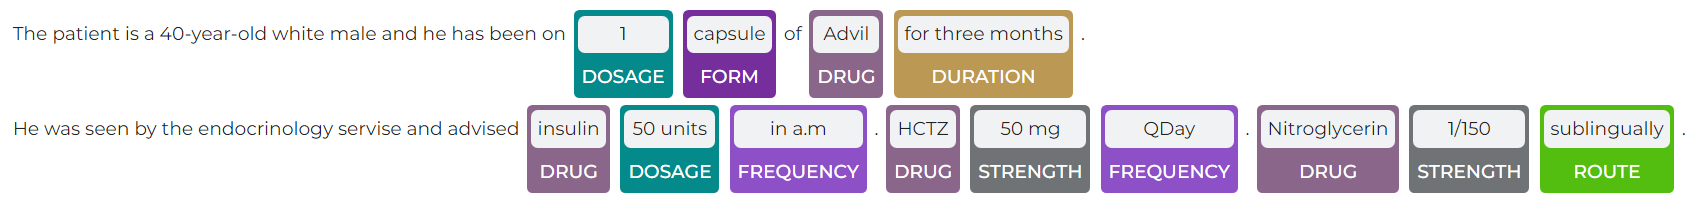

In [49]:
# NER model trained on i2b2 (sampled from MIMIC) dataset
posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

posology_ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

# greedy model
posology_ner_greedy = medical.NerModel.pretrained("ner_posology_greedy", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_greedy")

ner_converter_greedy = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner_greedy"])\
    .setOutputCol("ner_chunk_greedy")

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    posology_ner_converter,
    posology_ner_greedy,
    ner_converter_greedy])

empty_data = spark.createDataFrame([[""]]).toDF("text")

posology_model = nlpPipeline.fit(empty_data)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_posology download started this may take some time.
[OK!]
ner_posology_greedy download started this may take some time.
[OK!]

In [50]:
for clss in posology_ner.getClasses():
    print(clss)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

O
B-DOSAGE
B-STRENGTH
I-STRENGTH
B-ROUTE
B-FREQUENCY
I-FREQUENCY
B-DRUG
I-DRUG
B-FORM
I-DOSAGE
B-DURATION
I-DURATION
I-FORM
I-ROUTE

In [51]:
posology_result = posology_model.transform(mt_samples_df).cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
posology_result.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|          ner_greedy|    ner_chunk_greedy|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 1609, 16...|[{named_entity, 0...|[{chunk, 1609, 16...|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 742, 750...|[{named_entity, 0...|[{chunk, 742, 753...|
|    2|Sample T

In [53]:
# This will return a new DF with all the columns + id
posology_result = posology_result.withColumn("id", F.monotonically_increasing_id())

posology_result.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|          ner_greedy|    ner_chunk_greedy| id|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 1609, 16...|[{named_entity, 0...|[{chunk, 1609, 16...|  0|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 742, 750...|[{named_entity, 0...|[{chunk, 742, 753...|

In [54]:
posology_result.select('token.result','ner.result').show(truncate=100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, Discharge, Sum...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, BCCa, Excision...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, 

In [55]:
posology_result.select('token.result','ner.result').show(5, truncate=80)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|                                                                          result|                                                                          result|
+--------------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Nam...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Nam...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Nam...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O...|
|[Sample, Type, 

In [56]:
posology_result.select(F.explode(F.arrays_zip('token.result', 'ner.result', 'ner.metadata')).alias("cols")) \
               .select(F.expr("cols['0']").alias("token"),
                       F.expr("cols['1']").alias("ner_label"),
                       F.expr("cols['2']['confidence']").alias("confidence"))\
               .filter("ner_label!='O'")\
               .show(20, truncate=100)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-----------+----------+
|         token|  ner_label|confidence|
+--------------+-----------+----------+
|      Coumadin|     B-DRUG|    0.9989|
|             1| B-STRENGTH|    0.8618|
|            mg| I-STRENGTH|    0.5132|
|         daily|B-FREQUENCY|    0.9999|
|    Amiodarone|     B-DRUG|    0.9993|
|           100| B-STRENGTH|    0.8538|
|            mg| I-STRENGTH|    0.5216|
|           p.o|    B-ROUTE|    0.9992|
|         daily|B-FREQUENCY|    0.9928|
|      Coumadin|     B-DRUG|    0.9915|
|       Lovenox|     B-DRUG|    0.8314|
|            40| B-STRENGTH|    0.5199|
|            mg| I-STRENGTH|    0.5121|
|subcutaneously|    B-ROUTE|    0.9887|
|  chemotherapy|     B-DRUG|    0.9984|
|     cisplatin|     B-DRUG|    0.9257|
|            75| B-STRENGTH|    0.9574|
| mg/centimeter| I-STRENGTH|    0.5491|
|           109| B-STRENGTH|    0.5699|
|            mg| I-STRENGTH|    0.6355|
+--------------+-----------+----------+
only showing top 20 rows

In [57]:
posology_result.select('id', F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.begin', 'ner_chunk.end', 'ner_chunk.metadata')).alias("cols")) \
               .select('id', F.expr("cols['3']['sentence']").alias("sentence_id"),
                       F.expr("cols['0']").alias("chunk"),
                       F.expr("cols['1']").alias("begin"),
                       F.expr("cols['2']").alias("end"),
                       F.expr("cols['3']['entity']").alias("ner_label"),
                       F.expr("cols['3']['confidence']").alias("confidence"))\
               .filter("ner_label!='O'")\
               .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+----------------+-----+----+---------+----------+
|id |sentence_id|chunk           |begin|end |ner_label|confidence|
+---+-----------+----------------+-----+----+---------+----------+
|0  |33         |Coumadin        |1609 |1616|DRUG     |0.9989    |
|0  |33         |1 mg            |1618 |1621|STRENGTH |0.6875    |
|0  |33         |daily           |1623 |1627|FREQUENCY|0.9999    |
|0  |34         |Amiodarone      |1696 |1705|DRUG     |0.9993    |
|0  |34         |100 mg          |1707 |1712|STRENGTH |0.68770003|
|0  |34         |p.o             |1714 |1716|ROUTE    |0.9992    |
|0  |34         |daily           |1719 |1723|FREQUENCY|0.9928    |
|0  |58         |Coumadin        |2770 |2777|DRUG     |0.9915    |
|0  |60         |Lovenox         |2880 |2886|DRUG     |0.8314    |
|0  |60         |40 mg           |2888 |2892|STRENGTH |0.51600003|
|0  |60         |subcutaneously  |2894 |2907|ROUTE    |0.9887    |
|0  |72         |chemotherapy    |4436 |4447|DRUG     |0.9984 

In [58]:
posology_result.select('id', F.explode(F.arrays_zip('ner_chunk_greedy.result', 'ner_chunk_greedy.begin', 'ner_chunk_greedy.end', 'ner_chunk_greedy.metadata')).alias("cols")) \
               .select('id', F.expr("cols['3']['sentence']").alias("sentence_id"),
                        F.expr("cols['0']").alias("chunk"),
                        F.expr("cols['1']").alias("begin"),
                        F.expr("cols['2']").alias("end"),
                        F.expr("cols['3']['entity']").alias("ner_label"),
                        F.expr("cols['3']['confidence']").alias("confidence"))\
                .filter("ner_label!='O'")\
                .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+--------------------------------------------------------------+-----+----+---------+----------+
|id |sentence_id|chunk                                                         |begin|end |ner_label|confidence|
+---+-----------+--------------------------------------------------------------+-----+----+---------+----------+
|0  |33         |Coumadin 1 mg                                                 |1609 |1621|DRUG     |0.6126    |
|0  |33         |daily                                                         |1623 |1627|FREQUENCY|0.9962    |
|0  |34         |Amiodarone 100 mg p.o                                         |1696 |1716|DRUG     |0.64115   |
|0  |34         |daily                                                         |1719 |1723|FREQUENCY|0.9035    |
|0  |58         |Coumadin                                                      |2770 |2777|DRUG     |0.99      |
|0  |72         |chemotherapy                                                  |4436 |4447|DRUG 

In [59]:
posology_result.select('ner_chunk').take(2)[1][0][0].result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Xylocaine'

In [60]:
posology_result.select('ner_chunk').take(2)[1][0][0].metadata

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'sentence': '11', 'chunk': '0', 'ner_source': 'ner_chunk', 'entity': 'DRUG', 'confidence': '0.9906'}

In [61]:
posology_light_model = nlp.LightPipeline(posology_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely for 3 months .'

posology_light_result = posology_light_model.annotate(text)

print(*list(zip(posology_light_result['token'], posology_light_result['ner'])),sep="\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('The', 'O')
('patient', 'O')
('was', 'O')
('prescribed', 'O')
('1', 'B-DOSAGE')
('capsule', 'B-FORM')
('of', 'O')
('Advil', 'B-DRUG')
('for', 'B-DURATION')
('5', 'I-DURATION')
('days', 'I-DURATION')
('.', 'O')
('He', 'O')
('was', 'O')
('seen', 'O')
('by', 'O')
('the', 'O')
('endocrinology', 'O')
('service', 'O')
('and', 'O')
('she', 'O')
('was', 'O')
('discharged', 'O')
('on', 'O')
('40', 'B-DOSAGE')
('units', 'I-DOSAGE')
('of', 'O')
('insulin', 'B-DRUG')
('glargine', 'I-DRUG')
('at', 'B-FREQUENCY')
('night', 'I-FREQUENCY')
(',', 'O')
('12', 'B-DOSAGE')
('units', 'I-DOSAGE')
('of', 'O')
('insulin', 'B-DRUG')
('lispro', 'I-DRUG')
('with', 'B-FREQUENCY')
('meals', 'I-FREQUENCY')
(',', 'O')
('and', 'O')
('metformin', 'B-DRUG')
('1000', 'B-STRENGTH')
('mg', 'I-STRENGTH')
('two', 'B-FREQUENCY')
('times', 'I-FREQUENCY')
('a', 'I-FREQUENCY')
('day', 'I-FREQUENCY')
('.', 'O')
('It', 'O')
('was', 'O')
('determined', 'O')
('that', 'O')
('all', 'O')
('SGLT2', 'B-DRUG')
('inhibitors', 'I-DRUG')
(

In [62]:
print(*list(zip(posology_light_result['token'], posology_light_result['ner_greedy'])), sep="\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('The', 'O')
('patient', 'O')
('was', 'O')
('prescribed', 'O')
('1', 'B-DRUG')
('capsule', 'I-DRUG')
('of', 'I-DRUG')
('Advil', 'I-DRUG')
('for', 'B-DURATION')
('5', 'I-DURATION')
('days', 'I-DURATION')
('.', 'O')
('He', 'O')
('was', 'O')
('seen', 'O')
('by', 'O')
('the', 'O')
('endocrinology', 'O')
('service', 'O')
('and', 'O')
('she', 'O')
('was', 'O')
('discharged', 'O')
('on', 'O')
('40', 'B-DRUG')
('units', 'I-DRUG')
('of', 'I-DRUG')
('insulin', 'I-DRUG')
('glargine', 'I-DRUG')
('at', 'B-FREQUENCY')
('night', 'I-FREQUENCY')
(',', 'O')
('12', 'B-DRUG')
('units', 'I-DRUG')
('of', 'I-DRUG')
('insulin', 'I-DRUG')
('lispro', 'I-DRUG')
('with', 'B-FREQUENCY')
('meals', 'I-FREQUENCY')
(',', 'O')
('and', 'O')
('metformin', 'B-DRUG')
('1000', 'I-DRUG')
('mg', 'I-DRUG')
('two', 'B-FREQUENCY')
('times', 'I-FREQUENCY')
('a', 'I-FREQUENCY')
('day', 'I-FREQUENCY')
('.', 'O')
('It', 'O')
('was', 'O')
('determined', 'O')
('that', 'O')
('all', 'O')
('SGLT2', 'B-DRUG')
('inhibitors', 'I-DRUG')
('sh

In [63]:
cols = [
        'entities_ner_chunk',
        'entities_ner_chunk_class',
        'entities_ner_chunk_begin',
        'entities_ner_chunk_end',
       ]

posology_result_df = nlp.nlu.to_pretty_df(posology_light_model, text, positions=True, output_level='chunk')[cols]
spark.createDataFrame(posology_result_df.head(20)).show(truncate=50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------------+------------------------+----------------------+
|entities_ner_chunk|entities_ner_chunk_class|entities_ner_chunk_begin|entities_ner_chunk_end|
+------------------+------------------------+------------------------+----------------------+
|                 1|                  DOSAGE|                      27|                    27|
|           capsule|                    FORM|                      29|                    35|
|             Advil|                    DRUG|                      40|                    44|
|        for 5 days|                DURATION|                      46|                    55|
|          40 units|                  DOSAGE|                     126|                   133|
|  insulin glargine|                    DRUG|                     138|                   153|
|          at night|               FREQUENCY|                     155|                   162|
|          12 units|                  DOSAGE|               

In [64]:
cols = [
        'entities_ner_chunk_greedy',
        'entities_ner_chunk_greedy_class',
        'entities_ner_chunk_greedy_begin',
        'entities_ner_chunk_greedy_end',
       ]

posology_result_greedy_df = nlp.nlu.to_pretty_df(posology_light_model, text, positions=True, output_level='chunk')[cols]
# posology_result_greedy_df


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
posology_result_greedy_df.to_html().replace('\n','')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>entities_ner_chunk_greedy</th>      <th>entities_ner_chunk_greedy_class</th>      <th>entities_ner_chunk_greedy_begin</th>      <th>entities_ner_chunk_greedy_end</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1 capsule of Advil</td>      <td>DRUG</td>      <td>27</td>      <td>44</td>    </tr>    <tr>      <th>0</th>      <td>for 5 days</td>      <td>DURATION</td>      <td>46</td>      <td>55</td>    </tr>    <tr>      <th>0</th>      <td>40 units of insulin glargine</td>      <td>DRUG</td>      <td>126</td>      <td>153</td>    </tr>    <tr>      <th>0</th>      <td>at night</td>      <td>FREQUENCY</td>      <td>155</td>      <td>162</td>    </tr>    <tr>      <th>0</th>      <td>12 units of insulin lispro</td>      <td>DRUG</td>      <td>166</td>      <td>191</td>    </tr>    <tr>      <th>0</th>      <td>with meals</td>      <td>FREQUENCY</td>      <td>193</td

In [66]:
%%html
'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>entities_ner_chunk_greedy</th>      <th>entities_ner_chunk_greedy_class</th>      <th>entities_ner_chunk_greedy_begin</th>      <th>entities_ner_chunk_greedy_end</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1 capsule of Advil</td>      <td>DRUG</td>      <td>27</td>      <td>44</td>    </tr>    <tr>      <th>0</th>      <td>for 5 days</td>      <td>DURATION</td>      <td>46</td>      <td>55</td>    </tr>    <tr>      <th>0</th>      <td>40 units of insulin glargine</td>      <td>DRUG</td>      <td>126</td>      <td>153</td>    </tr>    <tr>      <th>0</th>      <td>at night</td>      <td>FREQUENCY</td>      <td>155</td>      <td>162</td>    </tr>    <tr>      <th>0</th>      <td>12 units of insulin lispro</td>      <td>DRUG</td>      <td>166</td>      <td>191</td>    </tr>    <tr>      <th>0</th>      <td>with meals</td>      <td>FREQUENCY</td>      <td>193</td>      <td>202</td>    </tr>    <tr>      <th>0</th>      <td>metformin 1000 mg</td>      <td>DRUG</td>      <td>210</td>      <td>226</td>    </tr>    <tr>      <th>0</th>      <td>two times a day</td>      <td>FREQUENCY</td>      <td>228</td>      <td>242</td>    </tr>    <tr>      <th>0</th>      <td>SGLT2 inhibitors</td>      <td>DRUG</td>      <td>273</td>      <td>288</td>    </tr>    <tr>      <th>0</th>      <td>for 3 months</td>      <td>DURATION</td>      <td>326</td>      <td>337</td>    </tr>    <tr>      <th>0</th>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>    </tr>    <tr>      <th>0</th>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>    </tr>    <tr>      <th>0</th>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>    </tr>    <tr>      <th>0</th>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>    </tr>    <tr>      <th>0</th>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>    </tr>  </tbody></table>'

,entities_ner_chunk_greedy,entities_ner_chunk_greedy_class,entities_ner_chunk_greedy_begin,entities_ner_chunk_greedy_end
0,1 capsule of Advil,DRUG,27,44
0,for 5 days,DURATION,46,55
0,40 units of insulin glargine,DRUG,126,153
0,at night,FREQUENCY,155,162
0,12 units of insulin lispro,DRUG,166,191
0,with meals,FREQUENCY,193,202
0,metformin 1000 mg,DRUG,210,226
0,two times a day,FREQUENCY,228,242
0,SGLT2 inhibitors,DRUG,273,288
0,for 3 months,DURATION,326,337


### Comparison of `ner_posology` and `ner_posology_greedy` results

In [67]:
posology_result_df.head(10).to_html().replace('\n',''),posology_result_greedy_df.head(10).to_html().replace('\n','')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>entities_ner_chunk</th>      <th>entities_ner_chunk_class</th>      <th>entities_ner_chunk_begin</th>      <th>entities_ner_chunk_end</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1</td>      <td>DOSAGE</td>      <td>27</td>      <td>27</td>    </tr>    <tr>      <th>0</th>      <td>capsule</td>      <td>FORM</td>      <td>29</td>      <td>35</td>    </tr>    <tr>      <th>0</th>      <td>Advil</td>      <td>DRUG</td>      <td>40</td>      <td>44</td>    </tr>    <tr>      <th>0</th>      <td>for 5 days</td>      <td>DURATION</td>      <td>46</td>      <td>55</td>    </tr>    <tr>      <th>0</th>      <td>40 units</td>      <td>DOSAGE</td>      <td>126</td>      <td>133</td>    </tr>    <tr>      <th>0</th>      <td>insulin glargine</td>      <td>DRUG</td>      <td>138</td>      <td>153</td>    </tr>    <tr>      <th>0</th>      <td>at night</td>      <td>FREQU

In [68]:
%%html
('<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>entities_ner_chunk</th>      <th>entities_ner_chunk_class</th>      <th>entities_ner_chunk_begin</th>      <th>entities_ner_chunk_end</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1</td>      <td>DOSAGE</td>      <td>27</td>      <td>27</td>    </tr>    <tr>      <th>0</th>      <td>capsule</td>      <td>FORM</td>      <td>29</td>      <td>35</td>    </tr>    <tr>      <th>0</th>      <td>Advil</td>      <td>DRUG</td>      <td>40</td>      <td>44</td>    </tr>    <tr>      <th>0</th>      <td>for 5 days</td>      <td>DURATION</td>      <td>46</td>      <td>55</td>    </tr>    <tr>      <th>0</th>      <td>40 units</td>      <td>DOSAGE</td>      <td>126</td>      <td>133</td>    </tr>    <tr>      <th>0</th>      <td>insulin glargine</td>      <td>DRUG</td>      <td>138</td>      <td>153</td>    </tr>    <tr>      <th>0</th>      <td>at night</td>      <td>FREQUENCY</td>      <td>155</td>      <td>162</td>    </tr>    <tr>      <th>0</th>      <td>12 units</td>      <td>DOSAGE</td>      <td>166</td>      <td>173</td>    </tr>    <tr>      <th>0</th>      <td>insulin lispro</td>      <td>DRUG</td>      <td>178</td>      <td>191</td>    </tr>    <tr>      <th>0</th>      <td>with meals</td>      <td>FREQUENCY</td>      <td>193</td>      <td>202</td>    </tr>  </tbody></table>', '<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>entities_ner_chunk_greedy</th>      <th>entities_ner_chunk_greedy_class</th>      <th>entities_ner_chunk_greedy_begin</th>      <th>entities_ner_chunk_greedy_end</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1 capsule of Advil</td>      <td>DRUG</td>      <td>27</td>      <td>44</td>    </tr>    <tr>      <th>0</th>      <td>for 5 days</td>      <td>DURATION</td>      <td>46</td>      <td>55</td>    </tr>    <tr>      <th>0</th>      <td>40 units of insulin glargine</td>      <td>DRUG</td>      <td>126</td>      <td>153</td>    </tr>    <tr>      <th>0</th>      <td>at night</td>      <td>FREQUENCY</td>      <td>155</td>      <td>162</td>    </tr>    <tr>      <th>0</th>      <td>12 units of insulin lispro</td>      <td>DRUG</td>      <td>166</td>      <td>191</td>    </tr>    <tr>      <th>0</th>      <td>with meals</td>      <td>FREQUENCY</td>      <td>193</td>      <td>202</td>    </tr>    <tr>      <th>0</th>      <td>metformin 1000 mg</td>      <td>DRUG</td>      <td>210</td>      <td>226</td>    </tr>    <tr>      <th>0</th>      <td>two times a day</td>      <td>FREQUENCY</td>      <td>228</td>      <td>242</td>    </tr>    <tr>      <th>0</th>      <td>SGLT2 inhibitors</td>      <td>DRUG</td>      <td>273</td>      <td>288</td>    </tr>    <tr>      <th>0</th>      <td>for 3 months</td>      <td>DURATION</td>      <td>326</td>      <td>337</td>    </tr>  </tbody></table>')

,entities_ner_chunk,entities_ner_chunk_class,entities_ner_chunk_begin,entities_ner_chunk_end
0,1,DOSAGE,27,27
0,capsule,FORM,29,35
0,Advil,DRUG,40,44
0,for 5 days,DURATION,46,55
0,40 units,DOSAGE,126,133
0,insulin glargine,DRUG,138,153
0,at night,FREQUENCY,155,162
0,12 units,DOSAGE,166,173
0,insulin lispro,DRUG,178,191
0,with meals,FREQUENCY,193,202


## Writing a generic NER function

**Generic NER Function with LightPipeline**

In [69]:
def get_light_model(embeddings, model_name = 'ner_clinical'):

  documentAssembler = nlp.DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")

  sentenceDetector = nlp.SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

  tokenizer = nlp.Tokenizer()\
      .setInputCols(["sentence"])\
      .setOutputCol("token")

  word_embeddings = nlp.WordEmbeddingsModel.pretrained(embeddings, "en", "clinical/models")\
      .setInputCols(["sentence", "token"])\
      .setOutputCol("embeddings")

  loaded_ner_model = medical.NerModel.pretrained(model_name, "en", "clinical/models") \
      .setInputCols(["sentence", "token", "embeddings"]) \
      .setOutputCol("ner")

  ner_converter = medical.NerConverterInternal() \
      .setInputCols(["sentence", "token", "ner"]) \
      .setOutputCol("ner_chunk")

  nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      loaded_ner_model,
      ner_converter])

  model = nlpPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

  return nlp.LightPipeline(model)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [70]:
embeddings = 'embeddings_clinical'

model_name = 'ner_clinical'

light_model = get_light_model(embeddings, model_name)

text = "I had a headache yesterday and took an Advil."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]

In [71]:
cols = [
        'entities_ner_chunk_origin_sentence',
        'entities_ner_chunk_begin',
        'entities_ner_chunk_end',
        'entities_ner_chunk',
        'entities_ner_chunk_class',
       ]

# nlp.nlu.to_pretty_df(light_model, text, positions=True, output_level='chunk')[cols].reset_index(drop=True)
df = nlp.nlu.to_pretty_df(light_model, text, positions=True, output_level='chunk')[cols].reset_index(drop=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
# %%display
spark.createDataFrame(df).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------+------------------------+----------------------+------------------+------------------------+
|entities_ner_chunk_origin_sentence|entities_ner_chunk_begin|entities_ner_chunk_end|entities_ner_chunk|entities_ner_chunk_class|
+----------------------------------+------------------------+----------------------+------------------+------------------------+
|                                 0|                       6|                    15|        a headache|                 PROBLEM|
|                                 0|                      36|                    43|          an Advil|               TREATMENT|
+----------------------------------+------------------------+----------------------+------------------+------------------------+

In [73]:
text ='''The patient was prescribed 1 capsule of Parol with meals .
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day .
It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'''

embeddings = 'embeddings_clinical'

model_name = 'ner_posology'

light_model = get_light_model(embeddings, model_name)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_posology download started this may take some time.
[OK!]

In [74]:
# %%display
spark.createDataFrame(nlp.nlu.to_pretty_df(light_model, text,positions=True, output_level='chunk')[cols].reset_index(drop=True)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------+------------------------+----------------------+------------------+------------------------+
|entities_ner_chunk_origin_sentence|entities_ner_chunk_begin|entities_ner_chunk_end|entities_ner_chunk|entities_ner_chunk_class|
+----------------------------------+------------------------+----------------------+------------------+------------------------+
|                                 0|                      27|                    27|                 1|                  DOSAGE|
|                                 0|                      29|                    35|           capsule|                    FORM|
|                                 0|                      40|                    44|             Parol|                    DRUG|
|                                 0|                      46|                    55|        with meals|               FREQUENCY|
|                                 1|                     126|                   133|          40 

## PHI NER

**Entities**
- AGE
- CONTACT
- DATE
- ID
- LOCATION
- NAME
- PROFESSION

In [75]:
embeddings = 'embeddings_clinical'

model_name = 'ner_deid_subentity_augmented'

# deidentify_dl
# ner_deid_sd
# ner_deid_large
# ner_deid_generic_augmented
# ner_deid_subentity_augmented
# ner_deid_subentity_augmented_i2b2

text = """Miriam BRAY is a 41-year-old female from Vietnam and she was admitted for a right-sided pleural effusion for thoracentesis on Monday by Dr. X. Her Coumadin was placed on hold.
She was instructed to followup with Dr. XYZ in the office to check her INR On August 24, 2007 ."""

light_model = get_light_model(embeddings, model_name)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]

In [76]:
df = nlp.nlu.to_pretty_df(light_model, text,positions=True, output_level='chunk')[cols].reset_index(drop=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [77]:
%%display
spark.createDataFrame(df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

## Oncology NER

There are several Oncology NER models in Spark NLP. We will show an example of `new_oncology_wip` model here.

**Entities**

| | | | |
|-|-|-|-|
| Invasion | Dosage | Hormonal_Therapy | Site_Lung |
| Biomarker_Result | Response_To_Treatment | Oncogene | Relative_Date |
| Site_Bone | Histological_Type | Radiation_Dose | Age |
| Duration | Grade | Tumor_Size | Line_Of_Therapy |
| Site_Breast | Cancer_Surgery | Smoking_Status | Imaging_Test |
| Adenopathy | Targeted_Therapy | Radiotherapy | Metastasis |
| Date | Cycle_Number | Pathology_Result | Cancer_Score |
| Cancer_Dx | Death_Entity | Site_Liver | Site_Brain |
| Pathology_Test | Chemotherapy | Biomarker | Frequency |
| Site_Lymph_Node | Performance_Status | Unspecific_Therapy | Cycle_Count |
| Race_Ethnicity | Gender | Staging | Immunotherapy |
| Site_Other_Body_Part | Tumor_Finding | Route | Cycle_Day |
| Direction| | | |

You can check [Oncology Model Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/27.Oncology_Model.ipynb) for more examples.


In [78]:
mt_samples_df.limit(1).collect()[0]["text"]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Sample Type / Medical Specialty:\nHematology - Oncology\nSample Name:\nDischarge Summary - Mesothelioma - 1\nDescription:\nMesothelioma, pleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.\n(Medical Transcription Sample Report)\nPRINCIPAL DIAGNOSIS:\nMesothelioma.\nSECONDARY DIAGNOSES:\nPleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.\nPROCEDURES\n1. On August 24, 2007, decortication of the lung with pleural biopsy and transpleural fluoroscopy.\n2. On August 20, 2007, thoracentesis.\n3. On August 31, 2007, Port-A-Cath placement.\nHISTORY AND PHYSICAL:\nThe patient is a 41-year-old Vietnamese female with a nonproductive cough that started last week. She has had right-sided chest pain radiating to her back with fever starting yesterday. She has a history of pericarditis and pericardectomy in May 2006 and developed cough with right-sided chest pain, and went to a

In [79]:
embeddings = 'embeddings_clinical'

model_name = 'ner_oncology'

text =  mt_samples_df.limit(1).collect()[0]["text"]

light_model = get_light_model(embeddings, model_name)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_oncology download started this may take some time.
[OK!]

In [80]:
spark.createDataFrame(nlp.nlu.to_pretty_df(light_model, text, positions=True, output_level='chunk')[cols].head(20).reset_index(drop=True)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------+------------------------+----------------------+--------------------+------------------------+
|entities_ner_chunk_origin_sentence|entities_ner_chunk_begin|entities_ner_chunk_end|  entities_ner_chunk|entities_ner_chunk_class|
+----------------------------------+------------------------+----------------------+--------------------+------------------------+
|                                 0|                     118|                   129|        Mesothelioma|               Cancer_Dx|
|                                 4|                     471|                   485|     August 24, 2007|                    Date|
|                                 4|                     488|                   500|       decortication|          Cancer_Surgery|
|                                 4|                     509|                   512|                lung|               Site_Lung|
|                                 4|                     519|                   525

## NER Chunker
We can extract phrases that fits into a known pattern using the NER tags. NerChunker would be quite handy to extract entity groups with neighboring tokens when there is no pretrained NER model to address certain issues. Lets say we want to extract drug and frequency together as a single chunk even if there are some unwanted tokens between them.

In [81]:
posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_chunker = medical.NerChunker()\
    .setInputCols(["sentence","ner"])\
    .setOutputCol("ner_chunk")\
    .setRegexParsers(["<DRUG>.*<FREQUENCY>"])

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    ner_chunker])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ner_chunker_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_posology download started this may take some time.
[OK!]

In [82]:
print(*posology_ner.getClasses(),sep='\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

O
B-DOSAGE
B-STRENGTH
I-STRENGTH
B-ROUTE
B-FREQUENCY
I-FREQUENCY
B-DRUG
I-DRUG
B-FORM
I-DOSAGE
B-DURATION
I-DURATION
I-FORM
I-ROUTE

In [83]:
light_model = nlp.LightPipeline(ner_chunker_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_result = light_model.annotate(text)

print(*list(zip(light_result['token'], light_result['ner'])),sep='\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('The', 'O')
('patient', 'O')
('was', 'O')
('prescribed', 'O')
('1', 'B-DOSAGE')
('capsule', 'B-FORM')
('of', 'O')
('Advil', 'B-DRUG')
('for', 'B-DURATION')
('5', 'I-DURATION')
('days', 'I-DURATION')
('.', 'O')
('He', 'O')
('was', 'O')
('seen', 'O')
('by', 'O')
('the', 'O')
('endocrinology', 'O')
('service', 'O')
('and', 'O')
('she', 'O')
('was', 'O')
('discharged', 'O')
('on', 'O')
('40', 'B-DOSAGE')
('units', 'I-DOSAGE')
('of', 'O')
('insulin', 'B-DRUG')
('glargine', 'I-DRUG')
('at', 'B-FREQUENCY')
('night', 'I-FREQUENCY')
(',', 'O')
('12', 'B-DOSAGE')
('units', 'I-DOSAGE')
('of', 'O')
('insulin', 'B-DRUG')
('lispro', 'I-DRUG')
('with', 'B-FREQUENCY')
('meals', 'I-FREQUENCY')
(',', 'O')
('metformin', 'B-DRUG')
('1000', 'B-STRENGTH')
('mg', 'I-STRENGTH')
('two', 'B-FREQUENCY')
('times', 'I-FREQUENCY')
('a', 'I-FREQUENCY')
('day', 'I-FREQUENCY')
('.', 'O')
('It', 'O')
('was', 'O')
('determined', 'O')
('that', 'O')
('all', 'O')
('SGLT2', 'B-DRUG')
('inhibitors', 'I-DRUG')
('should', 'O'

In [84]:
light_result["ner_chunk"]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day']

## Chunk Filterer
ChunkFilterer will allow you to filter out named entities by some conditions or predefined look-up lists, so that you can feed these entities to other annotators like Assertion Status or Entity Resolvers. It can be used with two criteria: isin and regex.

In [85]:
posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

chunk_filterer = medical.ChunkFilterer()\
    .setInputCols("sentence","ner_chunk")\
    .setOutputCol("chunk_filtered")\
    .setCriteria("isin")\
    .setWhiteList(['ADVIL','Metformin', 'Insulin Lispro'])\
    .setCaseSensitive(False)

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    ner_converter,
    chunk_filterer])

empty_data = spark.createDataFrame([[""]]).toDF("text")

chunk_filter_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_posology download started this may take some time.
[OK!]

In [86]:
light_model = nlp.LightPipeline(chunk_filter_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_result = light_model.annotate(text)

light_result.keys()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

dict_keys(['document', 'ner_chunk', 'chunk_filtered', 'token', 'ner', 'embeddings', 'sentence'])

In [87]:
light_result['ner_chunk']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['1', 'capsule', 'Advil', 'for 5 days', '40 units', 'insulin glargine', 'at night', '12 units', 'insulin lispro', 'with meals', 'metformin', '1000 mg', 'two times a day', 'SGLT2 inhibitors']

In [88]:
light_result['chunk_filtered']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Advil', 'insulin lispro', 'metformin']

In [89]:
ner_model = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence","token","embeddings")\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

chunk_filterer = medical.ChunkFilterer()\
    .setInputCols("sentence","ner_chunk")\
    .setOutputCol("chunk_filtered")\
    .setCriteria("isin")\
    .setWhiteList(['severe fever','sore throat'])

#   .setCriteria("regex")\

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    ner_model,
    ner_converter,
    chunk_filterer])

empty_data = spark.createDataFrame([[""]]).toDF("text")

chunk_filter_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_clinical download started this may take some time.
[OK!]

In [90]:
text = 'Patient with severe fever, severe cough, sore throat, stomach pain, and a headache.'

filter_df = spark.createDataFrame([[text]]).toDF("text")

chunk_filter_result = chunk_filter_model.transform(filter_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
chunk_filter_result.select('ner_chunk.result','chunk_filtered.result').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------------------+---------------------------+
|result                                                             |result                     |
+-------------------------------------------------------------------+---------------------------+
|[severe fever, severe cough, sore throat, stomach pain, a headache]|[severe fever, sore throat]|
+-------------------------------------------------------------------+---------------------------+

## Changing entity labels with `NerConverterInternal()`

There are two parameters in `NerConverterInternal()` annotator for replacing the labels.

+ `.setReplaceLabels`: You can just create a dictionary with the labels and their new values in this parameter.

```python
jsl_ner_converter_internal = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("replaced_ner_chunk")\
    .setReplaceLabels({"Drug_BrandName": "Drug",
                       "Frequency": "Drug_Frequency",
                       "Dosage": "Drug_Dosage",
                       "Strength": "Drug_Strength"})
```

+ `.setReplaceDictResource`: You can feed a file that contains the labels and their new values in a dictionary format.

```python
replace_dict = """Drug_BrandName,Drug
Frequency,Drug_Frequency
Dosage,Drug_Dosage
Strength,Drug_Strength
"""
with open('replace_dict.csv', 'w') as f:
    f.write(replace_dict)

...
jsl_ner_converter_internal = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("replaced_ner_chunk")\
    .setReplaceDictResource("replace_dict.csv","text", {"delimiter":","})
...
```



You can check [NerConverterInternal Annotator Page](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#nerconverterinternal) for more details.

In [92]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models") \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

jsl_ner = medical.NerModel.pretrained("ner_jsl", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("jsl_ner")

jsl_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "jsl_ner"]) \
    .setOutputCol("jsl_ner_chunk")

jsl_ner_converter_internal = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("replaced_ner_chunk")\
    .setReplaceLabels({"Drug_BrandName": "Drug",
                       "Frequency": "Drug_Frequency",
                       "Dosage": "Drug_Dosage",
                       "Strength": "Drug_Strength"})

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter,
    jsl_ner_converter_internal
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ner_converter_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_jsl download started this may take some time.
[OK!]

In [93]:
text ='The patient was prescribed 1 capsule of Parol with meals. He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

#light_model = LightPipeline(ner_converter_model)

cols = [
     'entities_jsl_ner_chunk_origin_sentence',
     'entities_jsl_ner_chunk_begin',
     'entities_jsl_ner_chunk_end',
     'entities_jsl_ner_chunk',
     'entities_jsl_ner_chunk_class',
     'entities_replaced_ner_chunk_class'
]
spark.createDataFrame(nlp.nlu.to_pretty_df(ner_converter_model,text,positions=True,output_level='chunk')[cols].head(20)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------+----------------------------+--------------------------+----------------------+----------------------------+---------------------------------+
|entities_jsl_ner_chunk_origin_sentence|entities_jsl_ner_chunk_begin|entities_jsl_ner_chunk_end|entities_jsl_ner_chunk|entities_jsl_ner_chunk_class|entities_replaced_ner_chunk_class|
+--------------------------------------+----------------------------+--------------------------+----------------------+----------------------------+---------------------------------+
|                                     0|                          27|                        35|             1 capsule|                      Dosage|                      Drug_Dosage|
|                                     0|                          40|                        44|                 Parol|              Drug_BrandName|                             Drug|
|                                     1|                          58|                

### Adding `setIgnoreStopWords` parameter to control chunk generation.
By providing `setIgnoreStopWords`, we can ignore certain words or characters while creating a chunk. <br/>

It should be a list of tokens/words or characters, and when two entities of the same type are separated by those words, these entities can be combined to produce a single, larger chunk.






Firstly let's create `NerConverterInternal()` without this parameter

In [94]:
jsl_ner= medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models")\
      .setInputCols(["sentence", "token", "embeddings"])\
      .setOutputCol("ner_deid")\
      .setLabelCasing('upper')

jsl_ner_converter_internal= medical.NerConverterInternal()\
        .setInputCols(["sentence", "token", "ner_deid"])\
        .setOutputCol("chunk_deid")\
        .setGreedyMode(True)\
        .setWhiteList(['LOCATION'])

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter_internal
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ner_converter_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_deid_generic_augmented download started this may take some time.
[OK!]

In [95]:
#from sparknlp_display import NerVisualizer

text = """
The address of the manufacturer:
R K Industry House, Walbhat Rd
Mumbai, Maharashtra, India
"""

lmodel= nlp.LightPipeline(ner_converter_model)
res = lmodel.fullAnnotate(text)[0]

In [95]:
nlp.viz.NerVisualizer().display(res, 'chunk_deid',return_html=True)
#copy the output and paste under %%html command in next cell

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<IPython.core.display.HTML object>

In [96]:
%%html
'<style>    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');\n    \n    .spark-nlp-display-scroll-entities {\n        border: 1px solid #E7EDF0;\n        border-radius: 3px;\n        text-align: justify;\n        \n    }\n    .spark-nlp-display-scroll-entities span {  \n        font-size: 14px;\n        line-height: 24px;\n        color: #536B76;\n        font-family: \'Montserrat\', sans-serif !important;\n    }\n    \n    .spark-nlp-display-entity-wrapper{\n    \n        display: inline-grid;\n        text-align: center;\n        border-radius: 4px;\n        margin: 0 2px 5px 2px;\n        padding: 1px\n    }\n    .spark-nlp-display-entity-name{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        background: #f1f2f3;\n        border-width: medium;\n        text-align: center;\n        \n        font-weight: 400;\n        \n        border-radius: 5px;\n        padding: 2px 5px;\n        display: block;\n        margin: 3px 2px;\n    \n    }\n    .spark-nlp-display-entity-type{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-entity-resolution{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Vistol Regular\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-others{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        font-weight: 400;\n    }\n\n</style>\n <span class="spark-nlp-display-others" style="background-color: white"><br>The address of the manufacturer:<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #64AF97"><span class="spark-nlp-display-entity-name">R K Industry House </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #64AF97"><span class="spark-nlp-display-entity-name">Walbhat Rd </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #64AF97"><span class="spark-nlp-display-entity-name">Mumbai </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #64AF97"><span class="spark-nlp-display-entity-name">Maharashtra </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #64AF97"><span class="spark-nlp-display-entity-name">India </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span></div>'

In [97]:
#from sparknlp_display import NerVisualizer

text = """
The address of the manufacturer:
R K Industry House, Walbhat Rd
Mumbai, Maharashtra, India
"""

lmodel= nlp.LightPipeline(ner_converter_model)
res = lmodel.fullAnnotate(text)[0]



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<IPython.core.display.HTML object>

In [98]:
nlp.viz.NerVisualizer().display(res, 'chunk_deid', return_html = True)
#copy the output and paste under %%html command in next cell

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
%%html
'\n<style>\n    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');\n    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');\n    \n    .spark-nlp-display-scroll-entities {\n        border: 1px solid #E7EDF0;\n        border-radius: 3px;\n        text-align: justify;\n        \n    }\n    .spark-nlp-display-scroll-entities span {  \n        font-size: 14px;\n        line-height: 24px;\n        color: #536B76;\n        font-family: \'Montserrat\', sans-serif !important;\n    }\n    \n    .spark-nlp-display-entity-wrapper{\n    \n        display: inline-grid;\n        text-align: center;\n        border-radius: 4px;\n        margin: 0 2px 5px 2px;\n        padding: 1px\n    }\n    .spark-nlp-display-entity-name{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        background: #f1f2f3;\n        border-width: medium;\n        text-align: center;\n        \n        font-weight: 400;\n        \n        border-radius: 5px;\n        padding: 2px 5px;\n        display: block;\n        margin: 3px 2px;\n    \n    }\n    .spark-nlp-display-entity-type{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-entity-resolution{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Vistol Regular\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-others{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        font-weight: 400;\n    }\n\n</style>\n <span class="spark-nlp-display-others" style="background-color: white"><br>The address of the manufacturer:<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #94AB8B"><span class="spark-nlp-display-entity-name">R K Industry House </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #94AB8B"><span class="spark-nlp-display-entity-name">Walbhat Rd </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #94AB8B"><span class="spark-nlp-display-entity-name">Mumbai </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #94AB8B"><span class="spark-nlp-display-entity-name">Maharashtra </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white">, </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #94AB8B"><span class="spark-nlp-display-entity-name">India </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span></div>'

Now, let's define some characters and words with the `setIgnoreStopWords()` parameter and see the difference between the chunks.

In [100]:
jsl_ner_converter_internal= medical.NerConverterInternal()\
        .setInputCols(["sentence", "token", "ner_deid"])\
        .setOutputCol("chunk_deid")\
        .setGreedyMode(True)\
        .setWhiteList(['LOCATION'])\
        .setIgnoreStopWords(['\n', ',', "and", 'or', '.'])

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter_internal
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ner_converter_model = nlpPipeline.fit(empty_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
lmodel= nlp.LightPipeline(ner_converter_model)
res = lmodel.fullAnnotate(text)[0]



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<IPython.core.display.HTML object>

In [102]:
# nlp.viz.NerVisualizer().display(res, 'chunk_deid', return_html = True)
#copy the output and paste under %%html command in next cell

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [103]:
%%html
'\n<style>\n    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');\n    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');\n    \n    .spark-nlp-display-scroll-entities {\n        border: 1px solid #E7EDF0;\n        border-radius: 3px;\n        text-align: justify;\n        \n    }\n    .spark-nlp-display-scroll-entities span {  \n        font-size: 14px;\n        line-height: 24px;\n        color: #536B76;\n        font-family: \'Montserrat\', sans-serif !important;\n    }\n    \n    .spark-nlp-display-entity-wrapper{\n    \n        display: inline-grid;\n        text-align: center;\n        border-radius: 4px;\n        margin: 0 2px 5px 2px;\n        padding: 1px\n    }\n    .spark-nlp-display-entity-name{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        background: #f1f2f3;\n        border-width: medium;\n        text-align: center;\n        \n        font-weight: 400;\n        \n        border-radius: 5px;\n        padding: 2px 5px;\n        display: block;\n        margin: 3px 2px;\n    \n    }\n    .spark-nlp-display-entity-type{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-entity-resolution{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Vistol Regular\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-others{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        font-weight: 400;\n    }\n\n</style>\n <span class="spark-nlp-display-others" style="background-color: white"><br>The address of the manufacturer:<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #1AAB77"><span class="spark-nlp-display-entity-name">R K Industry House, Walbhat Rd </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #1AAB77"><span class="spark-nlp-display-entity-name">Mumbai, Maharashtra, India </span><span class="spark-nlp-display-entity-type">LOCATION</span></span><span class="spark-nlp-display-others" style="background-color: white"><br></span></div>'

## Downloading Pretrained Models

- When we use `.pretrained` method, model is downloaded to  a folder named `cache_pretrained` automatically and it is loaded from this folder if you run it again.

- In order to download the models manually to any folder, you can use `ResourceDownloader.downloadModelDirectly` from `sparknlp.pretrained` or AWS CLI (steps below). In this case you should use `.load()` method.

  - Install AWS CLI to your local computer following the steps [here](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2-linux.html) for Linux and [here](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2-mac.html) for MacOS.

  - Then configure your AWS credentials.

  - Go to models hub and look for the model you need.

  - Select the model you found and you will see the model card that shows all the details about that model.

  - Hover the Download button on that page and you will see the download link from the S3 bucket.


In [104]:
#The first argument is the path to the zip file and the second one is the folder.
nlp.ResourceDownloader.downloadModelDirectly("clinical/models/ner_jsl_en_3.1.0_2.4_1624566960534.zip", "cache_pretrained")

#or you can use the classic AWS CLI
# !aws s3 cp --region us-east-2 s3://auxdata.johnsnowlabs.com/clinical/models/ner_jsl_en_3.1.0_2.4_1624566960534.zip .

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Training a Clinical NER (NCBI Disease Dataset)

`CoNLL(includeDocId=True).readDataset(spark, "conll_file.txt")`  this methos can allow if you have doc_id information in the conll file, you can add this information to the dataframe as a column.

```
conll="""-DOCSTART- -X- -1- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O

-DOCSTART- -X- 2 O

Rare NNP B-NP O
Hendrix NNP I-NP B-PER

-DOCSTART- -X- -3-1- O

China NNP B-NP B-LOC
says VBZ B-VP O

-DOCSTART-

China NNP B-NP B-LOC
says VBZ B-VP O
"""
```
```
with open('conll_file.txt', 'w') as f:
    f.write(conll)

data = CoNLL(includeDocId=True).readDataset(spark, "conll_file.txt")

data.show()
```



```
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|doc_id|                text|            document|            sentence|               token|                 pos|               label|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     1|EU rejects German...|[{document, 0, 28...|[{document, 0, 47...|[{token, 0, 1, EU...|[{pos, 0, 1, NNP,...|[{named_entity, 0...|
|     2|Rare Hendrix song...|[{document, 0, 97...|[{document, 0, 50...|[{token, 0, 3, Ra...|[{pos, 0, 3, NNP,...|[{named_entity, 0...|
|   3-1|China says Taiwan...|[{document, 0, 13...|[{document, 0, 46...|[{token, 0, 4, Ch...|[{pos, 0, 4, NNP,...|[{named_entity, 0...|
|     X|China says Taiwan...|[{document, 0, 13...|[{document, 0, 46...|[{token, 0, 4, Ch...|[{pos, 0, 4, NNP,...|[{named_entity, 0...|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
```

In [ ]:
# !wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltrain.txt
# !wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltest.txt

In [3]:
conll_data = nlp.CoNLL().readDataset(spark, 's3://emr-data-jsl/NER_NCBIconlltrain.txt')

conll_data.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Identification of...|[{document, 0, 89...|[{document, 0, 89...|[{token, 0, 13, I...|[{pos, 0, 13, NN,...|[{named_entity, 0...|
|The adenomatous p...|[{document, 0, 21...|[{document, 0, 21...|[{token, 0, 2, Th...|[{pos, 0, 2, NN, ...|[{named_entity, 0...|
|Complex formation...|[{document, 0, 63...|[{document, 0, 63...|[{token, 0, 6, Co...|[{pos, 0, 6, NN, ...|[{named_entity, 0...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows

In [4]:
conll_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3266

In [7]:
conll_data.select(F.explode(F.arrays_zip(conll_data.token.result,
                                         conll_data.label.result)).alias("cols")) \
          .select(F.expr("cols['0']").alias("token"),
                  F.expr("cols['1']").alias("ground_truth"))\
          .groupBy('ground_truth')\
          .count()\
          .orderBy('count', ascending=False)\
          .show(100,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|ground_truth|count|
+------------+-----+
|O           |75093|
|I-Disease   |3547 |
|B-Disease   |3093 |
+------------+-----+

In [8]:
conll_data.select("label.result").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1537

In [ ]:
# '''
# As you can see, there are too many `O` labels in the dataset.
# To make it more balanced, we can drop the sentences have only O labels.
# (`c>1` means we drop all the sentences that have no valuable labels other than `O`)
# '''

# '''
# conll_data = conll_data.withColumn('unique', F.array_distinct("label.result"))\
#                        .withColumn('c', F.size('unique'))\
#                        .filter(F.col('c')>1)

# conll_data.select(F.explode(F.arrays_zip(conll_data.token.result,conll_data.label.result)).alias("cols")) \
#           .select(F.expr("cols['0']").alias("token"),
#                   F.expr("cols['1']").alias("ground_truth"))\
#           .groupBy('ground_truth')\
#           .count()\
#           .orderBy('count', ascending=False)\
#           .show(100,truncate=False)
# '''

In [4]:
# Clinical word embeddings trained on PubMED dataset
clinical_embeddings = nlp.WordEmbeddingsModel.pretrained('embeddings_clinical', "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]

In [5]:
test_data = nlp.CoNLL().readDataset(spark, 's3://emr-data-jsl/NER_NCBIconlltest.txt')

test_data = clinical_embeddings.transform(test_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
test_data.write.mode("overwrite").parquet('NER_NCBIconlltest.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
%%sh
hdfs dfs -ls /user/livy

Found 3 items
drwxr-xr-x   - livy livy          0 2023-09-07 20:54 /user/livy/.sparkStaging
drwxr-xr-x   - livy livy          0 2023-09-07 20:58 /user/livy/NER_NCBIconlltest.parquet
drwxr-xr-x   - livy livy          0 2023-09-07 20:57 /user/livy/cache_pretrained


SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/lib/hadoop/lib/slf4j-log4j12-1.7.25.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/share/aws/emr/emrfs/lib/slf4j-log4j12-1.7.12.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]


### NERDL Graph

We will use `TFGraphBuilder` annotator which can be used to create graphs in the model training pipeline. `TFGraphBuilder` inspects the data and creates the proper graph if a suitable version of TensorFlow is available. The graph is stored in the defined folder and loaded by the `MedicalNerApproach` annotator.

In [43]:
from sparknlp_jsl.annotator import TFGraphBuilder

graph_folder= "medical_ner_graphs"

ner_graph_builder = TFGraphBuilder()\
    .setModelName("ner_dl")\
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setLabelColumn("label")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("blstm_3_200_20_85.pb")\
    .setMaxSequenceLength(250)\
    .setHiddenUnitsNumber(25)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# TensorFlow graph file (`.pb` extension) can be produced for NER training externally.
# If this method is used, graph folder should be added to MedicalNerApproach training
# model as `.setGraphFolder(graph_folder_path)` .

'''
medical.tf_graph.print_model_params("ner_dl")

graph_folder_path = "medical_ner_graphs"

medical.tf_graph.build("ner_dl",
               build_params={"embeddings_dim": 200,
                             "nchars": 85,
                             "ntags": 3,
                             "is_medical": 1},
               model_location=graph_folder_path,
               model_filename="auto")
'''

We will use `setEarlyStoppingCriterion` and `setEarlyStoppingPatience` parameters to stop training if it doesn't improve any more. Also, these parameters will provide us to save time and resources.

- `setEarlyStoppingCriterion(float)`: This parameter is used to set the minimal improvement of the test metric to terminate training. The metric monitored is the same which is used to save the best best model (macro F1 if using test or validation set, loss otherwise). If it is F1, then training is stopped if `F1_current - F1_previous < earlyStoppingCriterion`. If monitoring loss, then training is stopped if `loss_previous - loss_current < earlyStoppingCriterion`. If earlyStoppingCriterion is `0`, then no early stopping is applied. Default is `0`.

- `setEarlyStoppingPatience(int)`: This is the number of epoch without improvement which will be tolerated. Default is `0`, which means that early stopping will occur at the first time when performance in the current epoch is no better than in the previous epoch (taking earlyStoppingCriterion into account).

In [44]:
nerTagger = medical.NerApproach()\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setLabelColumn("label")\
    .setOutputCol("ner")\
    .setMaxEpochs(30)\
    .setBatchSize(64)\
    .setRandomSeed(0)\
    .setVerbose(1)\
    .setValidationSplit(0.2)\
    .setEvaluationLogExtended(True) \
    .setEnableOutputLogs(True)\
    .setIncludeConfidence(True)\
    .setOutputLogsPath('ner_logs')\
    .setTestDataset("NER_NCBIconlltest.parquet")\
    .setUseBestModel(True)\
    .setEarlyStoppingCriterion(0.04)\
    .setEarlyStoppingPatience(3)\
    .setGraphFile(f"{graph_folder}/blstm_3_200_20_85.pb")\
    .setGraphFolder(graph_folder)
   # .setEnableMemoryOptimizer(True) #>> if you have a limited memory and a large conll file, you can set this True to train batch by batch

ner_pipeline = nlp.Pipeline(stages=[
          clinical_embeddings,
          ner_graph_builder,
          nerTagger
 ])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

You can visit [1.4.Resume_MedicalNer_Model_Training.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/1.4.Resume_MedicalNer_Model_Training.ipynb) notebook for fine-tuning pretrained NER models and more details of `MedicalNerApproach()` parameters.

In [45]:
ner_model = ner_pipeline.fit(conll_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

TF Graph Builder configuration:
Model name: ner_dl
Graph folder: tfgraphs
Graph file name: nerdl_graph.pb
Build params: {'ntags': 3, 'embeddings_dim': 200, 'nchars': 85, 'is_medical': True, 'lstm_size': 25}
ner_dl graph exported to tfgraphs/nerdl_graph.pb

If you get an error for incompatible TF graph, use [4.1 NerDL-Graph](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Public/4.1_NerDL_Graph.ipynb) notebook in public folder to create a graph

Licensed users can also use [17.Graph_builder_for_DL_models.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/17.Graph_builder_for_DL_models.ipynb) to create TF graphs easily.

Let's check the results saved in the log file.

In [48]:
%%sh
hdfs dfs -cat /user/livy/ner_logs/MedicalNerApproach_*.log

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

As you see above, our **earlyStopping** feature worked, trainining was terminated before 30th epoch.

### Evaluate your model

In [29]:
pred_df = ner_model.stages[2].transform(test_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
pred_df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['text', 'document', 'sentence', 'token', 'pos', 'label', 'embeddings', 'ner']

In [31]:
evaler = medical.NerDLMetrics(mode="full_chunk")

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label", drop_o = True, case_sensitive = True).cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
           .withColumn("recall", F.round(eval_result["recall"],4))\
           .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+-----+-----+-----+---------+------+------+
| entity|   tp|   fp|   fn|total|precision|recall|    f1|
+-------+-----+-----+-----+-----+---------+------+------+
|Disease|485.0|150.0|219.0|704.0|   0.7638|0.6889|0.7244|
+-------+-----+-----+-----+-----+---------+------+------+

+------------------+
|             macro|
+------------------+
|0.7244212098581031|
+------------------+

None
+------------------+
|             micro|
+------------------+
|0.7244212098581031|
+------------------+

None

In [32]:
evaler = medical.NerDLMetrics(mode="partial_chunk_per_token")

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label", drop_o = True, case_sensitive = True).cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
           .withColumn("recall", F.round(eval_result["recall"],4))\
           .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------+-----+-----+------+---------+------+------+
| entity|    tp|   fp|   fn| total|precision|recall|    f1|
+-------+------+-----+-----+------+---------+------+------+
|Disease|1172.0|137.0|325.0|1497.0|   0.8953|0.7829|0.8354|
+-------+------+-----+-----+------+---------+------+------+

+------------------+
|             macro|
+------------------+
|0.8353528153955809|
+------------------+

None
+------------------+
|             micro|
+------------------+
|0.8353528153955808|
+------------------+

None

`ner_utils`: This new module is used after NER training to calculate mertic chunkbase and plot training logs.

`evaluate`: if verbose, returns overall performance, as well as performance per chunk type; otherwise, simply returns overall precision, recall, f1 scores

`loss_plot`: Plots the figure of loss vs epochs

`get_charts` : Plots the figures of metrics ( precision, recall, f1) vs epochs

```
import sparknlp_jsl
from sparknlp_jsl.training_log_parser import ner_log_parser
parser = ner_log_parser()

pred_df = ner_model.stages[2].transform(test_data)

pred_df = pred_df.select(F.explode(F.arrays_zip(pred_df.ner.result,
                                                pred_df.label.result)).alias("cols"))\
                 .select(F.expr("cols['0']").alias("prediction"),
                         F.expr("cols['1']").alias("ground_truth"))
                 
df = pred_df.toPandas()


metrics = parser.evaluate( df['prediction'].values, df['ground_truth'].values)

parser.loss_plot(f"./ner_logs/{log_file}")

parser.get_charts('./ner_logs/'+log_file)
```

In [33]:
ner_model.stages[2].write().overwrite().save('s3://emr-data-jsl/models/custom_NER_model')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
document = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence = nlp.SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentence')

token = nlp.Tokenizer()\
    .setInputCols(['sentence'])\
    .setOutputCol('token')

loaded_ner_model = medical.NerModel.load("s3://emr-data-jsl/models/custom_NER_model")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

converter = medical.NerConverterInternal()\
    .setInputCols(["document", "token", "ner"])\
    .setOutputCol("ner_span")

ner_prediction_pipeline = nlp.Pipeline(stages=[
    document,
    sentence,
    token,
    clinical_embeddings,
    loaded_ner_model,
    converter])

empty_data = spark.createDataFrame([['']]).toDF("text")

prediction_model = ner_prediction_pipeline.fit(empty_data)


light_model = nlp.LightPipeline(prediction_model)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
text = "She has a metastatic breast cancer"

result = light_model.fullAnnotate(text)[0]

[(i.result, i.metadata['entity']) for i in result['ner_span']]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('metastatic breast cancer', 'Disease')]

## BertForTokenClassification NER models

In [105]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

tokenClassifier = medical.BertForTokenClassification.pretrained("bert_token_classifier_ner_clinical", "en", "clinical/models")\
    .setInputCols("token", "sentence")\
    .setOutputCol("ner")\
    .setCaseSensitive(True)

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

pipeline =  nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    tokenClassifier,
    ner_converter
    ])

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

text = """A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation .
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity .
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 .
Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia .
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission .
However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L .
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again .
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours .
Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use .
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day .
It was determined that all SGLT2 inhibitors should be discontinued indefinitely . She had close follow-up with endocrinology post discharge ."""

res = model.transform(spark.createDataFrame([[text]]).toDF("text"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
bert_token_classifier_ner_clinical download started this may take some time.
[OK!]

In [106]:
res.select(F.explode(F.arrays_zip(res.ner_chunk.result, res.ner_chunk.begin, res.ner_chunk.end, res.ner_chunk.metadata)).alias("cols")) \
   .select(F.expr("cols['3']['sentence']").alias("sentence_id"),
           F.expr("cols['0']").alias("chunk"),
           F.expr("cols['2']").alias("end"),
           F.expr("cols['3']['entity']").alias("ner_label"))\
   .filter("ner_label!='O'")\
   .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------------------+---+---------+
|sentence_id|chunk                        |end|ner_label|
+-----------+-----------------------------+---+---------+
|0          |gestational diabetes mellitus|67 |PROBLEM  |
|0          |type two diabetes mellitus   |153|PROBLEM  |
|0          |T2DM                         |160|PROBLEM  |
|0          |HTG-induced pancreatitis     |209|PROBLEM  |
|0          |an acute hepatitis           |280|PROBLEM  |
|0          |obesity                      |294|PROBLEM  |
|0          |a body mass index            |317|TEST     |
|0          |BMI                          |323|TEST     |
|0          |polyuria                     |387|PROBLEM  |
|0          |polydipsia                   |400|PROBLEM  |
|0          |poor appetite                |416|PROBLEM  |
|0          |vomiting                     |431|PROBLEM  |
|1          |amoxicillin                  |521|TREATMENT|
|1          |a respiratory tract infection|555|PROBLEM  |
|2          |m

In [107]:
light_model = nlp.LightPipeline(model)

light_result = light_model.fullAnnotate(text)


visualiser = nlp.viz.NerVisualizer()

# visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_bert_result.html")

In [107]:
visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', return_html = True)
#copy the output and paste under %%html command in next cell

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [108]:
%%html
'\n<style>\n    @import url(\'https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;500;600;700&display=swap\');\n    @import url(\'https://fonts.googleapis.com/css2?family=Vistol Regular:wght@300;400;500;600;700&display=swap\');\n    \n    .spark-nlp-display-scroll-entities {\n        border: 1px solid #E7EDF0;\n        border-radius: 3px;\n        text-align: justify;\n        \n    }\n    .spark-nlp-display-scroll-entities span {  \n        font-size: 14px;\n        line-height: 24px;\n        color: #536B76;\n        font-family: \'Montserrat\', sans-serif !important;\n    }\n    \n    .spark-nlp-display-entity-wrapper{\n    \n        display: inline-grid;\n        text-align: center;\n        border-radius: 4px;\n        margin: 0 2px 5px 2px;\n        padding: 1px\n    }\n    .spark-nlp-display-entity-name{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        background: #f1f2f3;\n        border-width: medium;\n        text-align: center;\n        \n        font-weight: 400;\n        \n        border-radius: 5px;\n        padding: 2px 5px;\n        display: block;\n        margin: 3px 2px;\n    \n    }\n    .spark-nlp-display-entity-type{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-entity-resolution{\n        font-size: 14px;\n        line-height: 24px;\n        color: #ffffff;\n        font-family: \'Vistol Regular\', sans-serif !important;\n        \n        text-transform: uppercase;\n        \n        font-weight: 500;\n\n        display: block;\n        padding: 3px 5px;\n    }\n    \n    .spark-nlp-display-others{\n        font-size: 14px;\n        line-height: 24px;\n        font-family: \'Montserrat\', sans-serif !important;\n        \n        font-weight: 400;\n    }\n\n</style>\n <span class="spark-nlp-display-others" style="background-color: white">A 28-year-old female with a history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">gestational diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> diagnosed eight years prior to presentation and subsequent </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">type two diabetes mellitus </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> ( </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> ), one prior episode of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG-induced pancreatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> three years prior to presentation , associated with </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">an acute hepatitis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">obesity </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> with </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">a body mass index </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> ( </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">BMI </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> ) of 33.5 kg/m2 , presented with a one-week history of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">polyuria </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">polydipsia </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">poor appetite </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">vomiting </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> .<br>Two weeks prior to presentation , she was treated with a five-day course of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">amoxicillin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">a respiratory tract infection </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> .<br>She was on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">metformin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">glipizide </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">T2DM </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">atorvastatin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">gemfibrozil </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> . She had been on </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">dapagliflozin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for six months at the time of presentation .<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">Physical examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> on presentation was significant for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">dry oral mucosa </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> ; significantly , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">her abdominal examination </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was benign with no </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">tenderness </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">guarding </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , or </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">rigidity </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> .<br>Pertinent laboratory findings on admission were : </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum glucose </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 111 mg/dl , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">bicarbonate </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 18 mmol/l , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">anion gap </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 20 , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">creatinine </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 0.4 mg/dL , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">triglycerides </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 508 mg/dL , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">total cholesterol </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 122 mg/dL , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">glycated hemoglobin ( </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">HbA1c </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">) </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 10% , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">venous pH </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> 7.27 .<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">Serum lipase </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was normal at 43 U/L . </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">Serum acetone levels </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> could not be assessed as </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">blood samples </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> kept </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">hemolyzing </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> due to </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">significant lipemia </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> .<br>The patient was initially admitted for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">starvation ketosis </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> , as she reported </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">poor oral intake </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> for three days prior to admission .<br>However , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum chemistry </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> obtained six hours after presentation revealed </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">her glucose </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was 186 mg/dL , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">the anion gap </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was still </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">elevated </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> at 21 , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">serum bicarbonate </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was 16 mmol/L , </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">triglyceride level </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> peaked at 2050 mg/dL , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">lipase </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was 52 U/L .<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">The β-hydroxybutyrate level </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> was obtained and found to be </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">elevated </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> at 5.29 mmol/L - the original sample was centrifuged and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">the chylomicron layer </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> removed prior to </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">analysis </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> due to interference from </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">turbidity </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> caused by </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">lipemia </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> again .<br>The patient was treated with </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">an insulin drip </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> for </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">euDKA </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">HTG </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> with a reduction in </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">the anion gap </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> to 13 and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #77b5fe"><span class="spark-nlp-display-entity-name">triglycerides </span><span class="spark-nlp-display-entity-type">TEST</span></span><span class="spark-nlp-display-others" style="background-color: white"> to 1400 mg/dL , within 24 hours .<br></span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">Her euDKA </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> was thought to be precipitated by </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #800080"><span class="spark-nlp-display-entity-name">her respiratory tract infection </span><span class="spark-nlp-display-entity-type">PROBLEM</span></span><span class="spark-nlp-display-others" style="background-color: white"> in the setting of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">SGLT2 inhibitor use </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> .<br>The patient was seen by the endocrinology service and she was discharged on 40 units of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">insulin glargine </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> at night , 12 units of </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">insulin lispro </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> with meals , and </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">metformin </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> 1000 mg two times a day .<br>It was determined that </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">all </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> </span><span class="spark-nlp-display-entity-wrapper" style="background-color: #8b6673"><span class="spark-nlp-display-entity-name">SGLT2 inhibitors </span><span class="spark-nlp-display-entity-type">TREATMENT</span></span><span class="spark-nlp-display-others" style="background-color: white"> should be discontinued indefinitely . She had close follow-up with endocrinology post discharge .</span></div>'

**Training Clinical BertForTokenClassification Model**

For training own BertForTokenClassification NER model, you can check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/1.5.BertForTokenClassification_NER_SparkNLP_with_Transformers.ipynb)

## Pretrained NER Profiling Pipelines

We can use pretrained NER profiling pipelines for exploring all the available pretrained NER models at once. In Spark NLP we have two different NER profiling pipelines;

- `ner_profiling_clinical` : Returns results for clinical NER models trained with `embeddings_clinical`.
- `ner_profiling_biobert` : Returns results for clinical NER models trained with `biobert_pubmed_base_cased`.

For more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/11.2.Pretrained_NER_Profiling_Pipelines.ipynb).





<center><b>NER Profiling Clinical Model List</b>

|| | | |
|--------------|-----------------|-----------------|-----------------|
| jsl_ner_wip_clinical               | jsl_ner_wip_greedy_clinical                    | jsl_rd_ner_wip_greedy_clinical   | jsl_ner_wip_modifier_clinical |
| ner_abbreviation_clinical          | ner_ade_binary                                 | ner_ade_clinical                 | ner_anatomy          |
| ner_anatomy_coarse                  | ner_bacterial_species                          | ner_biomedical_bc2gm             | ner_biomarker        |
| ner_bionlp                          | ner_chemicals                                  | ner_chemd_clinical               | ner_chemprot_clinical|
| ner_chexpert                        | ner_clinical                                   | ner_clinical_large               | ner_clinical_trials_abstracts  |
| ner_covid_trials                    | ner_deid_augmented                             | ner_deid_enriched                | ner_deid_generic_augmented |
| ner_deid_large                      | ner_deid_sd                                    | ner_deid_sd_large                | ner_deid_subentity_augmented |
| ner_deid_subentity_augmented        | ner_deid_subentity_augmented_i2b2              | ner_diseases                     | ner_diseases_large   |
| ner_drugprot_clinical               | ner_drugs                                      | ner_drugs_greedy                 | ner_drugs_large      |
| ner_eu_clinical_case                | ner_eu_clinical_condition                       | ner_events_admission_clinical    | ner_events_clinical  |
| ner_genetic_variants                | ner_human_phenotype_gene_clinical               | ner_human_phenotype_go_clinical  | ner_jsl              |
| ner_jsl_enriched                    | ner_jsl_greedy                                 | ner_jsl_slim                     | ner_living_species   |
| ner_measurements_clinical           | ner_medmentions_coarse                          | ner_nature_nero_clinical         | ner_nihss            |
| ner_oncology                        | ner_oncology_anatomy_general                    | ner_oncology_anatomy_granular    | ner_oncology_biomarker |
| ner_oncology_demographics           | ner_oncology_diagnosis                          | ner_oncology_posology            | ner_oncology_response_to_treatment |
| ner_oncology_tnm                    | ner_oncology_therapy                            | ner_oncology_unspecific_posology | ner_oncology_wip     |
| ner_pathogen                        | ner_posology                                   | ner_posology_experimental        | ner_posology_greedy  |
| ner_posology_large                  | ner_posology_small                              | ner_posology_wip                 | ner_radiology        |
| ner_radiology_wip_clinical          | ner_risk_factors                               | ner_sdoh_access_to_healthcare_wip| ner_sdoh_community_condition_wip |
| ner_sdoh_demographics_wip           | ner_sdoh_health_behaviours_problems_wip         | ner_sdoh_income_social_status_wip| ner_sdoh_mentions    |
| ner_sdoh_social_environment_wip     | ner_sdoh_substance_usage_wip                    | ner_sdoh_wip                     | ner_supplement_clinical |
| ner_token                           | ner_vop_anatomy_wip                            | ner_vop_clinical_dept_wip        | ner_vop_demographic_wip |
| ner_vop_problem_reduced_wip         | ner_vop_problem_wip                            | ner_vop_slim_wip                 | ner_vop_temporal_wip |
| ner_vop_test_wip                    | ner_vop_treatment_wip                           | ner_vop_wip                      |                       |


<b>NER Profiling BioBert Model List</b>

| | |
|-|-|
| ner_cellular_biobert           | ner_clinical_biobert             |
| ner_diseases_biobert           | ner_anatomy_coarse_biobert       |
| ner_events_biobert             | ner_human_phenotype_gene_biobert |
| ner_bionlp_biobert             | ner_posology_large_biobert       |
| ner_jsl_greedy_biobert         | jsl_rd_ner_wip_greedy_biobert    |
| ner_jsl_biobert                | ner_posology_biobert             |
| ner_anatomy_biobert            | jsl_ner_wip_greedy_biobert       |
| ner_jsl_enriched_biobert       | ner_chemprot_biobert             |
| ner_human_phenotype_go_biobert | ner_ade_biobert                  |
| ner_deid_biobert               | ner_risk_factors_biobert         |
| ner_deid_enriched_biobert      | ner_living_species_biobert                                |


</center>

In [6]:
clinical_profiling_pipeline = nlp.PretrainedPipeline("ner_profiling_clinical", "en", "clinical/models")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_profiling_clinical download started this may take some time.
Approx size to download 2.9 GB
[OK!]

In [7]:
text = '''A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .'''

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
clinical_result = clinical_profiling_pipeline.fullAnnotate(text)[0]
clinical_result.keys()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

dict_keys(['ner_vop_problem_wip_chunks', 'ner_sdoh_demographics_wip_chunks', 'ner_ade_clinical_chunks', 'ner_deid_augmented', 'ner_deid_subentity_augmented_i2b2', 'ner_posology_greedy_chunks', 'ner_vop_demographic_wip_chunks', 'ner_sdoh_community_condition_wip_chunks', 'ner_radiology_wip_clinical', 'ner_vop_slim_wip', 'ner_oncology_diagnosis_chunks', 'ner_vop_test_wip_chunks', 'ner_jsl_slim', 'ner_vop_wip', 'ner_risk_factors_chunks', 'jsl_ner_wip_clinical_chunks', 'ner_oncology_unspecific_posology_chunks', 'ner_vop_problem_reduced_wip', 'ner_vop_anatomy_wip', 'ner_vop_problem_reduced_wip_chunks', 'ner_eu_clinical_case_chunks', 'ner_oncology_test_chunks', 'ner_deid_synthetic', 'ner_oncology_posology_chunks', 'ner_oncology_tnm_chunks', 'ner_oncology_anatomy_general_chunks', 'ner_drugs_greedy', 'ner_abbreviation_clinical_chunks', 'ner_covid_trials_chunks', 'ner_human_phenotype_gene_clinical_chunks', 'ner_events_admission_clinical', 'jsl_ner_wip_greedy_clinical_chunks', 'ner_posology_greed

In [2]:
def get_token_results(light_result):

  tokens = [j.result for j in light_result["token"]]
  sentences = [j.metadata["sentence"] for j in light_result["token"]]
  begins = [j.begin for j in light_result["token"]]
  ends = [j.end for j in light_result["token"]]
  model_list = [ a for a in light_result.keys() if (a not in ["sentence", "token"] and "_chunks" not in a)]

  df = pd.DataFrame({'sentence':sentences, 'begin': begins, 'end': ends, 'token':tokens})

  for model_name in model_list:

    temp_df = pd.DataFrame(light_result[model_name])
    temp_df["jsl_label"] = temp_df.iloc[:,0].apply(lambda x : x.result)
    temp_df = temp_df[["jsl_label"]]

    # temp_df = get_ner_result(model_name)
    temp_df.columns = [model_name]
    df = pd.concat([df, temp_df], axis=1)

  return df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
result_df = get_token_results(clinical_result)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [126]:
result_df.to_html().replace('\n','')
#copy/paste the output under %%html command in next cell

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [127]:
%%html
'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>sentence</th>      <th>begin</th>      <th>end</th>      <th>token</th>      <th>ner_deid_augmented</th>      <th>ner_deid_subentity_augmented_i2b2</th>      <th>ner_radiology_wip_clinical</th>      <th>ner_vop_slim_wip</th>      <th>ner_jsl_slim</th>      <th>ner_vop_wip</th>      <th>ner_vop_problem_reduced_wip</th>      <th>ner_vop_anatomy_wip</th>      <th>ner_deid_synthetic</th>      <th>ner_drugs_greedy</th>      <th>ner_events_admission_clinical</th>      <th>ner_posology_greedy</th>      <th>ner_vop_clinical_dept_wip</th>      <th>ner_oncology</th>      <th>ner_jsl_greedy</th>      <th>ner_sdoh_access_to_healthcare_wip</th>      <th>ner_diseases_large</th>      <th>ner_chemprot_clinical</th>      <th>ner_posology_large</th>      <th>ner_chexpert</th>      <th>ner_drugs_large</th>      <th>ner_clinical_large</th>      <th>ner_chemicals</th>      <th>ner_sdoh_slim_wip</th>      <th>ner_bacterial_species</th>      <th>ner_bionlp</th>      <th>ner_drugprot_clinical</th>      <th>ner_deid_large</th>      <th>jsl_ner_wip_modifier_clinical</th>      <th>ner_eu_clinical_condition</th>      <th>nerdl_tumour_demo</th>      <th>ner_cancer_genetics</th>      <th>ner_biomarker</th>      <th>ner_vop_problem_wip</th>      <th>ner_sdoh_mentions</th>      <th>ner_posology_small</th>      <th>ner_chemd_clinical</th>      <th>ner_human_phenotype_gene_clinical</th>      <th>ner_ade_clinical</th>      <th>ner_human_phenotype_go_clinical</th>      <th>ner_sdoh_social_environment_wip</th>      <th>ner_risk_factors</th>      <th>ner_clinical</th>      <th>ner_cellular</th>      <th>ner_oncology_anatomy_general</th>      <th>ner_deid_sd_large</th>      <th>ner_oncology_biomarker</th>      <th>jsl_ner_wip_greedy_clinical</th>      <th>ner_sdoh_demographics_wip</th>      <th>ner_sdoh_community_condition_wip</th>      <th>ner_living_species</th>      <th>ner_abbreviation_clinical</th>      <th>ner_oncology_test</th>      <th>ner_diseases</th>      <th>jsl_rd_ner_wip_greedy_clinical</th>      <th>ner_oncology_response_to_treatment</th>      <th>ner_drugs</th>      <th>ner_vop_treatment_wip</th>      <th>ner_clinical_trials_abstracts</th>      <th>ner_anatomy_coarse</th>      <th>ner_nature_nero_clinical</th>      <th>ner_oncology_anatomy_granular</th>      <th>ner_medmentions_coarse</th>      <th>ner_oncology_therapy</th>      <th>ner_deid_sd</th>      <th>ner_oncology_demographics</th>      <th>ner_deid_generic_augmented</th>      <th>ner_anatomy</th>      <th>ner_deid_enriched</th>      <th>ner_deid_subentity_augmented</th>      <th>ner_oncology_diagnosis</th>      <th>ner_sdoh_health_behaviours_problems_wip</th>      <th>ner_measurements_clinical</th>      <th>ner_ade_binary</th>      <th>ner_nihss</th>      <th>ner_pathogen</th>      <th>ner_vop_test_wip</th>      <th>ner_jsl_enriched</th>      <th>ner_oncology_tnm</th>      <th>ner_posology_experimental</th>      <th>jsl_ner_wip_clinical</th>      <th>ner_biomedical_bc2gm</th>      <th>ner_vop_temporal_wip</th>      <th>ner_oncology_wip</th>      <th>ner_vop_demographic_wip</th>      <th>ner_sdoh_income_social_status_wip</th>      <th>ner_jsl</th>      <th>ner_sdoh_substance_usage_wip</th>      <th>ner_events_clinical</th>      <th>ner_supplement_clinical</th>      <th>ner_oncology_unspecific_posology</th>      <th>ner_genetic_variants</th>      <th>ner_sdoh_wip</th>      <th>ner_radiology</th>      <th>ner_eu_clinical_case</th>      <th>ner_posology</th>      <th>ner_oncology_posology</th>      <th>ner_covid_trials</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0</td>      <td>0</td>      <td>0</td>      <td>A</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-patient</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>1</th>      <td>0</td>      <td>2</td>      <td>12</td>      <td>28-year-old</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Marital_Status</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Person</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-AGE</td>      <td>O</td>      <td>O</td>      <td>B-AGE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Age</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>I-patient</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>    </tr>    <tr>      <th>2</th>      <td>0</td>      <td>14</td>      <td>19</td>      <td>female</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Demographics</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>B-Organism</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Gender</td>      <td>O</td>      <td>B-HUMAN</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Person</td>      <td>O</td>      <td>B-Organism_Attribute</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>B-Gender</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>      <td>O</td>      <td>I-patient</td>      <td>O</td>      <td>O</td>      <td>B-Gender</td>    </tr>    <tr>      <th>3</th>      <td>0</td>      <td>21</td>      <td>24</td>      <td>with</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>4</th>      <td>0</td>      <td>26</td>      <td>26</td>      <td>a</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>5</th>      <td>0</td>      <td>28</td>      <td>34</td>      <td>history</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>6</th>      <td>0</td>      <td>36</td>      <td>37</td>      <td>of</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>7</th>      <td>0</td>      <td>39</td>      <td>49</td>      <td>gestational</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>    </tr>    <tr>      <th>8</th>      <td>0</td>      <td>51</td>      <td>58</td>      <td>diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DisorderOrSyndrome</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>    </tr>    <tr>      <th>9</th>      <td>0</td>      <td>60</td>      <td>67</td>      <td>mellitus</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DisorderOrSyndrome</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>I-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-MedicalCondition</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>    </tr>    <tr>      <th>10</th>      <td>0</td>      <td>69</td>      <td>77</td>      <td>diagnosed</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>11</th>      <td>0</td>      <td>79</td>      <td>83</td>      <td>eight</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DateTime</td>      <td>B-Date_Time</td>      <td>B-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>B-Relative_Date</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Age</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>B-DateTime</td>      <td>B-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>12</th>      <td>0</td>      <td>85</td>      <td>89</td>      <td>years</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Date_Time</td>      <td>I-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>I-Relative_Date</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BioAndMedicalUnit</td>      <td>O</td>      <td>I-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>13</th>      <td>0</td>      <td>91</td>      <td>95</td>      <td>prior</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Date_Time</td>      <td>I-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Relative_Date</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>14</th>      <td>0</td>      <td>97</td>      <td>98</td>      <td>to</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>15</th>      <td>0</td>      <td>100</td>      <td>111</td>      <td>presentation</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-OCCURRENCE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-OCCURRENCE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>16</th>      <td>0</td>      <td>113</td>      <td>115</td>      <td>and</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>17</th>      <td>0</td>      <td>117</td>      <td>126</td>      <td>subsequent</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Modifier</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>18</th>      <td>0</td>      <td>128</td>      <td>131</td>      <td>type</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-GENE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DisorderOrSyndrome</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>    </tr>    <tr>      <th>19</th>      <td>0</td>      <td>133</td>      <td>135</td>      <td>two</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DisorderOrSyndrome</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>    </tr>    <tr>      <th>20</th>      <td>0</td>      <td>137</td>      <td>144</td>      <td>diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DisorderOrSyndrome</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>    </tr>    <tr>      <th>21</th>      <td>0</td>      <td>146</td>      <td>153</td>      <td>mellitus</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DIABETES</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DisorderOrSyndrome</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>I-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-MedicalCondition</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Diabetes</td>    </tr>    <tr>      <th>22</th>      <td>0</td>      <td>155</td>      <td>155</td>      <td>(</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>23</th>      <td>0</td>      <td>157</td>      <td>160</td>      <td>T2DM</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ABBR</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DisorderOrSyndrome</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>B-Diabetes</td>    </tr>    <tr>      <th>24</th>      <td>0</td>      <td>162</td>      <td>163</td>      <td>),</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>25</th>      <td>0</td>      <td>165</td>      <td>167</td>      <td>one</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>26</th>      <td>0</td>      <td>169</td>      <td>173</td>      <td>prior</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>27</th>      <td>0</td>      <td>175</td>      <td>181</td>      <td>episode</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>28</th>      <td>0</td>      <td>183</td>      <td>184</td>      <td>of</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>29</th>      <td>0</td>      <td>186</td>      <td>196</td>      <td>HTG-induced</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>    </tr>    <tr>      <th>30</th>      <td>0</td>      <td>198</td>      <td>209</td>      <td>pancreatitis</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-Disease</td>      <td>I-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>O</td>      <td>I-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>I-MedicalCondition</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>I-CONDITION</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>    </tr>    <tr>      <th>31</th>      <td>0</td>      <td>211</td>      <td>215</td>      <td>three</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DateTime</td>      <td>B-Date_Time</td>      <td>B-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>B-Relative_Date</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>B-DateTime</td>      <td>B-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>B-RelativeDate</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>32</th>      <td>0</td>      <td>217</td>      <td>221</td>      <td>years</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Date_Time</td>      <td>I-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>I-Relative_Date</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>33</th>      <td>0</td>      <td>223</td>      <td>227</td>      <td>prior</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Date_Time</td>      <td>I-DateTime</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Relative_Date</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>I-DateTime</td>      <td>I-Relative_Date</td>      <td>O</td>      <td>O</td>      <td>I-RelativeDate</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>34</th>      <td>0</td>      <td>229</td>      <td>230</td>      <td>to</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>35</th>      <td>0</td>      <td>232</td>      <td>243</td>      <td>presentation</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-OCCURRENCE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-EVIDENTIAL</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>36</th>      <td>0</td>      <td>245</td>      <td>245</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>37</th>      <td>0</td>      <td>247</td>      <td>256</td>      <td>associated</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Qualitative_Concept</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>38</th>      <td>0</td>      <td>258</td>      <td>261</td>      <td>with</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Qualitative_Concept</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>39</th>      <td>0</td>      <td>263</td>      <td>264</td>      <td>an</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>40</th>      <td>0</td>      <td>266</td>      <td>270</td>      <td>acute</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Modifier</td>      <td>B-Modifier</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Modifier</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Modifier</td>      <td>O</td>      <td>O</td>      <td>B-Modifier</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Modifier</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>41</th>      <td>0</td>      <td>272</td>      <td>280</td>      <td>hepatitis</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>B-Organism</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>I-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>O</td>      <td>B-Communicable_Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>I-Other_Disease</td>      <td>I-Disease_Syndrome_Disorder</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>    </tr>    <tr>      <th>42</th>      <td>0</td>      <td>282</td>      <td>282</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>43</th>      <td>0</td>      <td>284</td>      <td>286</td>      <td>and</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>44</th>      <td>0</td>      <td>288</td>      <td>294</td>      <td>obesity</td>      <td>O</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>O</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-Disease</td>      <td>B-HealthStatus</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-HealthStatus</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-HP</td>      <td>O</td>      <td>B-HP</td>      <td>O</td>      <td>B-OBESE</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Disease_or_Syndrome</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>B-Disease_Syndrome_Disorder</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>    </tr>    <tr>      <th>45</th>      <td>0</td>      <td>296</td>      <td>299</td>      <td>with</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>46</th>      <td>0</td>      <td>301</td>      <td>301</td>      <td>a</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>47</th>      <td>0</td>      <td>303</td>      <td>306</td>      <td>body</td>      <td>O</td>      <td>O</td>      <td>B-BodyPart</td>      <td>B-BodyPart</td>      <td>B-Symptom</td>      <td>B-BodyPart</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Anatomy</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>B-Clinical_Attribute</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Organism_subdivision</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Measurements</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BodyPart</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>    </tr>    <tr>      <th>48</th>      <td>0</td>      <td>308</td>      <td>311</td>      <td>mass</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Test</td>      <td>I-Symptom</td>      <td>B-Test</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>B-Insurance_Status</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-GENE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>I-Clinical_Attribute</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>I-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>    </tr>    <tr>      <th>49</th>      <td>0</td>      <td>313</td>      <td>317</td>      <td>index</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>I-Test</td>      <td>I-Symptom</td>      <td>I-Test</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Insurance_Status</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>I-Clinical_Attribute</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-MedicalCondition</td>      <td>I-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>    </tr>    <tr>      <th>50</th>      <td>0</td>      <td>319</td>      <td>319</td>      <td>(</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>51</th>      <td>0</td>      <td>321</td>      <td>323</td>      <td>BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Physical_Measurement</td>      <td>B-Measurements</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-TEST</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-TEST</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ABBR</td>      <td>O</td>      <td>B-Disease</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>B-Clinical_Attribute</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>B-Measurements</td>      <td>B-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Communicable_Disease</td>      <td>B-Test</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>B-BMI</td>    </tr>    <tr>      <th>52</th>      <td>0</td>      <td>325</td>      <td>325</td>      <td>)</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Physical_Measurement</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>53</th>      <td>0</td>      <td>327</td>      <td>328</td>      <td>of</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Physical_Measurement</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>54</th>      <td>0</td>      <td>330</td>      <td>333</td>      <td>33.5</td>      <td>O</td>      <td>O</td>      <td>B-Measurements</td>      <td>O</td>      <td>I-Physical_Measurement</td>      <td>B-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Weight</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Measurement</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Measurements</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>B-Weight</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Measurements</td>      <td>B-units_measurements</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>55</th>      <td>0</td>      <td>335</td>      <td>339</td>      <td>kg/m2</td>      <td>O</td>      <td>O</td>      <td>B-Units</td>      <td>O</td>      <td>I-Physical_Measurement</td>      <td>I-Age</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Weight</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-BioAndMedicalUnit</td>      <td>O</td>      <td>I-Measurement</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Obesity</td>      <td>B-Units</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Measurements</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>I-Weight</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-BMI</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Units</td>      <td>I-units_measurements</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>56</th>      <td>0</td>      <td>341</td>      <td>341</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>57</th>      <td>0</td>      <td>343</td>      <td>351</td>      <td>presented</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-OCCURRENCE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-OCCURRENCE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-clinical_event</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>58</th>      <td>0</td>      <td>353</td>      <td>356</td>      <td>with</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>59</th>      <td>0</td>      <td>358</td>      <td>358</td>      <td>a</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>60</th>      <td>0</td>      <td>360</td>      <td>367</td>      <td>one-week</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Duration</td>      <td>O</td>      <td>I-DURATION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-date_time</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>61</th>      <td>0</td>      <td>369</td>      <td>375</td>      <td>history</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Duration</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>62</th>      <td>0</td>      <td>377</td>      <td>378</td>      <td>of</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>63</th>      <td>0</td>      <td>380</td>      <td>387</td>      <td>polyuria</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-HP</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>B-Sign_or_Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Other_Disease</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>64</th>      <td>0</td>      <td>389</td>      <td>389</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>65</th>      <td>0</td>      <td>391</td>      <td>400</td>      <td>polydipsia</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Disease</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-HP</td>      <td>B-ADE</td>      <td>B-HP</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Sign_or_Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Eating_Disorder</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Alcohol</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>B-Eating_Disorder</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>66</th>      <td>0</td>      <td>402</td>      <td>402</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>67</th>      <td>0</td>      <td>404</td>      <td>407</td>      <td>poor</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-Community_Living_Conditions</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Sign_or_Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>68</th>      <td>0</td>      <td>409</td>      <td>416</td>      <td>appetite</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>I-Symptom</td>      <td>I-Symptom</td>      <td>I-Symptom</td>      <td>I-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-ADE</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>I-Community_Living_Conditions</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Disease</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Medicalfinding</td>      <td>O</td>      <td>I-Sign_or_Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-ADE</td>      <td>O</td>      <td>I-MedicalCondition</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>O</td>      <td>I-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>I-Symptom</td>      <td>I-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>69</th>      <td>0</td>      <td>418</td>      <td>418</td>      <td>,</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>70</th>      <td>0</td>      <td>420</td>      <td>422</td>      <td>and</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>71</th>      <td>0</td>      <td>424</td>      <td>431</td>      <td>vomiting</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Symptom</td>      <td>B-Problem</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-Disease</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ADE</td>      <td>B-HP</td>      <td>O</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Disease</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Medicalfinding</td>      <td>O</td>      <td>B-Sign_or_Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-ADE</td>      <td>O</td>      <td>B-MedicalCondition</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>O</td>      <td>B-PROBLEM</td>      <td>B-CONDITION</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>B-Symptom</td>      <td>B-clinical_condition</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>    <tr>      <th>72</th>      <td>0</td>      <td>433</td>      <td>433</td>      <td>.</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>      <td>O</td>    </tr>  </tbody></table>'

,sentence,begin,end,token,ner_deid_augmented,ner_deid_subentity_augmented_i2b2,ner_radiology_wip_clinical,ner_vop_slim_wip,ner_jsl_slim,ner_vop_wip,ner_vop_problem_reduced_wip,ner_vop_anatomy_wip,ner_deid_synthetic,ner_drugs_greedy,ner_events_admission_clinical,ner_posology_greedy,ner_vop_clinical_dept_wip,ner_oncology,ner_jsl_greedy,ner_sdoh_access_to_healthcare_wip,ner_diseases_large,ner_chemprot_clinical,ner_posology_large,ner_chexpert,ner_drugs_large,ner_clinical_large,ner_chemicals,ner_sdoh_slim_wip,ner_bacterial_species,ner_bionlp,ner_drugprot_clinical,ner_deid_large,jsl_ner_wip_modifier_clinical,ner_eu_clinical_condition,nerdl_tumour_demo,ner_cancer_genetics,ner_biomarker,ner_vop_problem_wip,ner_sdoh_mentions,ner_posology_small,ner_chemd_clinical,ner_human_phenotype_gene_clinical,ner_ade_clinical,ner_human_phenotype_go_clinical,ner_sdoh_social_environment_wip,ner_risk_factors,ner_clinical,ner_cellular,ner_oncology_anatomy_general,ner_deid_sd_large,ner_oncology_biomarker,jsl_ner_wip_greedy_clinical,ner_sdoh_demographics_wip,ner_sdoh_community_condition_wip,ner_living_species,ner_abbreviation_clinical,ner_oncology_test,ner_diseases,jsl_rd_ner_wip_greedy_clinical,ner_oncology_response_to_treatment,ner_drugs,ner_vop_treatment_wip,ner_clinical_trials_abstracts,ner_anatomy_coarse,ner_nature_nero_clinical,ner_oncology_anatomy_granular,ner_medmentions_coarse,ner_oncology_therapy,ner_deid_sd,ner_oncology_demographics,ner_deid_generic_augmented,ner_anatomy,ner_deid_enriched,ner_deid_subentity_augmented,ner_oncology_diagnosis,ner_sdoh_health_behaviours_problems_wip,ner_measurements_clinical,ner_ade_binary,ner_nihss,ner_pathogen,ner_vop_test_wip,ner_jsl_enriched,ner_oncology_tnm,ner_posology_experimental,jsl_ner_wip_clinical,ner_biomedical_bc2gm,ner_vop_temporal_wip,ner_oncology_wip,ner_vop_demographic_wip,ner_sdoh_income_social_status_wip,ner_jsl,ner_sdoh_substance_usage_wip,ner_events_clinical,ner_supplement_clinical,ner_oncology_unspecific_posology,ner_genetic_variants,ner_sdoh_wip,ner_radiology,ner_eu_clinical_case,ner_posology,ner_oncology_posology,ner_covid_trials
0,0,0,0,A,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-patient,O,O,O
1,0,2,12,28-year-old,O,O,O,O,B-Age,B-Age,O,O,O,O,O,O,O,B-Gender,B-Age,O,O,O,O,O,O,O,O,B-Marital_Status,O,O,O,O,B-Age,O,O,O,B-Age,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-Age,B-Gender,O,O,O,O,O,B-Age,O,O,O,O,O,B-Person,O,O,O,O,B-Gender,B-AGE,O,O,B-AGE,O,O,O,O,O,O,O,B-Age,O,O,B-Age,O,O,B-Gender,B-Age,O,B-Age,O,O,O,O,O,B-Gender,O,I-patient,O,O,B-Gender
2,0,14,19,female,O,O,O,B-Gender,B-Demographics,B-Gender,O,O,O,O,O,O,O,B-Gender,B-Gender,O,O,O,O,O,O,O,O,B-Gender,O,B-Organism,O,O,B-Gender,O,O,O,B-Gender,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-Gender,B-Gender,O,B-HUMAN,O,O,O,B-Gender,O,O,O,O,O,I-Person,O,B-Organism_Attribute,O,O,B-Gender,O,O,O,O,O,O,O,O,O,O,O,B-Gender,O,O,B-Gender,O,O,B-Gender,B-Gender,O,B-Gender,O,O,O,O,O,B-Gender,O,I-patient,O,O,B-Gender
3,0,21,24,with,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
4,0,26,26,a,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5,0,28,34,history,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-Medicalfinding,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
6,0,36,37,of,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
7,0,39,49,gestational,O,O,B-Disease_Syndrome_Disorder,O,B-Disease_Syndrome_Disorder,B

In [10]:
label_result_df = result_df[result_df.columns[4:]].copy()
label_count_list = [label_result_df[label_result_df[i] != "O"].shape[0] for i in label_result_df.columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
import matplotlib.pyplot as plt
import numpy as np
cat = list(label_result_df.to_dict().keys())
values = label_count_list
fig, ax = plt.subplots(figsize=(18,25))

ax.barh(cat, values)
# ax.set_yticks(np.arange(len(values)), labels=cat)

plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

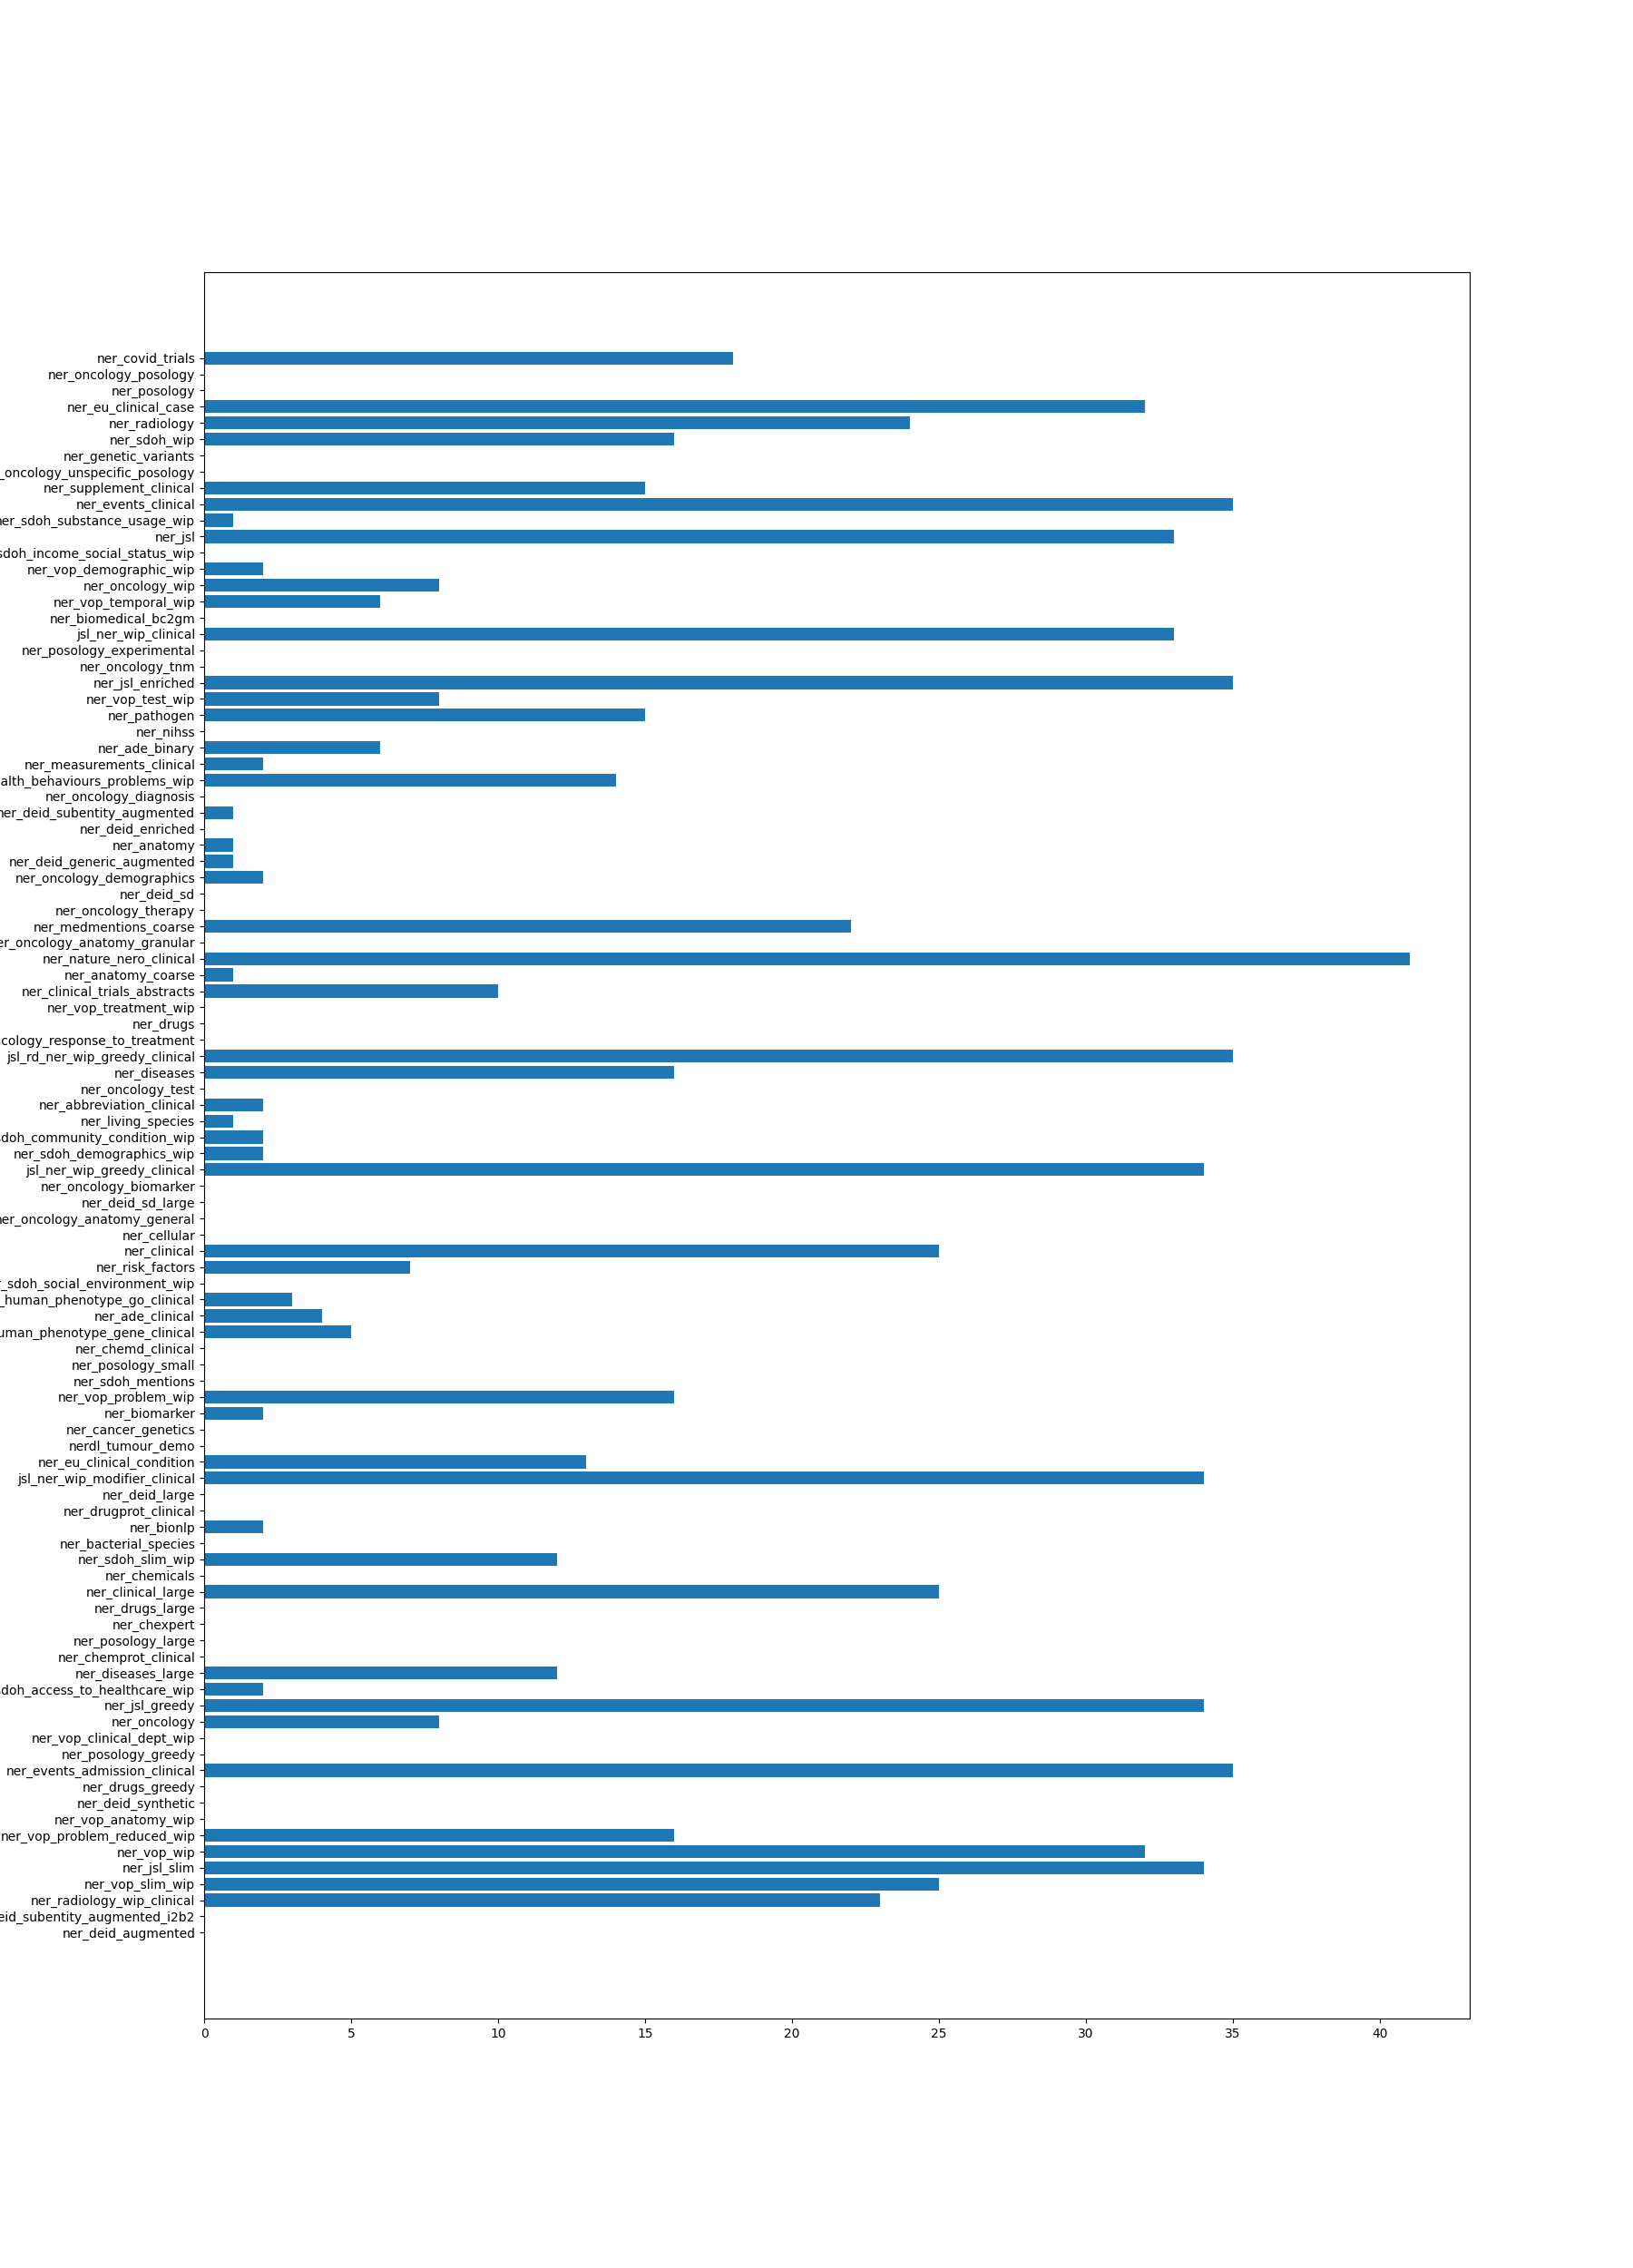

In [13]:
%matplot plt

## NER Model Finder Pretrained Pipeline
`ner_model_finder`  pretrained pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

In [114]:
finder_pipeline = nlp.PretrainedPipeline("ner_model_finder", "en", "clinical/models")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ner_model_finder download started this may take some time.
Approx size to download 148.7 MB
[OK!]

In [115]:
result = finder_pipeline.fullAnnotate("oncology")[0]
result.keys()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

dict_keys(['model_names'])

From the metadata in the `model_names` column, we'll get to the top models to the given 'oncology' entity and oncology related categories.

In [116]:
df= pd.DataFrame(zip(result["model_names"][0].metadata["all_k_resolutions"].split(":::"),
                     result["model_names"][0].metadata["all_k_results"].split(":::")),
                 columns=["category", "top_models"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [117]:
%%display
spark.createDataFrame(df.head())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()